# Malaria and ENSO
El Nino Final Project - Sam Mayers

Please run this notebook in order :)

## 1. Introduction

Malaria infects between 350-500 million people per year, with over 1,000,000 deaths, most of whom are children in Sub-Saharan Africa (1). The disease causes flu-like symptoms, such as fevers, headaches, nausea, among others (2). Those with low or compromised immunity, including pregnant women and travellers, are also at higher risk of infection (2). Malaria is a risk for almost half of the world's population, with 91 countries and territories in Malaria-prevalent regions (2). It is estimated that Malaria has cumulative direct costs of over 12 billion dollars per year, with even larger damages to economic growth in impacted regions (2). Malaria is well understood, and through intervention the numbers of infected have decreased in Malaria impacted regions. However, intervention costs are high in poorer countries, so understanding when Malaria will be most dangerous is essential for resource allocation.

Malaria is transmitted by the Anopheles mosquito that can develop a parasite called Plasmodium falciparum (1), after which this mosquito becomes a possible transmitter of the disease. These mosquitoes live in tropical climates, thriving in places with high rainfall, warm temperatures, and high humidity (1). Humidity and warm temperatures are necessary for these mosquitoes to live long enough for the parasite to develop, which takes at least nine days in warm climates ($30^o$ celsius), and longer in cooler temperatures (2). Rain is necessary to keep larval habitats wet, otherwise the young insects die if their habitat dries out (2). Since the adult female Anopheles mosquito rarely lives longer than 1-2 weeks, climate conditions must be ideal for the mosquitoes to survive long enough for the parasite to successfully develop and for Malaria to be a threat to humans in that location. Adult males live on average only a week in the wild, which is not long enough for the Malaria parasite to develop, thus only female Anopheles mosquitoes transmit Malaria. Therefore, since Malaria is dependent on climate factors, both for the survival of the mosquito and the development of the parasite, understanding the patterns of precipitation, temperature, and humidity in Malaria-impacted regions is essential to efficient prevention and control of the disease.

Previous work has studied the connections between many different climate-sensitive diseases and El Nino Southern Oscillation (ENSO), a climate pattern that causes anomalies across the globe. One study led by Dr. Assaf Anyamba in collaboration with a multitude of various governmental organizations, with scientists from NASA, USDA, DoD, WHO, and FAO, among others, found that during El Nino years, diseases were 2.5-28% more prevalent in ENSO impacted regions than during other years (3). ENSO causes changes in typical conditions, sometimes leading to more favorable environments for disease vectors. Since ENSO is predictable, understanding the relationship between ENSO and the change in climate conditions around the world can lead to accurate predictions about when conditions for climate-sensitive disease outbreak may be more favorable and thus, when these diseases are more threatening. In August 2015, Dr. Assaf Anyamba and his team issued early warnings for the possible outbreak of diseases, shown below (3,4).


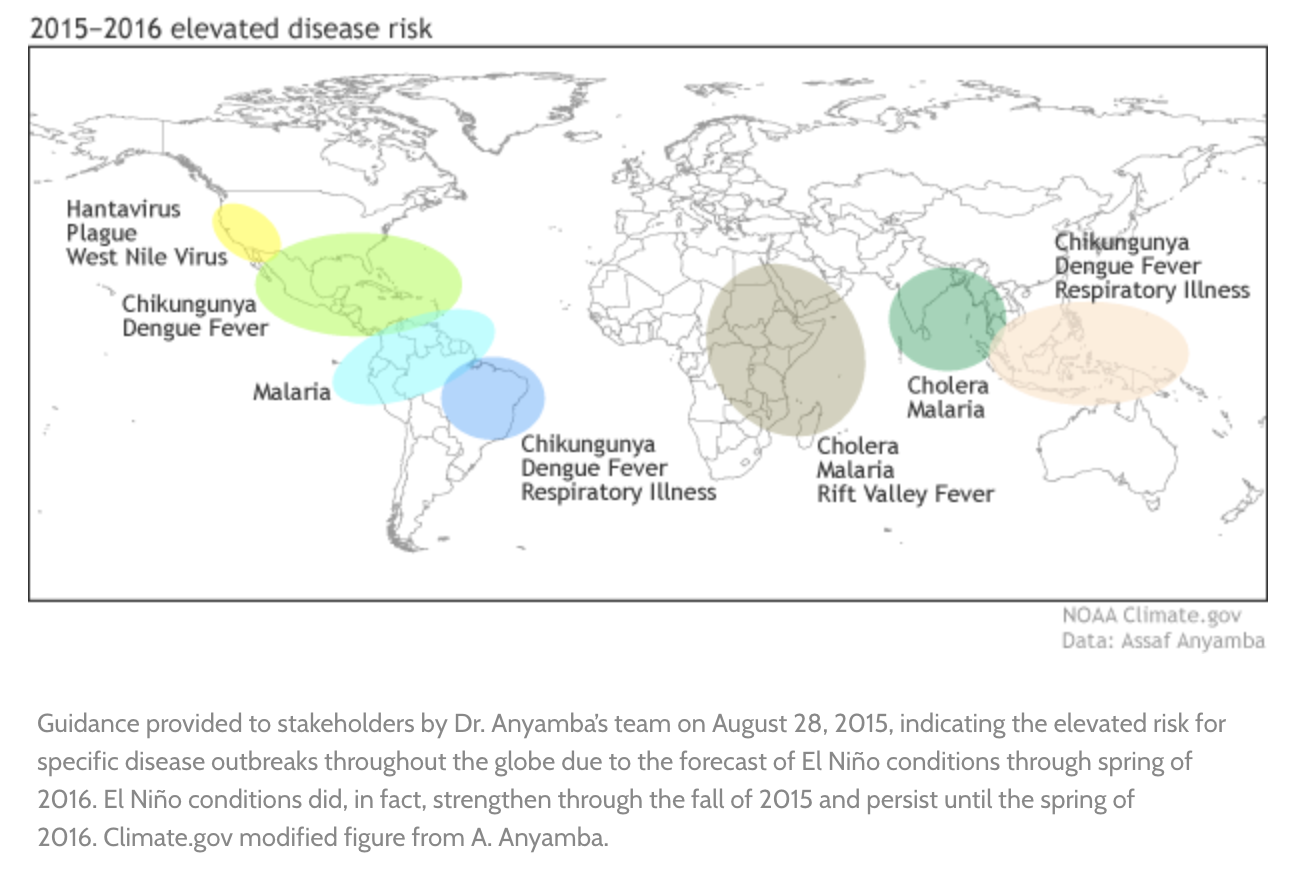

In [150]:
from IPython.display import Image
Image("2015 El Nino diseases.png")

The El Nino event of 2015-2016 ended up being particularly strong, and despite the early warnings, unfortunately many of these diseases ended up having higher rates during this time period than normally (4). However, certain prevention methods for Rift Valley Fever were confirmed to have prevented an outbreak. Livestock, usually intensifying the outbreak by infecting mosquitoes that then could infect humans, were vaccinated in response to the warnings in preparation for an outbreak, since no human vaccine for Rift Valley Fever exists. No outbreak occurred, even with the heightened number of infected mosquitoes observed through field studies (4). The success of this prevented outbreak demonstrates how effective intervention can be, and in regions where intervention is particularly expensive, knowing when intervention is especially crucial can save the country's economy and many peoples' lives. The value in predicting disease outbreak is well recognized; the U.S. Global Change Research Program in June 2019 issued a report called "Predicting Climate-Sensitive Infectious Diseases to Protect Public Health and Strengthen National Security" (5).

Malaria specifically has been studied in relation to ENSO. One study found that in Venezuela, Malaria mortality and morbidity following El Nino years were on average 36.5% higher (95% confidence interval, 3.7%-69.3%; P=.004) than following non El Nino years (6). ENSO's impact on Africa has also been studied. One study looked at cholera epidemics in Africa following El Nino events. This study found that during El Nino years, cholera in East Africa increases by 50,000 cases (95% confidence interval), while in South Africa, cholera decreases by 32,000 cases (95% confidence interval) (7). Below is a figure showing multiple maps of Africa, with anomalies during El Nino years of rainfall deviation, difference log incidence, and likelihood ratio shown (7).

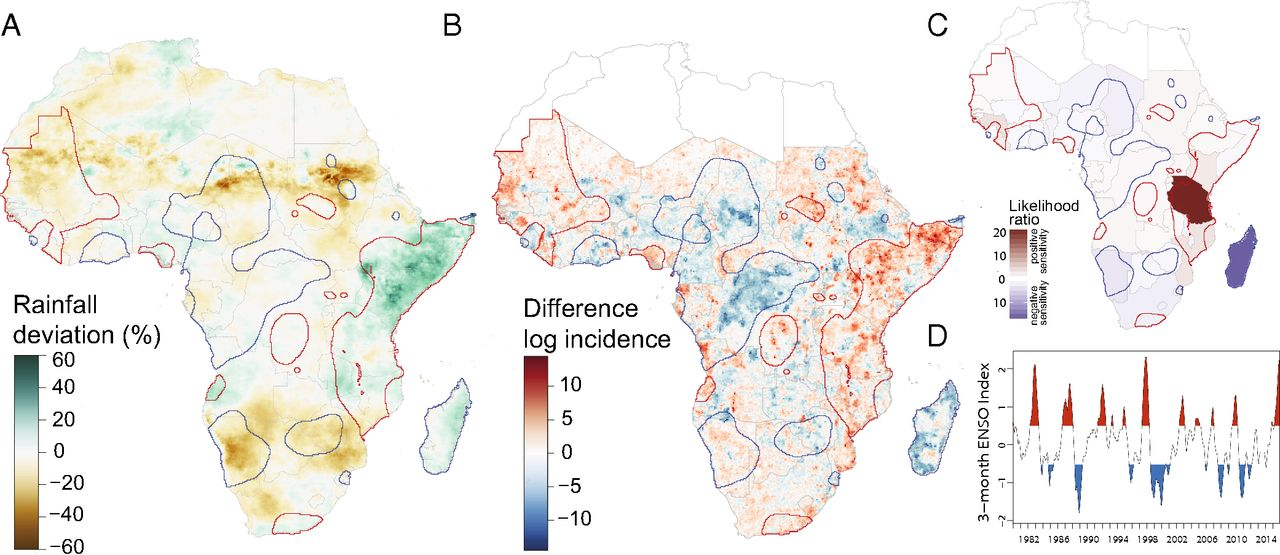

In [151]:
Image("africa.jpg")

From map A above, there is heightened rainfall during El Nino in East Africa, and decreased rainfall during El Nino in South Africa. The study concluded that El Nino affects the distribution of cholera in Africa (7).

For this project, I will be analyzing climate patterns in East Africa where Malaria is endemic, specifically Tanzania. I will look at climate-variables that directly impact Malaria's development and spread, such as precipitation, temperature, and humidity. In addition, recent studies have found that observing only mean monthly temperature overpredicts Malaria in warm temperatures and underpredicts Malaria in cooler temperatures (8,9). Both studies determined that temperature fluctuation impacts the parasite development rate in mosquitoes, leading to relatively faster development in cooler temperatures and relative slower development in warmer temperatures (8,9). Because of these findings, I will also analyze daily temperatures in order to look at temperature variation in connection to ENSO. My goal is to determine if there exists a relationship between these climate variables in Tanzania and ENSO in order to understand the underlying relationship between Malaria in Tanzania and ENSO.

## 2. Data

The datasets I use provide precipitation, temperature, humidity, and daily temperature data in Tanzania. All datasets are modified to begin in 1980 and ignore any earlier data, since the Nino 3.4 datasets used begin in 1980. The precipitation dataset has values for 491 dates beginning on January 16th, 1980 for a 22 by 28 map of Tanzania. The temperature dataset has the same number of dates beginning on the same date, also for a 22 by 28 map of Tanzania. The humidity dataset provides the same number dates beginning on the same date for a 7 by 8 map of Tanzania, and the daily temperature dataset has values for 14958 dates, beginning on January 1st, 1980, for a 7 by 8 map of Tanzania. I also use a very minimal dataset for Malaria in Tanzania.

The graphs below show the map of the last value (by time) in the datasets. The last figure shows the Malaria numbers (per 1000) in Tanzania from 2000 to 2018. The climate datasets were provided by Professor Tippett, and I acquired the dataset for Malaria in Tanzania from the World Health Organization website (10).

In [152]:
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
from scipy import stats
from scipy.stats import t
from scipy.stats import f
import matplotlib.pyplot as plt
from numpy.linalg import inv
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [153]:
# this cell takes ~15 seconds to run
# data
qa_url = 'http://iridl.ldeo.columbia.edu/home/.tippett/.scratch/.APMA4990/.Tanzania/.qa/0/pop/dods'
prcp_url = 'http://iridl.ldeo.columbia.edu/home/.tippett/.scratch/.APMA4990/.Tanzania/.prcp/dods'
t2m_url = 'http://iridl.ldeo.columbia.edu/home/.tippett/.scratch/.APMA4990/.Tanzania/.t2m/dods'
t2m_daily_url = 'http://iridl.ldeo.columbia.edu/home/.tippett/.scratch/.APMA4990/.Tanzania/.t2m_daily/dods'

# humidity
qa_ds = xr.open_dataset(qa_url)
qa_ds.load()
qa = qa_ds.qa
qa = qa.loc["1980":]

# precipitation
prcp_ds = xr.open_dataset(prcp_url)
prcp_ds.load()
prcp = prcp_ds.prcp
prcp = prcp.loc["1980":]

# temperature
t2m_ds = xr.open_dataset(t2m_url)
t2m_ds.load()
t2m = t2m_ds.t2m
t2m = t2m.loc["1980":]

#daily temperatures
t2m_daily_ds = xr.open_dataset(t2m_daily_url)
t2m_daily_ds.load()
t2m_daily = t2m_daily_ds.t2m_daily
t2m_daily = t2m_daily.loc["1980":]

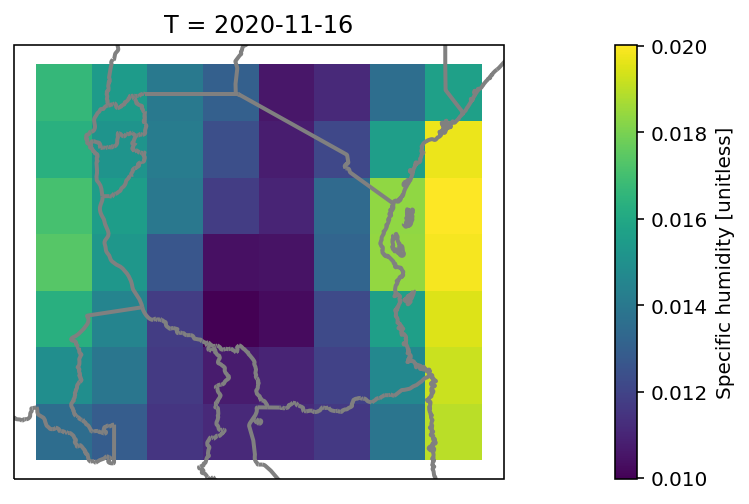

In [154]:
# humidity
proj = ccrs.PlateCarree()
fig = plt.figure(figsize = (20,4))
ax = plt.subplot(projection = proj)

qa.isel(T = -1).plot(ax = ax, transform = proj)
ax.coastlines(color = 'gray', linewidth = 2)
ax.add_feature(cfeature.BORDERS, edgecolor='gray', linewidth = 2);

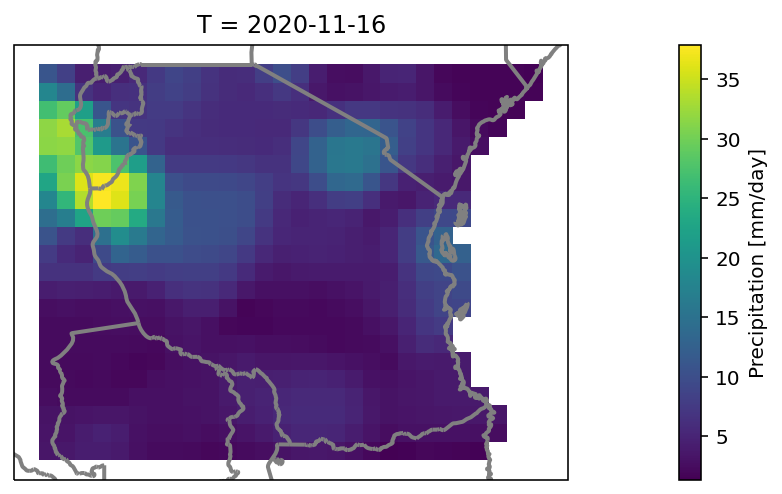

In [155]:
# precipitation
proj = ccrs.PlateCarree()
fig = plt.figure(figsize = (20,4))
ax = plt.subplot(projection = proj)

prcp.isel(T = -1).plot(ax = ax, transform = proj)
ax.coastlines(color = 'gray', linewidth = 2)
ax.add_feature(cfeature.BORDERS, edgecolor='gray', linewidth = 2);

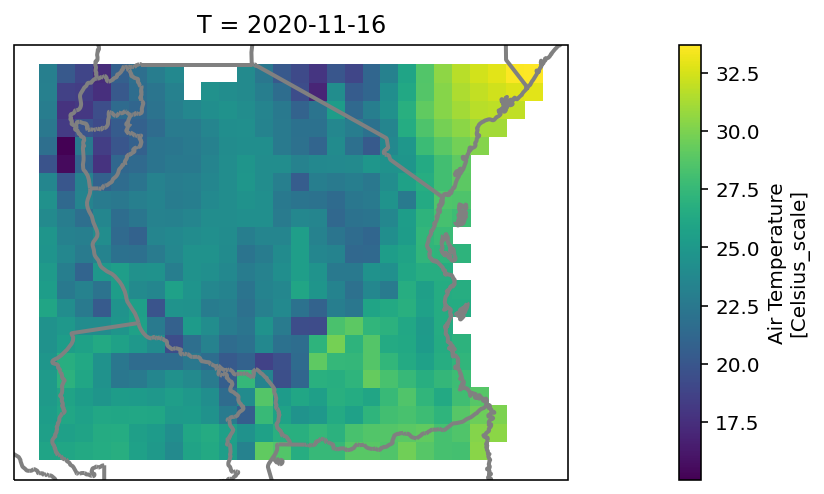

In [156]:
# temperature
proj = ccrs.PlateCarree()
fig = plt.figure(figsize = (20,4))
ax = plt.subplot(projection = proj)

t2m.isel(T = -1).plot(ax = ax, transform = proj)
ax.coastlines(color = 'gray', linewidth = 2)
ax.add_feature(cfeature.BORDERS, edgecolor='gray', linewidth = 2);

Text(0, 0.5, 'Incidence per 1000')

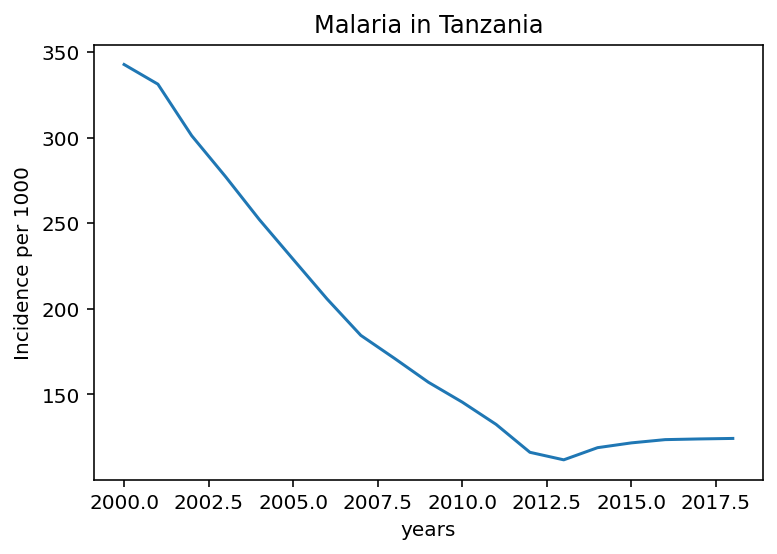

In [157]:
import pandas as pd
tanzania_malaria = pd.read_csv("tanzania.csv")
years = tanzania_malaria["Period"]
infected = tanzania_malaria["FactValueForMeasure"]
plt.plot(years, infected)
plt.title("Malaria in Tanzania")
plt.xlabel("years")
plt.ylabel("Incidence per 1000")

## 3. Methods

For each climate variable, precipitation, temperature, and humidity, I use the same methods.

First, I graph the climate variable. The first graph of each climate variable's section begins with the average, by month, of that climate variable in Tanzania. Each climate variable's dataset starts in 1980 and goes through 2020. Next, I plot the climate variable on average by month on a line graph, instead of by maps. On this graph, it can be seen how the variable changes through an average year. Lastly, I plot the climate variable on average by year for the 42 years in the dataset on a line graph.

Next, I correlate the climate variable in Tanzania with Nino 3.4 by month. I show the average correlation on a map between Nino 3.4 and the entire climate variable dataset, not grouped by any time period. Then I show the correlation between Nino 3.4 and the climate variable anomaly, with the mean of each month removed for that month (instead of the mean of the whole dataset removed). Then I plot the maps of the correlation between Nino 3.4 and the climate variable for every month in Tanzania. For each of these maps, I find which points are significant, and display another map for each month showing which areas had a significant correlation. I calculate what percent of the points have a significant correlation for every point on every month's map.

To determine if there is a significant difference between the climate variable during El Nino years and La Nina years, I use a T-Test for difference in means. I map the difference in means between the climate variable during El Nino years and La Nino years by month to visualize the potential differences. A p-value is calculated for each month, and a visual of where these values fall by significance is provided. Then, I find the p-values for each coordinate on each map by month to account for possible differences across the country.

I use KNN to predict the climate variable for 2020 by month from the values of Nino 3.4. I show the 10 closest years to the 2020 value of Nino 3.4 (k=10) and the corresponding values of the climate variables in those years to make a conjecture about the accuracy of the following KNN analysis. Then, I plot a 2020 forecast of the climate variable for each month. I show the actual map of the variable for 2020, and then subtract the actual from the forecast and map the difference in order to visualize how close the predictions were to the actual values. The "actual" value for December 2020 is shown as the prediction value, since the actual value is not available yet. Thus, on the maps showing the difference between the forecast and the actual, for December there is no difference, since the difference is unknown. For precipitation and temperature, I repeat this KNN analysis for predicting the 2015 precipitation and temperature values.

I also use linear regression to predict the November 2020 climate variable's map based on Nino 3.4.

For the daily temperature dataset, I test to see if there is a significant difference in the monthly variance of daily temperature for each month between El Nino and La Nina years.

Lastly, I correlate the Malaria in Tanzania data with many different versions (different months and month groupings) of the Nino 3.4 dataset.

## 4. Analysis

### a. Load Nino 3.4 Data

Below are various Nino 3.4 Datasets for different parts of the year. These were used in different labs throughout the semester.

In [158]:
# Various Nino 3.4 data

# JJA Nino 3.4
n34_JJA_url = 'http://iridl.ldeo.columbia.edu/home/.tippett/.scratch/.APMA4990/.n34_JJA/dods'
n34_JJA_ds = xr.open_dataset(n34_JJA_url)
n34_JJA = n34_JJA_ds.n34_JJA
n34_JJA = n34_JJA - n34_JJA.mean()

# Aug Nino 3.4 
n34_Aug_url = 'http://iridl.ldeo.columbia.edu/home/.tippett/.scratch/.APMA4990/.n34_Aug/dods'
n34_Aug_ds = xr.open_dataset(n34_Aug_url)
n34_Aug = n34_Aug_ds.n34_Aug - n34_Aug_ds.n34_Aug.mean('T')

# Sep Nino 3.4
n34_Sep_url = 'http://iridl.ldeo.columbia.edu/home/.tippett/.scratch/.APMA4990/.n34_Sep/dods'
n34_Sep_ds = xr.open_dataset(n34_Sep_url)
n34_Sep = n34_Sep_ds.n34_Sep - n34_Sep_ds.n34_Sep.mean('T')

# Read nino 3.4 and compute anomalies
n34_url = 'http://iridl.ldeo.columbia.edu/home/.tippett/.scratch/.APMA4990/.n34/dods'
n34_ds = xr.open_dataset(n34_url)
n34 = n34_ds.n34
nmonths = len(n34)
n34a = n34.groupby('T.month') - n34.groupby('T.month').mean()

# JFM Nino 3.4
n34_JFM_url = 'http://iridl.ldeo.columbia.edu/home/.tippett/.scratch/.APMA4990/.n34_JFM/dods'
n34_JFM_ds = xr.open_dataset(n34_JFM_url)
n34_JFM = n34_JFM_ds.n34_JFM - n34_JFM_ds.n34_JFM.mean()

Below I define which years can be classified as El Nino or La Nina years. The result is an array of boolean values.

In [159]:
t_nina = n34a.groupby('T.year').mean().values <= -0.4
t_nino = n34a.groupby('T.year').mean().values >= 0.33

### b. Precipitation

Below I plot the mean precipitation by month.

/opt/conda/lib/python3.8/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


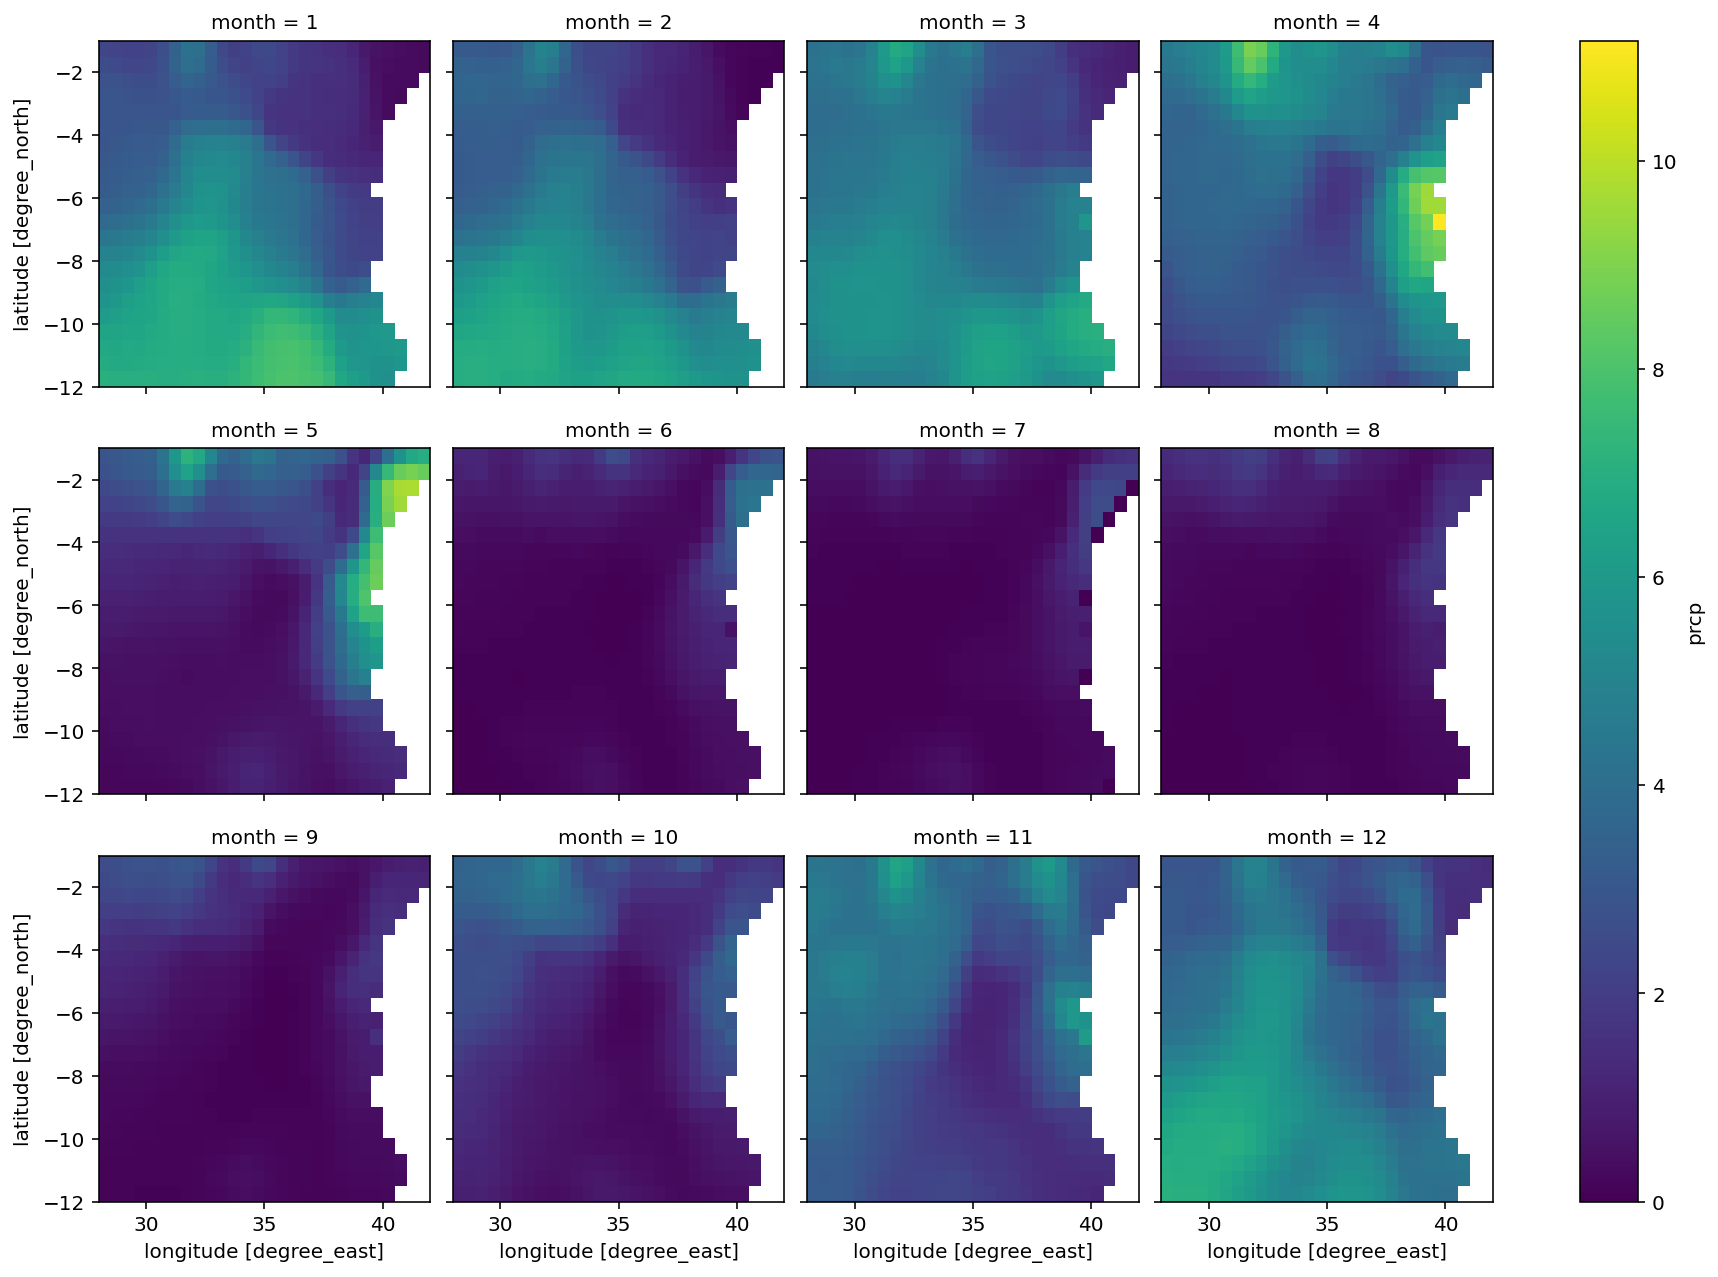

In [160]:
# Mean rainfall by month
prcp.groupby("T.month").mean('T').plot(col='month',col_wrap=4)

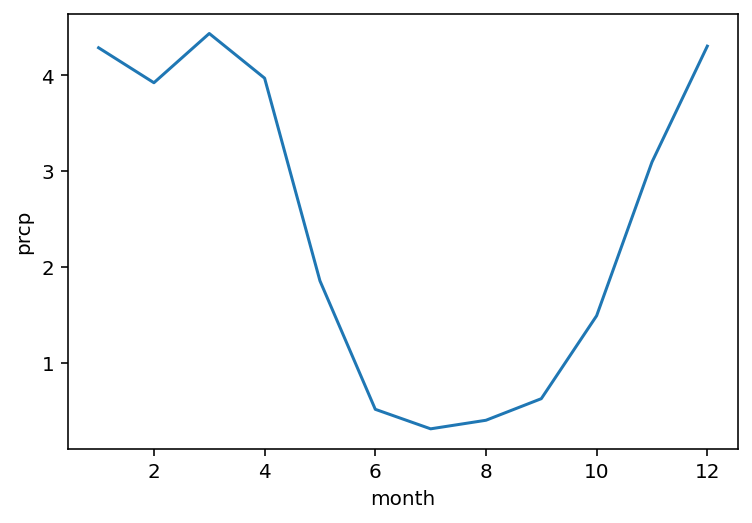

In [161]:
# Precipitation on average by month
prcp.groupby('T.month').mean(('X', 'Y', 'T')).plot()

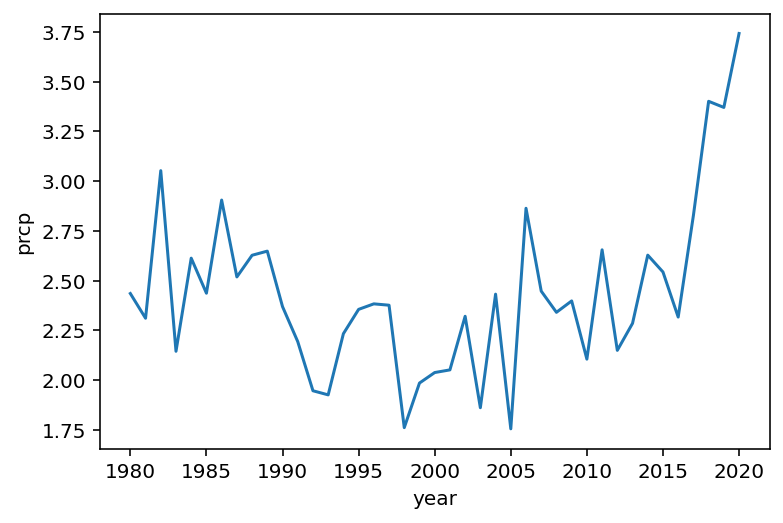

In [162]:
# Precipitation on average by year
prcp.groupby("T.year").mean(('T','X','Y')).plot()

#### Correlation - Precipitation and Nino 3.4

/opt/conda/lib/python3.8/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


Text(0.5, 1.0, 'Correlation Precipitation with Nino 3.4')

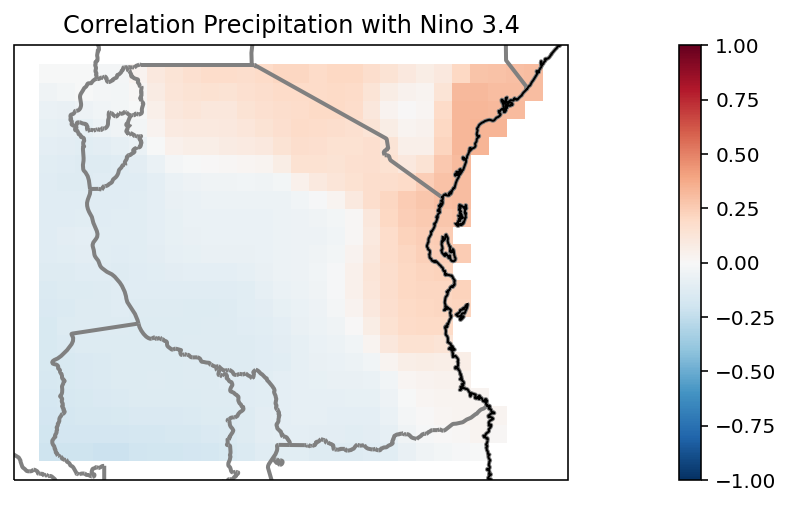

In [163]:
# correlation between full nino 3.4 and prcp all months
r_prcp = xr.corr(n34, prcp, dim='T')

proj = ccrs.PlateCarree()
fig = plt.figure(figsize = (20,4))
ax = plt.subplot(projection = proj)

ax.coastlines(color = 'gray', linewidth = 2)
ax.add_feature(cfeature.BORDERS, edgecolor='gray', linewidth = 2);

r_prcp.plot(ax=ax, vmax = 1, transform=proj)
ax.coastlines();
ax.set_title('Correlation Precipitation with Nino 3.4')

/opt/conda/lib/python3.8/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


Text(0.5, 1.0, 'Correlation Precipitation with Nino 3.4')

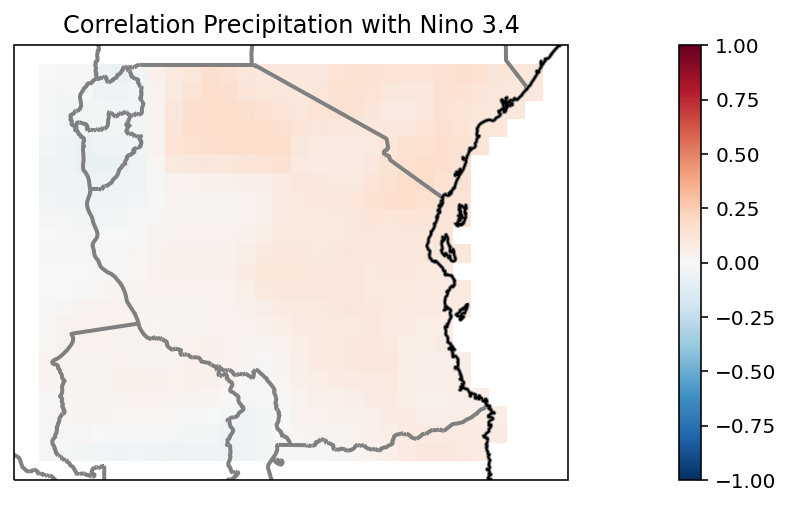

In [164]:
# correlation between full nino 3.4 and prcp all months - anomaly
prcpa = prcp.groupby('T.month') - prcp.groupby('T.month').mean('T') # remove mean for each month separately 
r_prcp = xr.corr(n34a, prcpa, dim='T')

proj = ccrs.PlateCarree()
fig = plt.figure(figsize = (20,4))
ax = plt.subplot(projection = proj)

ax.coastlines(color = 'gray', linewidth = 2)
ax.add_feature(cfeature.BORDERS, edgecolor='gray', linewidth = 2);

r_prcp.plot(ax=ax, vmax = 1, transform=proj)
ax.coastlines();
ax.set_title('Correlation Precipitation with Nino 3.4')

Below shows the correlation between Nino 3.4 and precipitation for every month in Tanzania. The graph below shows by month, where the correlations are significant (yellow = significant, purple = not significant).

/opt/conda/lib/python3.8/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


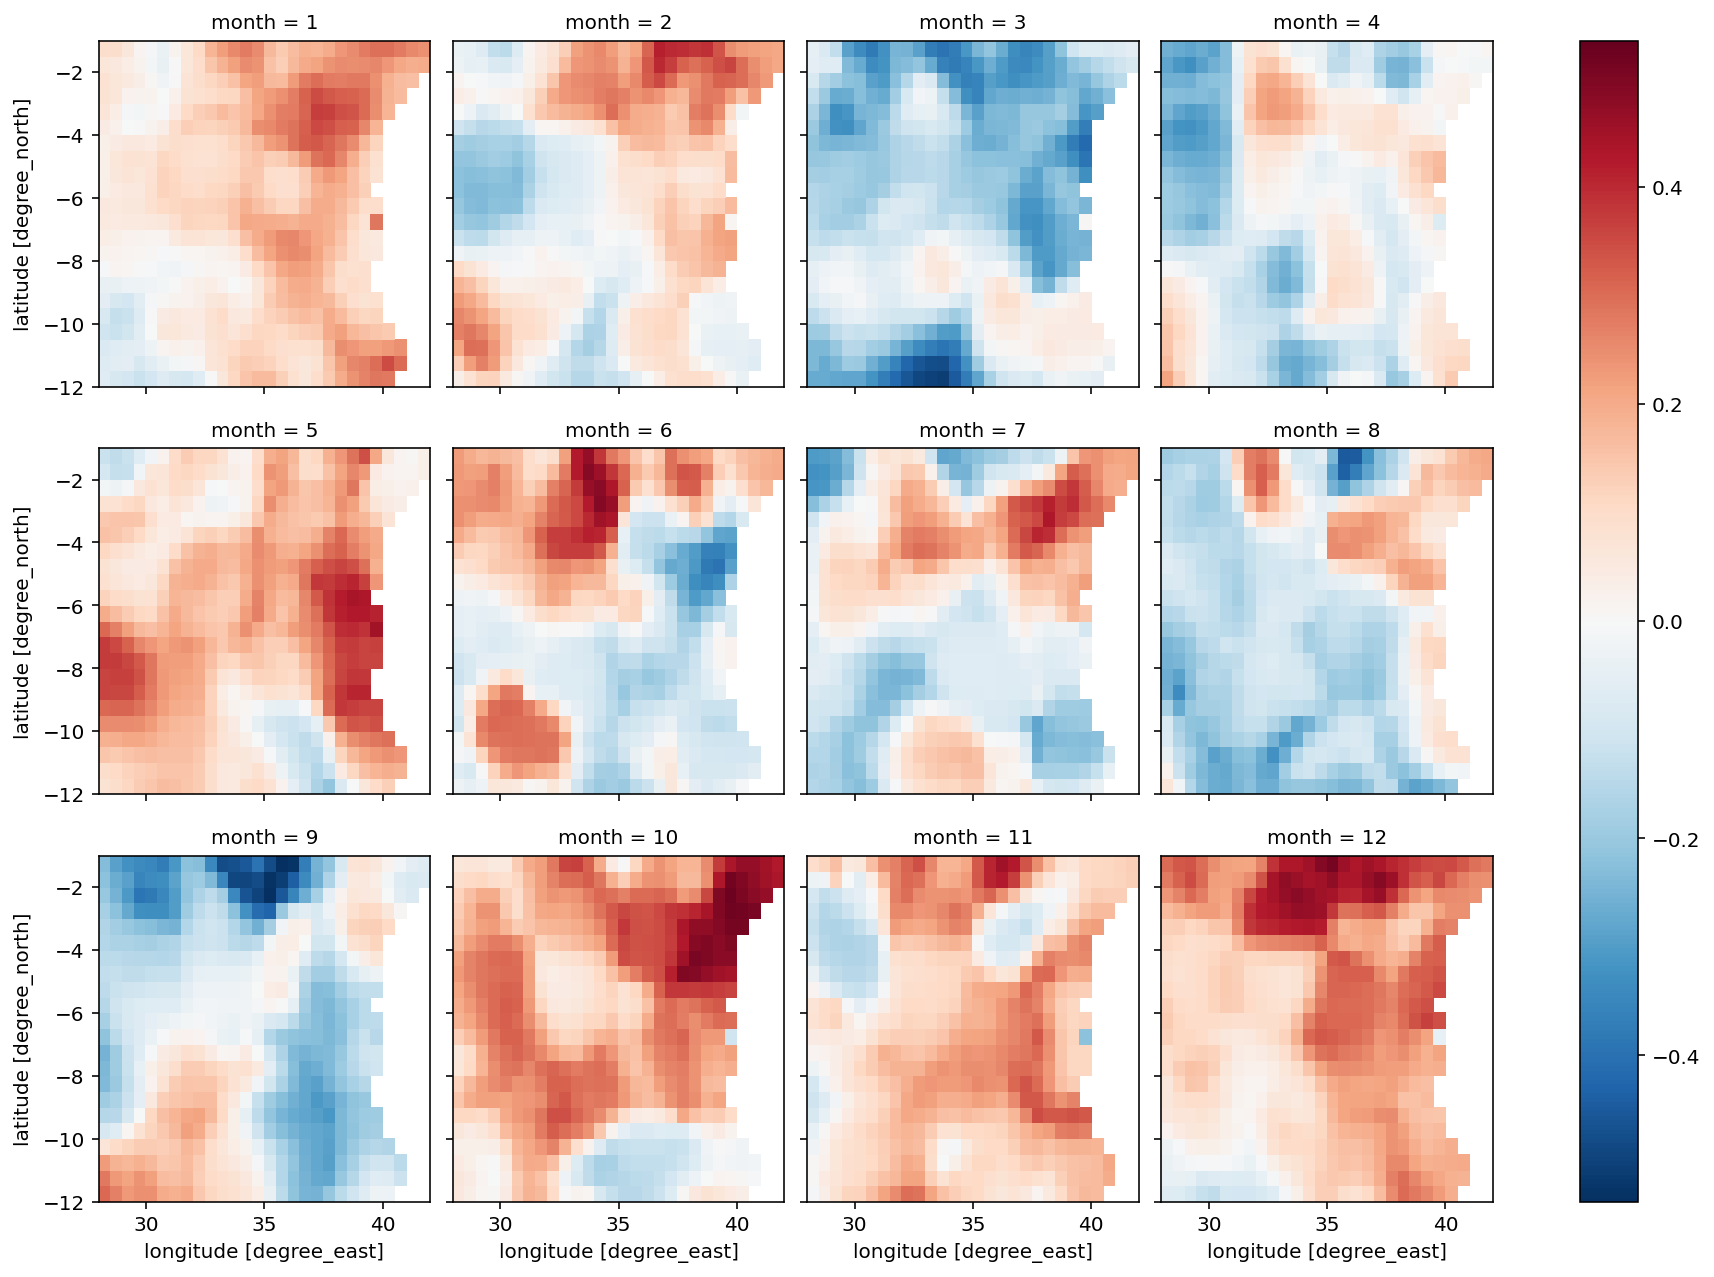

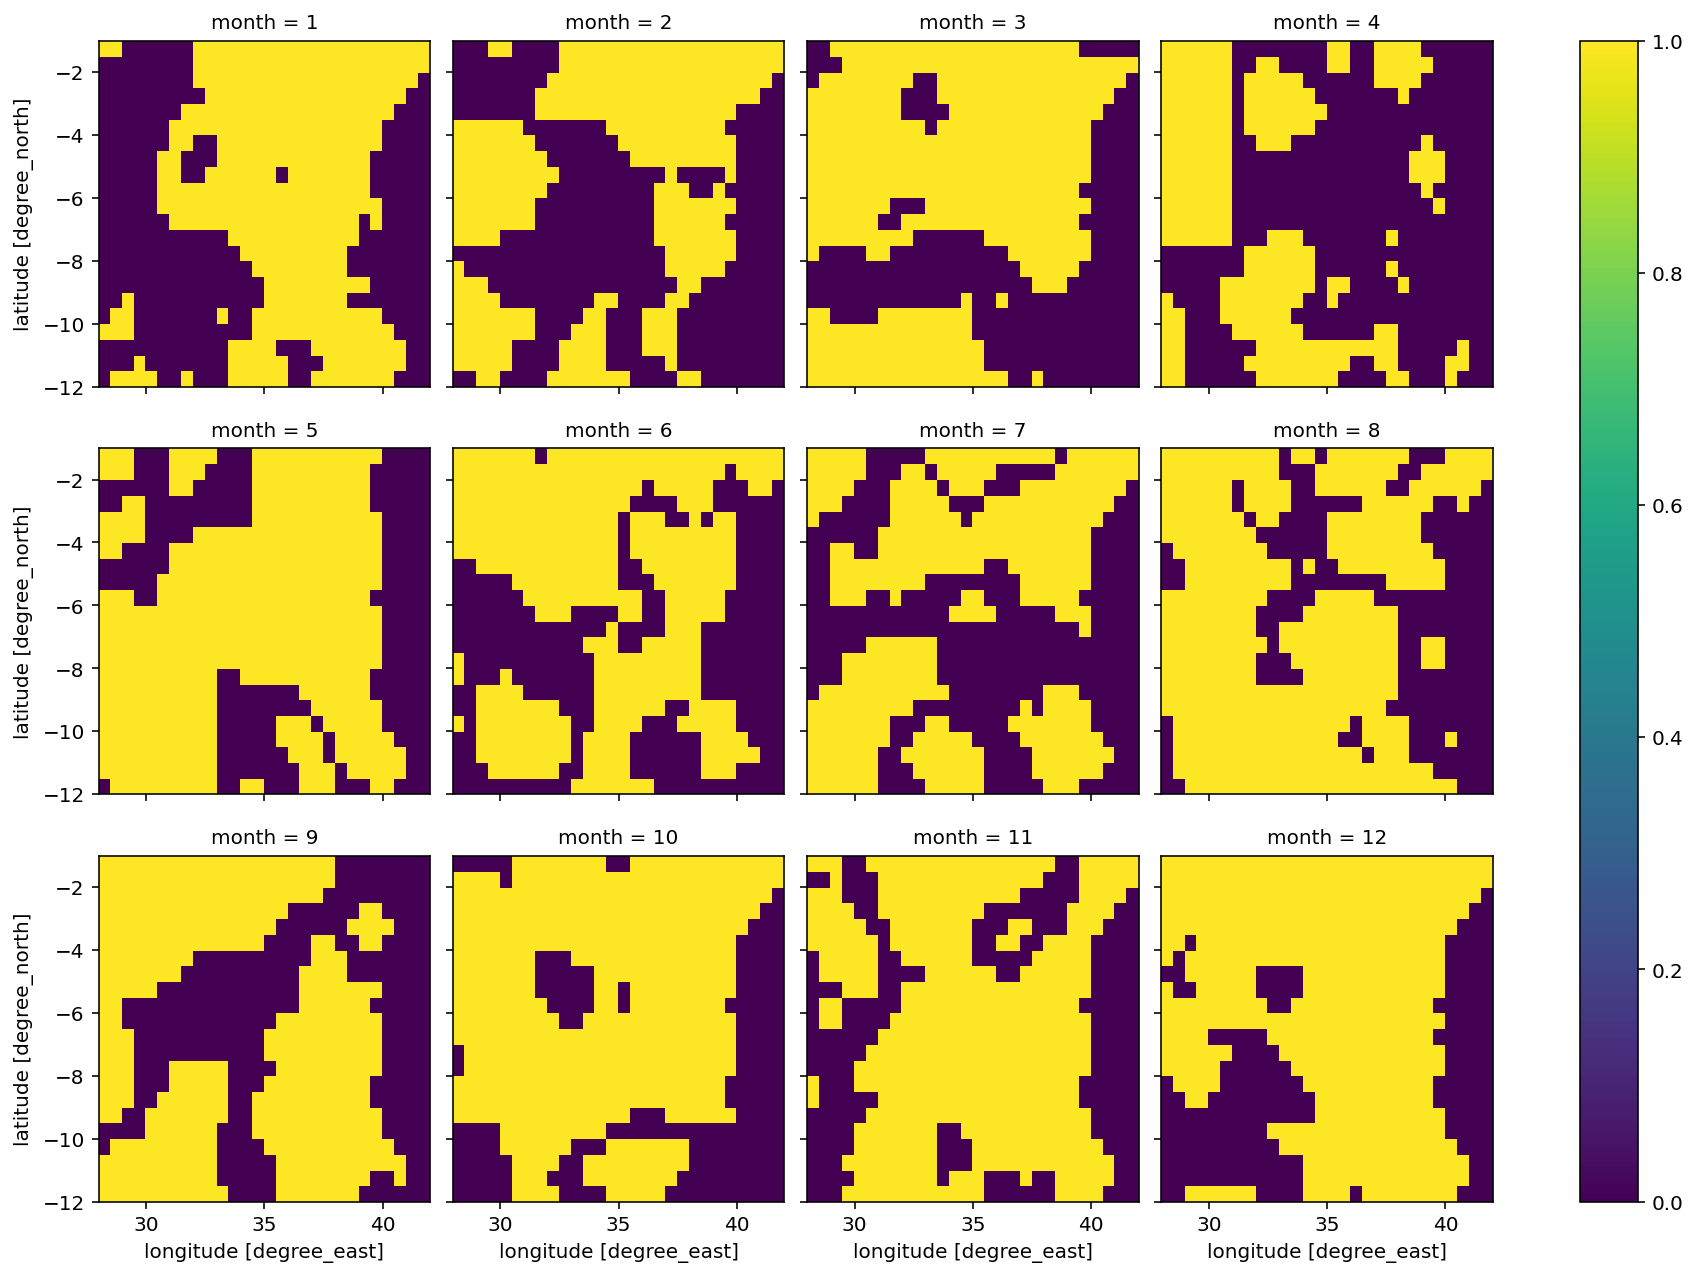

In [165]:
top = (n34a*prcpa).groupby('T.month').mean('T')
bottom = n34a.groupby('T.month').std('T') * prcpa.groupby('T.month').std('T')
c = top/bottom

N = len(n34)
sig_value = 2/np.sqrt(N)
c.plot(col='month',col_wrap=4)
xr.where(abs(c)> sig_value,1,0).plot(col='month',col_wrap=4)

In [166]:
np.count_nonzero(np.array(xr.where(abs(c)> sig_value,1,0)))/(np.array(c).shape[0]*np.array(c).shape[1]*np.array(c).shape[2])

0.5921266233766234

The maps above show that the values for the correlation between precipitation and Nino 3.4 are significant almost 60% of the time in Tanzania (see above calculation, # non zero points divided by total points).

#### T-Test for Difference in Means - Precipitation in El Nino vs La Nina years

In [167]:
# T-test for difference in means - El Nino vs La Nina
Nx = np.count_nonzero(t_nina)
Ny = np.count_nonzero(t_nino)
df = Nx + Ny - 2

The code below generates the p-value for the difference in means of average precipitation for the whole year for all of Tanzania between El Nino years and La Nina years.

In [168]:
X = prcp.groupby('T.year').mean(('T','X','Y'))[t_nina].values
Y = prcp.groupby('T.year').mean(('T','X','Y'))[t_nino].values 
pooled_var = ((Nx - 1)*X.var() + (Ny - 1)*Y.var())/(Nx + Ny - 2)
t = (X.mean() - Y.mean())/np.sqrt(pooled_var)/np.sqrt(1./Nx + 1./Ny)
p = (2*(1-stats.t.cdf(np.abs(t), df=df)))
p

0.5810734103536346

Thus, there is no significant difference in precipitation between El Nino and La Nina years in Tanzania across the whole year and whole map (p>.05).

The graphs below show the difference in precipiation between El Nino years and La Nina years. From the graphs, it seems like January generally has more precipitation in the center of the country during El Nino years than in La Nina years. March has much less precipitation during El Nino than during La Nina. April brings a mixture, with parts of the country seeing more rainfall during El Nino, and other parts seeing more rainfall during La Nina. June through September has little precipitation at all (from earlier plots of average precipitation per month), so it makes sense that there is little difference in precipitation between El Nino years and La Nina years.

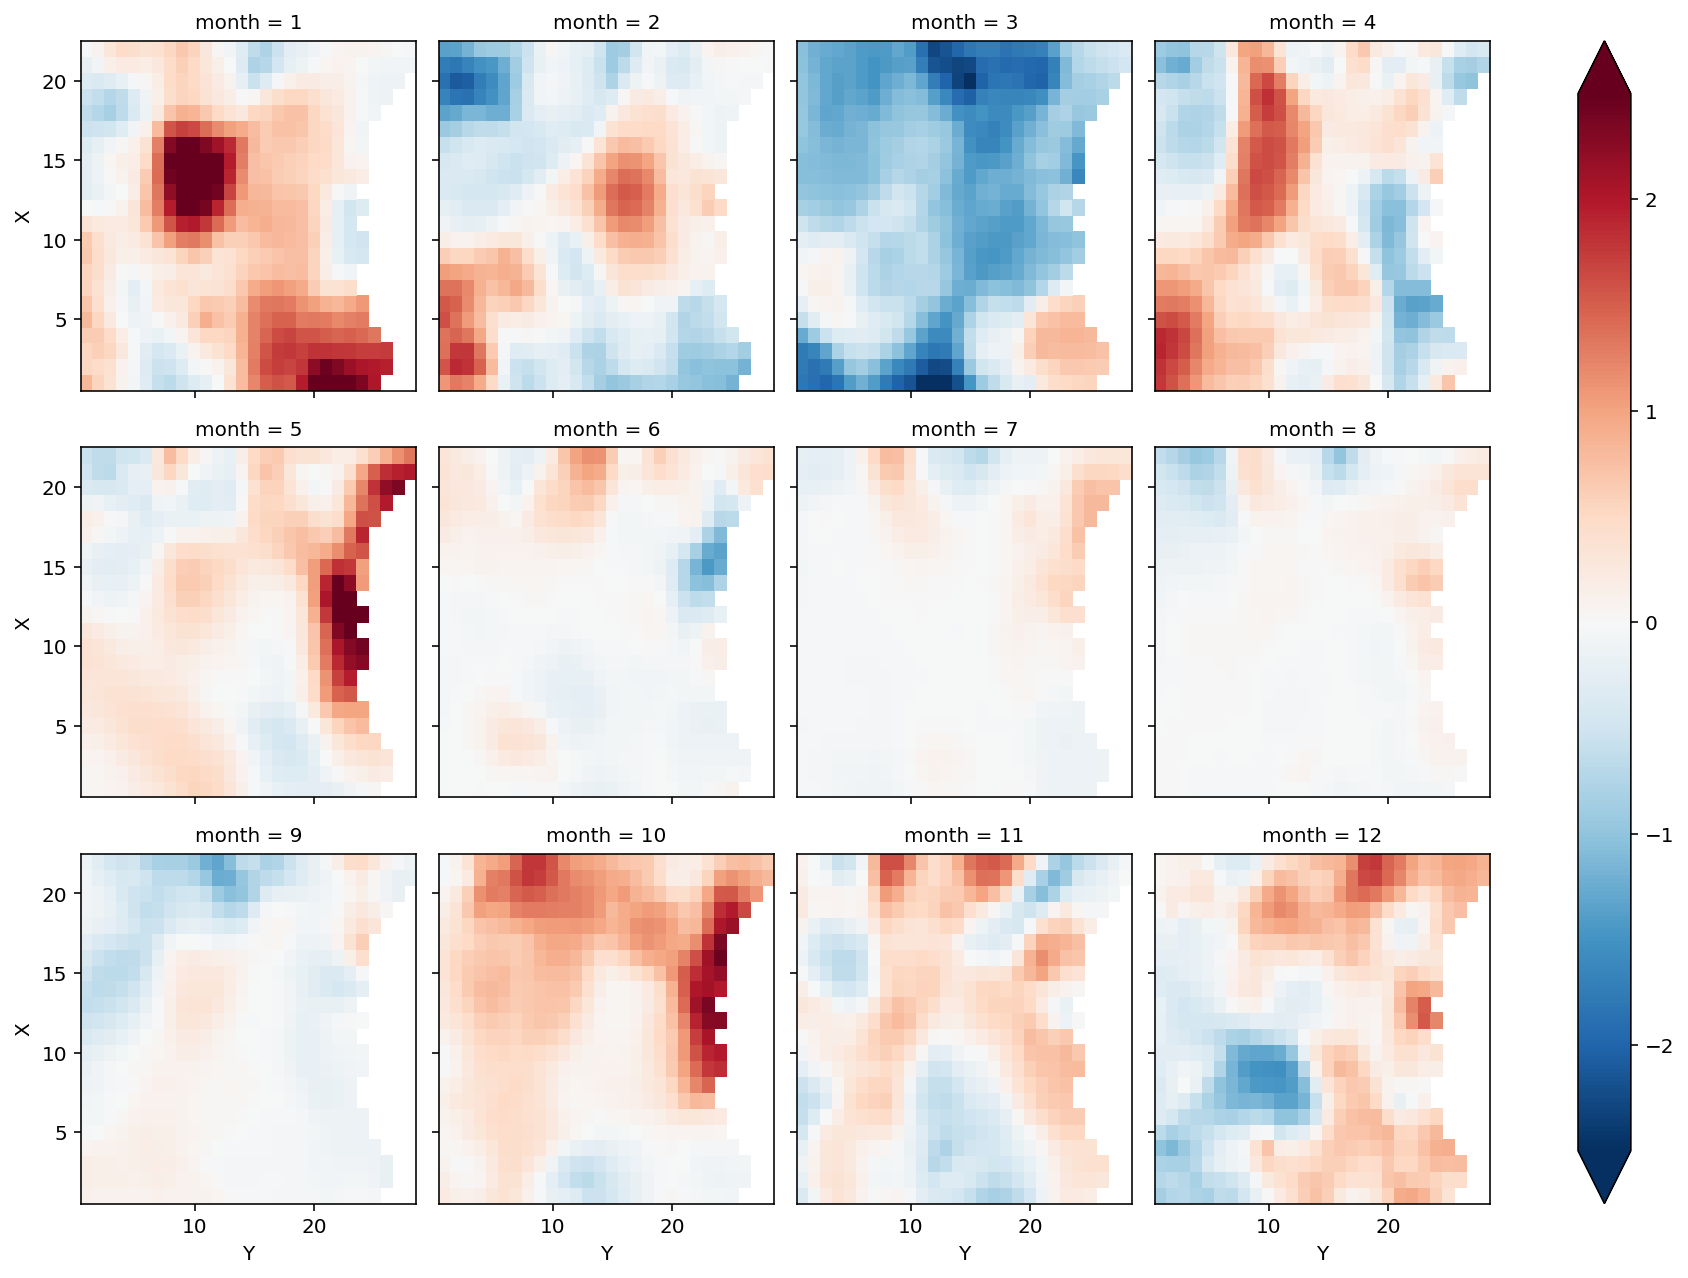

In [169]:
dif = []
for month in prcp.groupby('T.month'):
    if month[0] == 12:
        dif.append(month[1].values[t_nino[:-1],:,:].mean(axis = 0) - month[1].values[t_nina[:-1],:,:].mean(axis = 0))
    else:
        dif.append(month[1].values[t_nino,:,:].mean(axis = 0) - month[1].values[t_nina,:,:].mean(axis = 0)) 
dif = np.array(dif)
dif = xr.DataArray(dif,coords = [list(range(1,13)),list(range(1,23)),list(range(1,29))], dims=['month','X','Y'])
dif.plot(col='month',vmax = 2.5,vmin = -2.5,col_wrap=4,cmap = 'RdBu_r')

Below is a t-test for difference in means for precipitation during El Nino vs La Nina years for every month.

In [170]:
p = []
tss = []
for month in prcp.groupby('T.month'):
    if month[0] == 12:
        X = month[1].mean(('X','Y'))[t_nina[:-1]].values
        Y = month[1].mean(('X','Y'))[t_nino[:-1]].values 
        pooled_var = ((Nx - 1)*X.var() + (Ny - 1)*Y.var())/(Nx + Ny - 2)
        t = (X.mean() - Y.mean())/np.sqrt(pooled_var)/np.sqrt(1./Nx + 1./Ny)
        tss.append(t)
        p.append(2*(1-stats.t.cdf(np.abs(t), df=df)))
    else:
        X = month[1].mean(('X','Y'))[t_nina].values
        Y = month[1].mean(('X','Y'))[t_nino].values 
        pooled_var = ((Nx - 1)*X.var() + (Ny - 1)*Y.var())/(Nx + Ny - 2)
        t = (X.mean() - Y.mean())/np.sqrt(pooled_var)/np.sqrt(1./Nx + 1./Ny)
        tss.append(t)
        p.append(2*(1-stats.t.cdf(np.abs(t), df=df)))     
print("The p values for difference in precipitation means between El Nino years and La Nina years are by month: ")
p

The p values for difference in precipitation means between El Nino years and La Nina years are by month: 


[0.2009421876714761,
 0.9281443589160621,
 0.002225208802283829,
 0.5255226986309911,
 0.24607165892082694,
 0.9518760774295303,
 0.5587775015615417,
 0.7684871978559322,
 0.377934738688088,
 0.0659101215754343,
 0.7400504403317922,
 0.7729929808403304]

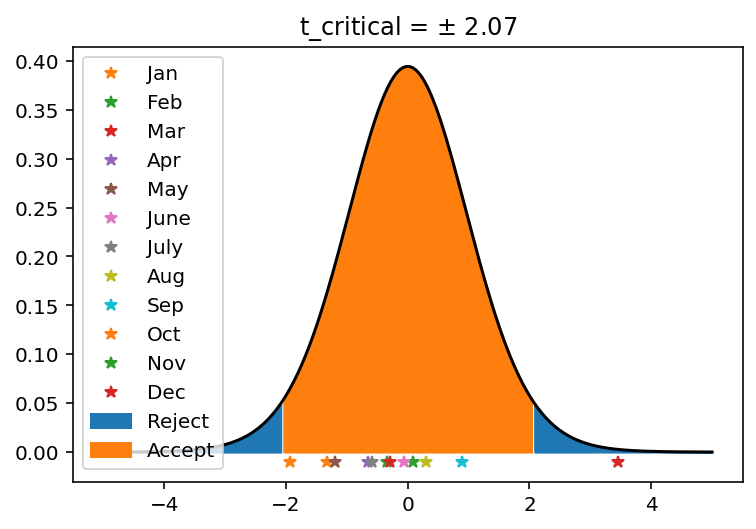

In [171]:
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
df = Nx + Ny - 2

alpha = 0.05
t_05 = stats.t.ppf(1 - 0.05/2, df = df)
plt.title('t_critical = $\pm$ {:4.2f}'.format(t_05))

ts = np.linspace(-5, 5, 200)
plt.plot(ts, stats.t.pdf(ts, df=df), color='k');
ts_left = ts[ts <= - t_05]
ts_right = ts[ts >= t_05]
ts_middle = ts[ (ts < t_05) & (ts > - t_05) ]


plt.fill_between(ts_left, stats.t.pdf(ts_left, df=df), color = colors[0], label='Reject')
plt.fill_between(ts_right, stats.t.pdf(ts_right, df=df), color = colors[0])
plt.fill_between(ts_middle, stats.t.pdf(ts_middle, df=df), color = colors[1], label='Accept')

plt.plot(tss[0], -0.01, '*', color = colors[1], label = 'Jan')
plt.plot(tss[1], -0.01, '*', color = colors[2], label = 'Feb')
plt.plot(tss[2], -0.01, '*', color = colors[3], label = 'Mar')
plt.plot(tss[3], -0.01, '*', color = colors[4], label = 'Apr')
plt.plot(tss[4], -0.01, '*', color = colors[5], label = 'May')
plt.plot(tss[5], -0.01, '*', color = colors[6], label = 'June')
plt.plot(tss[6], -0.01, '*', color = colors[7], label = 'July')
plt.plot(tss[7], -0.01, '*', color = colors[8], label = 'Aug')
plt.plot(tss[8], -0.01, '*', color = colors[9], label = 'Sep')
plt.plot(tss[9], -0.01, '*', color = colors[1], label = 'Oct')
plt.plot(tss[10], -0.01, '*', color = colors[2], label = 'Nov')
plt.plot(tss[11], -0.01, '*', color = colors[3], label = 'Dec')

plt.legend();

From this analysis, there is no significant difference between precipitation across Tanzania between El Nino and La Nina years, except for March (p = .0022). This result may be because of the differences throughout different regions of the country, as shown by the above figures showing the differences between precipitation during El Nino and La Nina. March had similar results throughout the country, while other months led to some regions of the country having more precipitation during El Nino years and some regions of the country having less precipitation during El Nino years. To account for this possibility, below shows the p-values on the map by month. Significant values (p<.05) are shown in yellow.

<ipython-input-172-0fd79c7de3cd>:23: RuntimeWarning: invalid value encountered in true_divide
  t = (X.mean(axis=0) - Y.mean(axis=0))/np.sqrt(pooled_var)/np.sqrt(1./Nx + 1./Ny)
<ipython-input-172-0fd79c7de3cd>:12: RuntimeWarning: invalid value encountered in true_divide
  t = (X.mean(axis=0) - Y.mean(axis=0))/np.sqrt(pooled_var)/np.sqrt(1./Nx + 1./Ny)


The p values for difference in precipitation means between El Nino years and La Nina years are by month: 


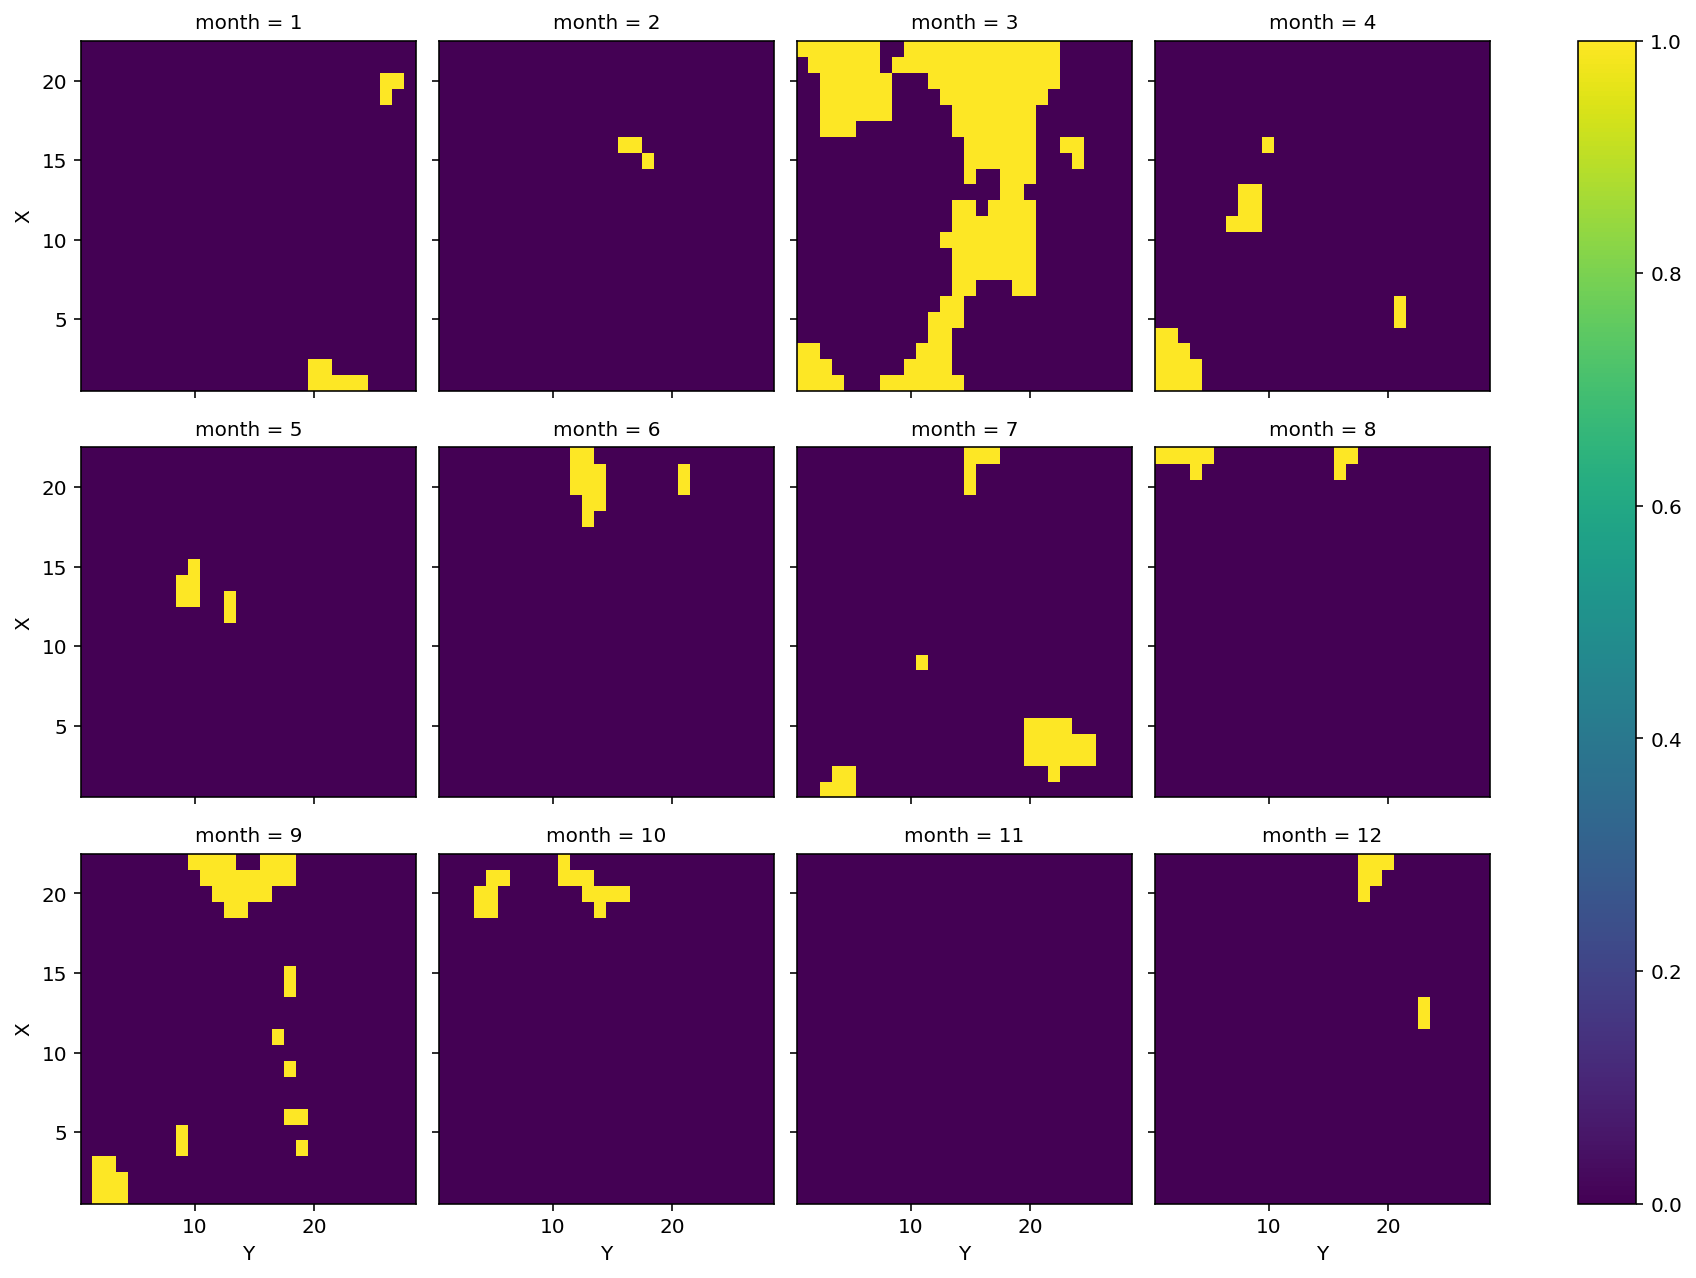

In [172]:
p = []
tss = []
for month in prcp.groupby('T.month'):
    if month[0] == 12:
        X = month[1].values[t_nina[:-1],:,:]
        Y = month[1].values[t_nino[:-1],:,:]
        where_are_NaNs = np.isnan(X)
        X[where_are_NaNs] = 0
        where_are_NaNs = np.isnan(Y)
        Y[where_are_NaNs] = 0
        pooled_var = ((Nx - 1)*X.var(axis=0) + (Ny - 1)*Y.var(axis=0))/(Nx + Ny - 2)
        t = (X.mean(axis=0) - Y.mean(axis=0))/np.sqrt(pooled_var)/np.sqrt(1./Nx + 1./Ny)
        tss.append(t)
        p.append(2*(1-stats.t.cdf(np.abs(t), df=df)))
    else:
        X = month[1].values[t_nina,:,:]
        Y = month[1].values[t_nino,:,:]
        where_are_NaNs = np.isnan(X)
        X[where_are_NaNs] = 0
        where_are_NaNs = np.isnan(Y)
        Y[where_are_NaNs] = 0
        pooled_var = ((Nx - 1)*X.var(axis=0) + (Ny - 1)*Y.var(axis=0))/(Nx + Ny - 2)
        t = (X.mean(axis=0) - Y.mean(axis=0))/np.sqrt(pooled_var)/np.sqrt(1./Nx + 1./Ny)
        tss.append(t)
        p.append(2*(1-stats.t.cdf(np.abs(t), df=df)))     
print("The p values for difference in precipitation means between El Nino years and La Nina years are by month: ")
where_are_NaNs = np.isnan(p)
p = np.array(p)
p = xr.DataArray(p)
p = xr.DataArray(p,coords = [list(range(1,13)),list(range(1,23)),list(range(1,29))], dims=['month','X','Y'])
#p.plot(col='month',vmin=0,vmax=.05,col_wrap=4,cmap = 'RdBu_r')
xr.where(p < .05,1,0).plot(col='month',col_wrap=4)

#### KNN

I will use KNN to predict, for each month, the 2020 precipitation. Every month's actual 2020 precipitation is available for comparison except December.

In [173]:
# Find the neighbors
knn = np.argsort( (n34a.groupby('T.year').mean()[:-1] - n34a.groupby('T.year').mean()[-1])**2 ).values[:10]
knn

array([33, 21, 37, 15, 32, 18,  1, 30, 16,  0])

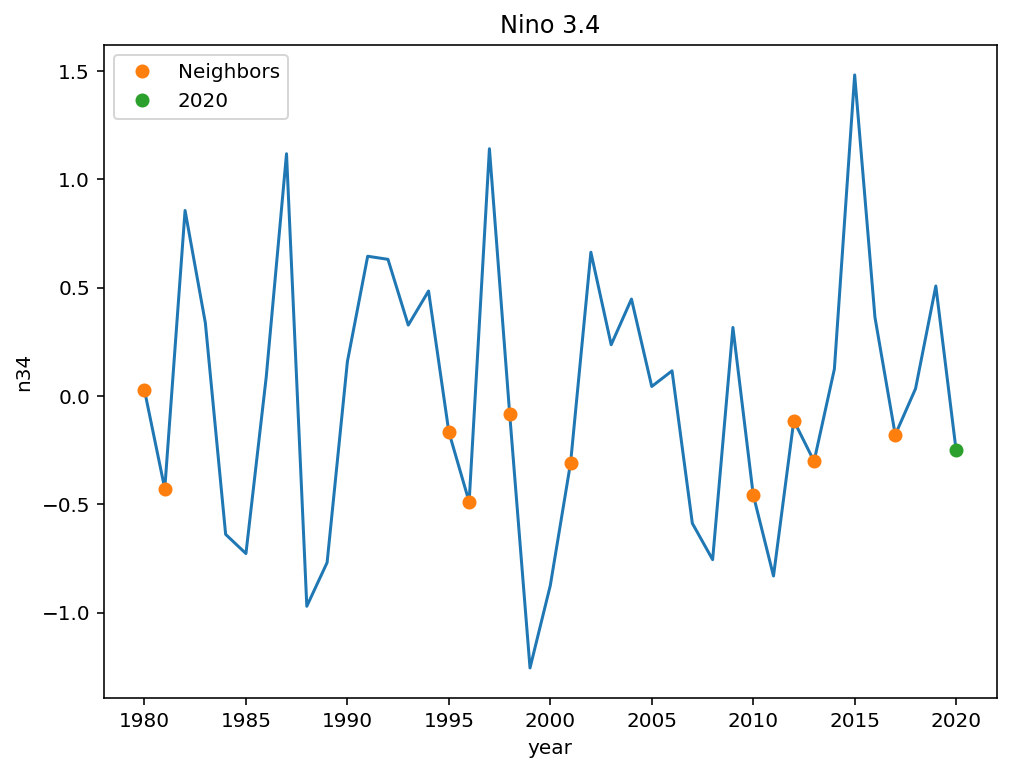

In [174]:
# Check that we have the right years
n34a.groupby('T.year').mean().plot(figsize = (8, 6));
n34a.groupby('T.year').mean()[knn].plot.line('o', label = 'Neighbors')
plt.plot(2020, n34a.groupby('T.year').mean()[-1], 'o', label = '2020')
plt.title('Nino 3.4')
plt.legend(loc = 'upper left');

The graph below shows the precipitation values for the years determined to be the neareast neighbors for n34. The graph suggests the predictions will be terrible, with drastic underpredictions.

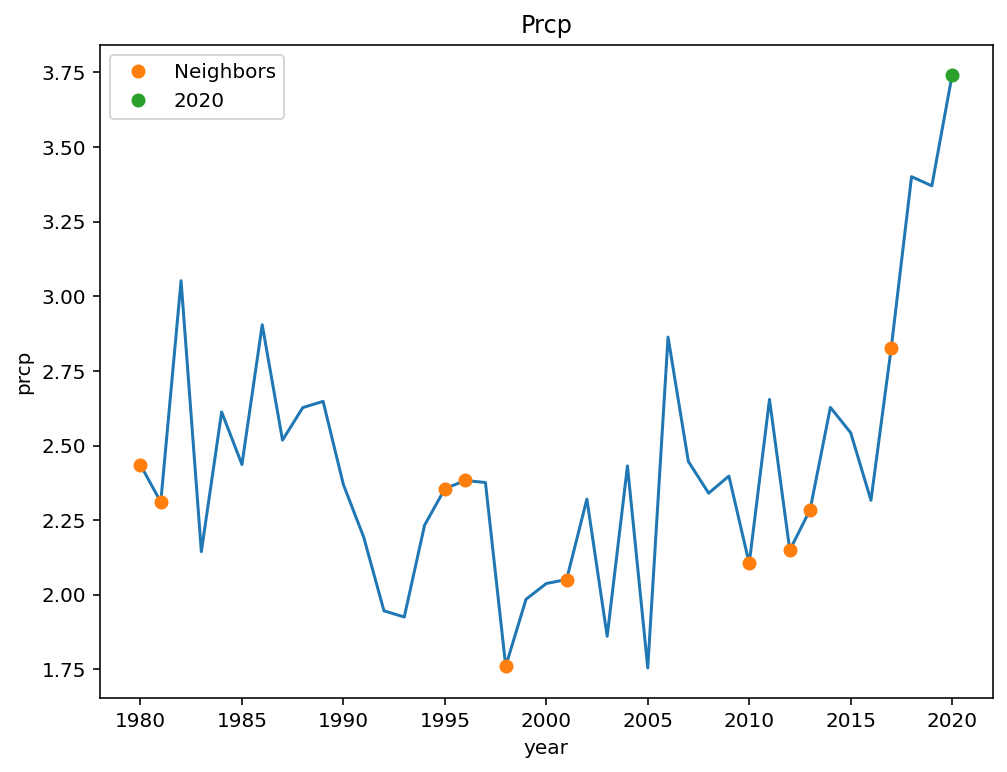

In [175]:
# the closest n34 years for precipitation
prcp.groupby('T.year').mean(('T','X','Y')).plot(figsize = (8, 6));
prcp.groupby('T.year').mean(('T','X','Y'))[knn].plot.line('o', label = 'Neighbors')
plt.plot(2020, prcp.groupby('T.year').mean(('T','X','Y'))[-1], 'o', label = '2020')
plt.title('Prcp')
plt.legend(loc = 'upper left');

In [176]:
# switch to anomalies
prcpa = prcp.groupby('T.month') - prcp.groupby('T.month').mean('T') # remove mean for each month separately 

/opt/conda/lib/python3.8/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [177]:
forecasts = []
for month in prcpa.groupby('T.month'):
    forecasts.append(month[1].isel(T=knn).mean('T'))
forecasts = xr.DataArray(forecasts, dims=['month','X','Y'])

/opt/conda/lib/python3.8/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


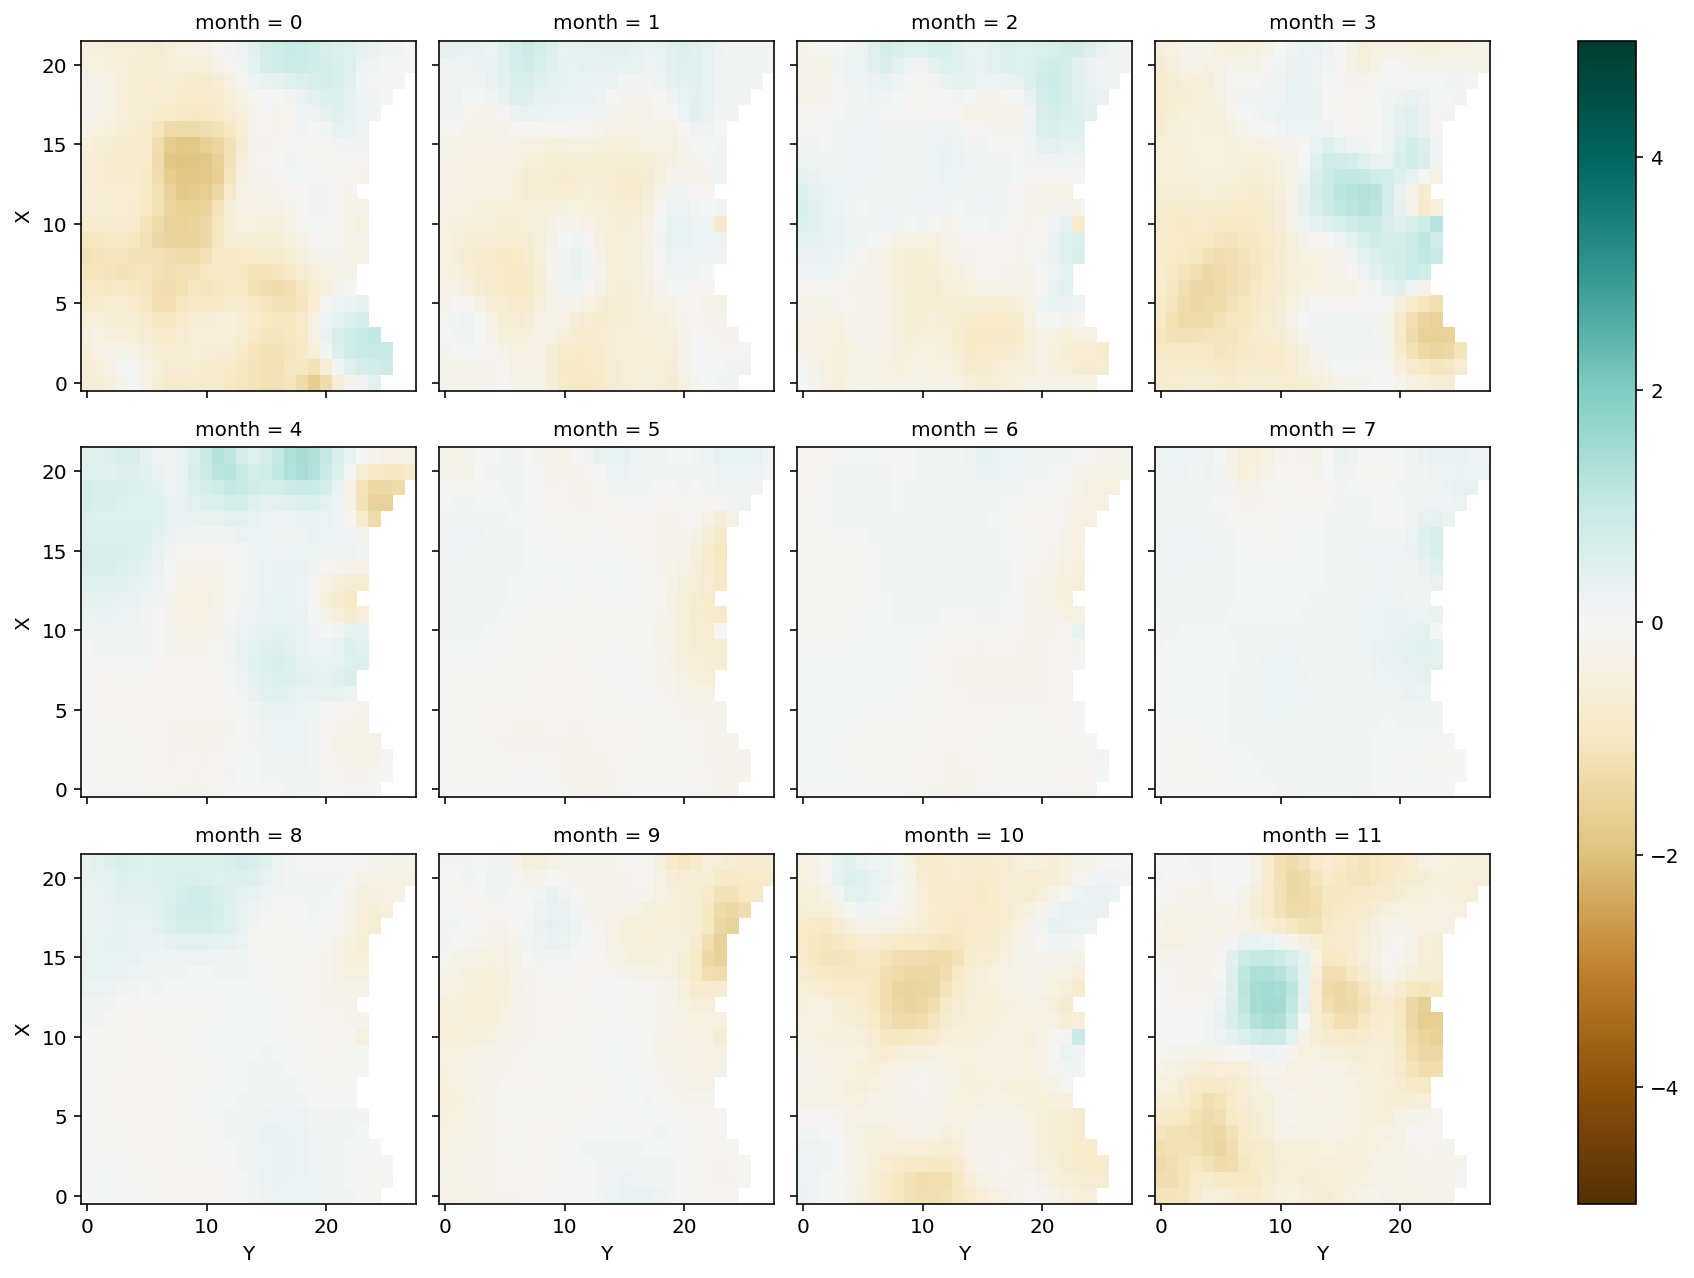

In [178]:
# Prediction of precipitation
forecasts.plot(col='month',col_wrap=4,vmin =-5,vmax=5, cmap='BrBG')

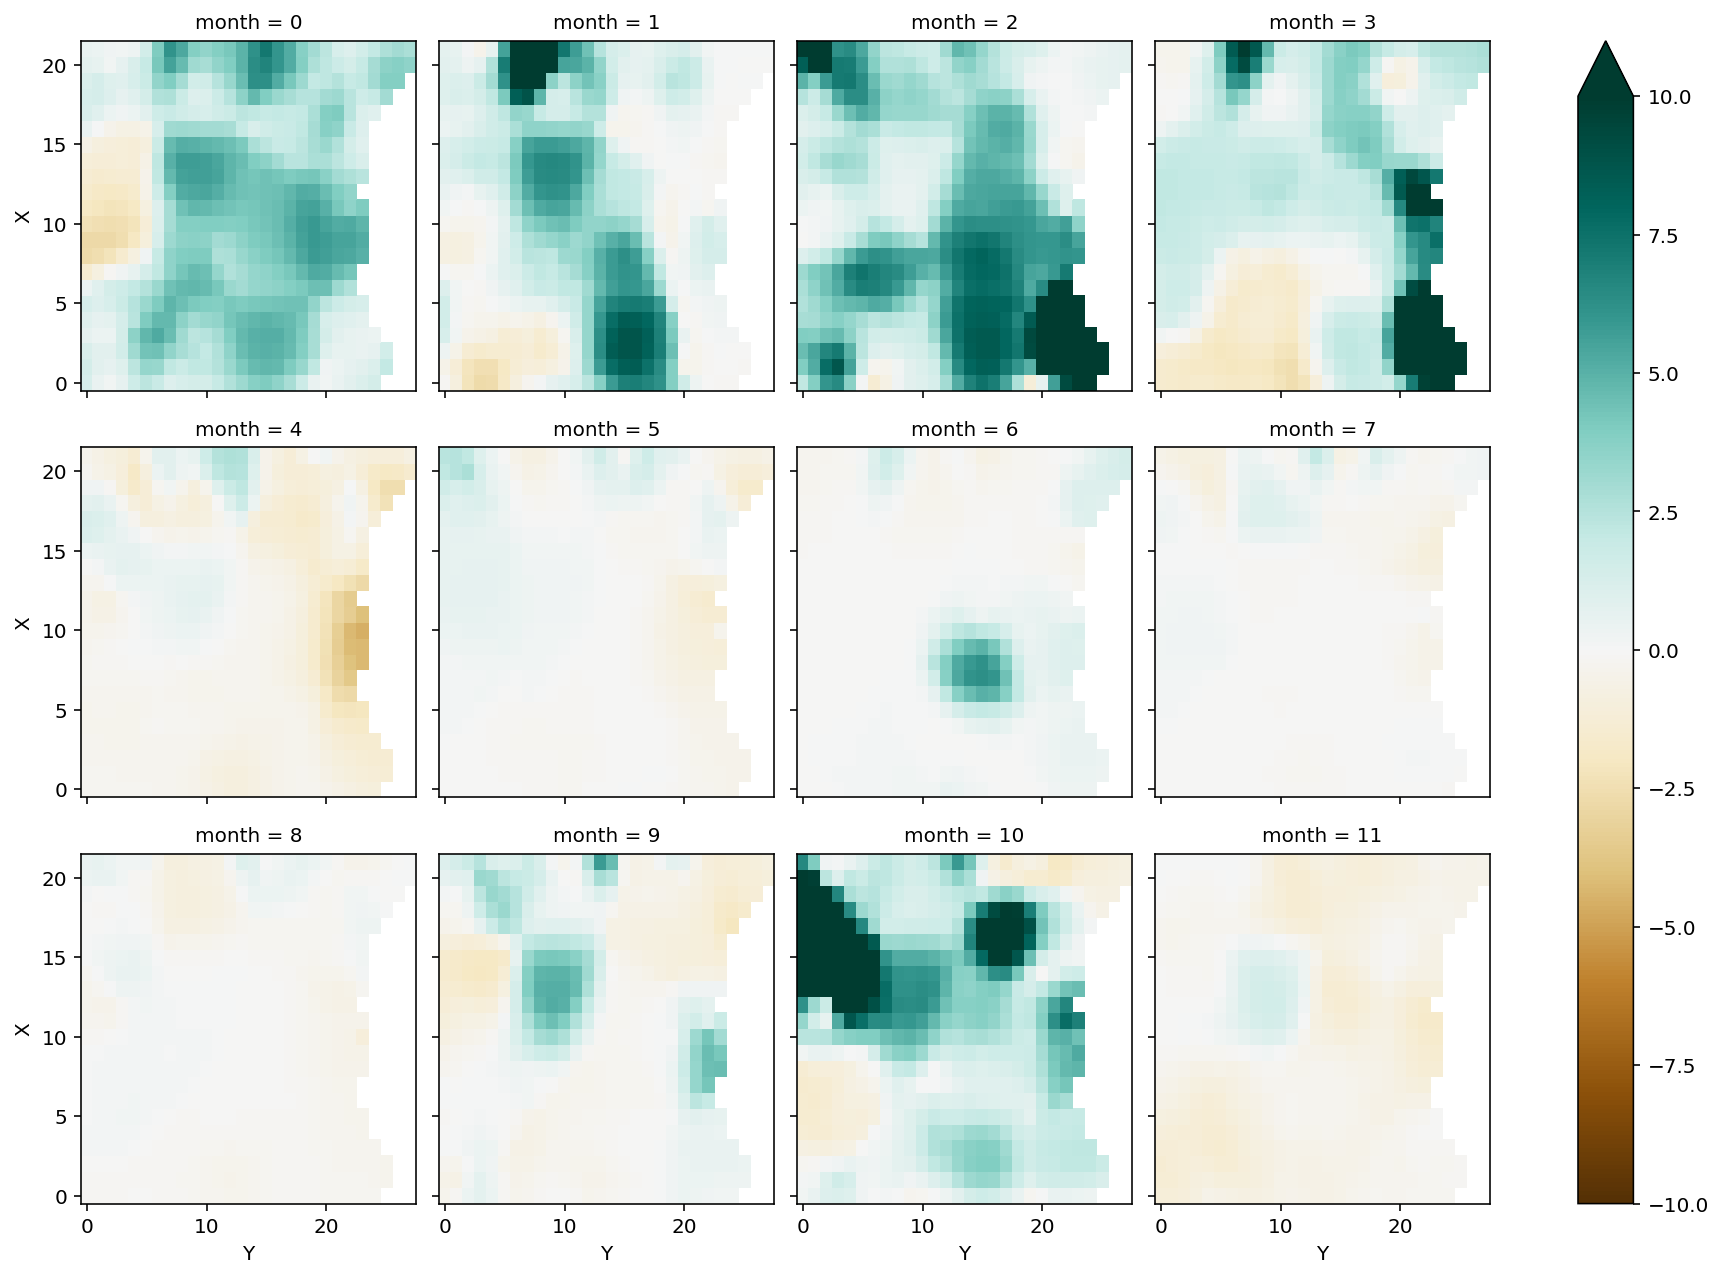

In [179]:
actuals = []
for month in prcpa.groupby('T.month'):
    if month[0] == 12:
        actuals.append(forecasts[-1])
    else:
        actuals.append(month[1][-1])
actuals = xr.DataArray(actuals, dims=['month','X','Y'])

actuals.plot(col='month',col_wrap=4,vmin =-10,vmax=10, cmap='BrBG')

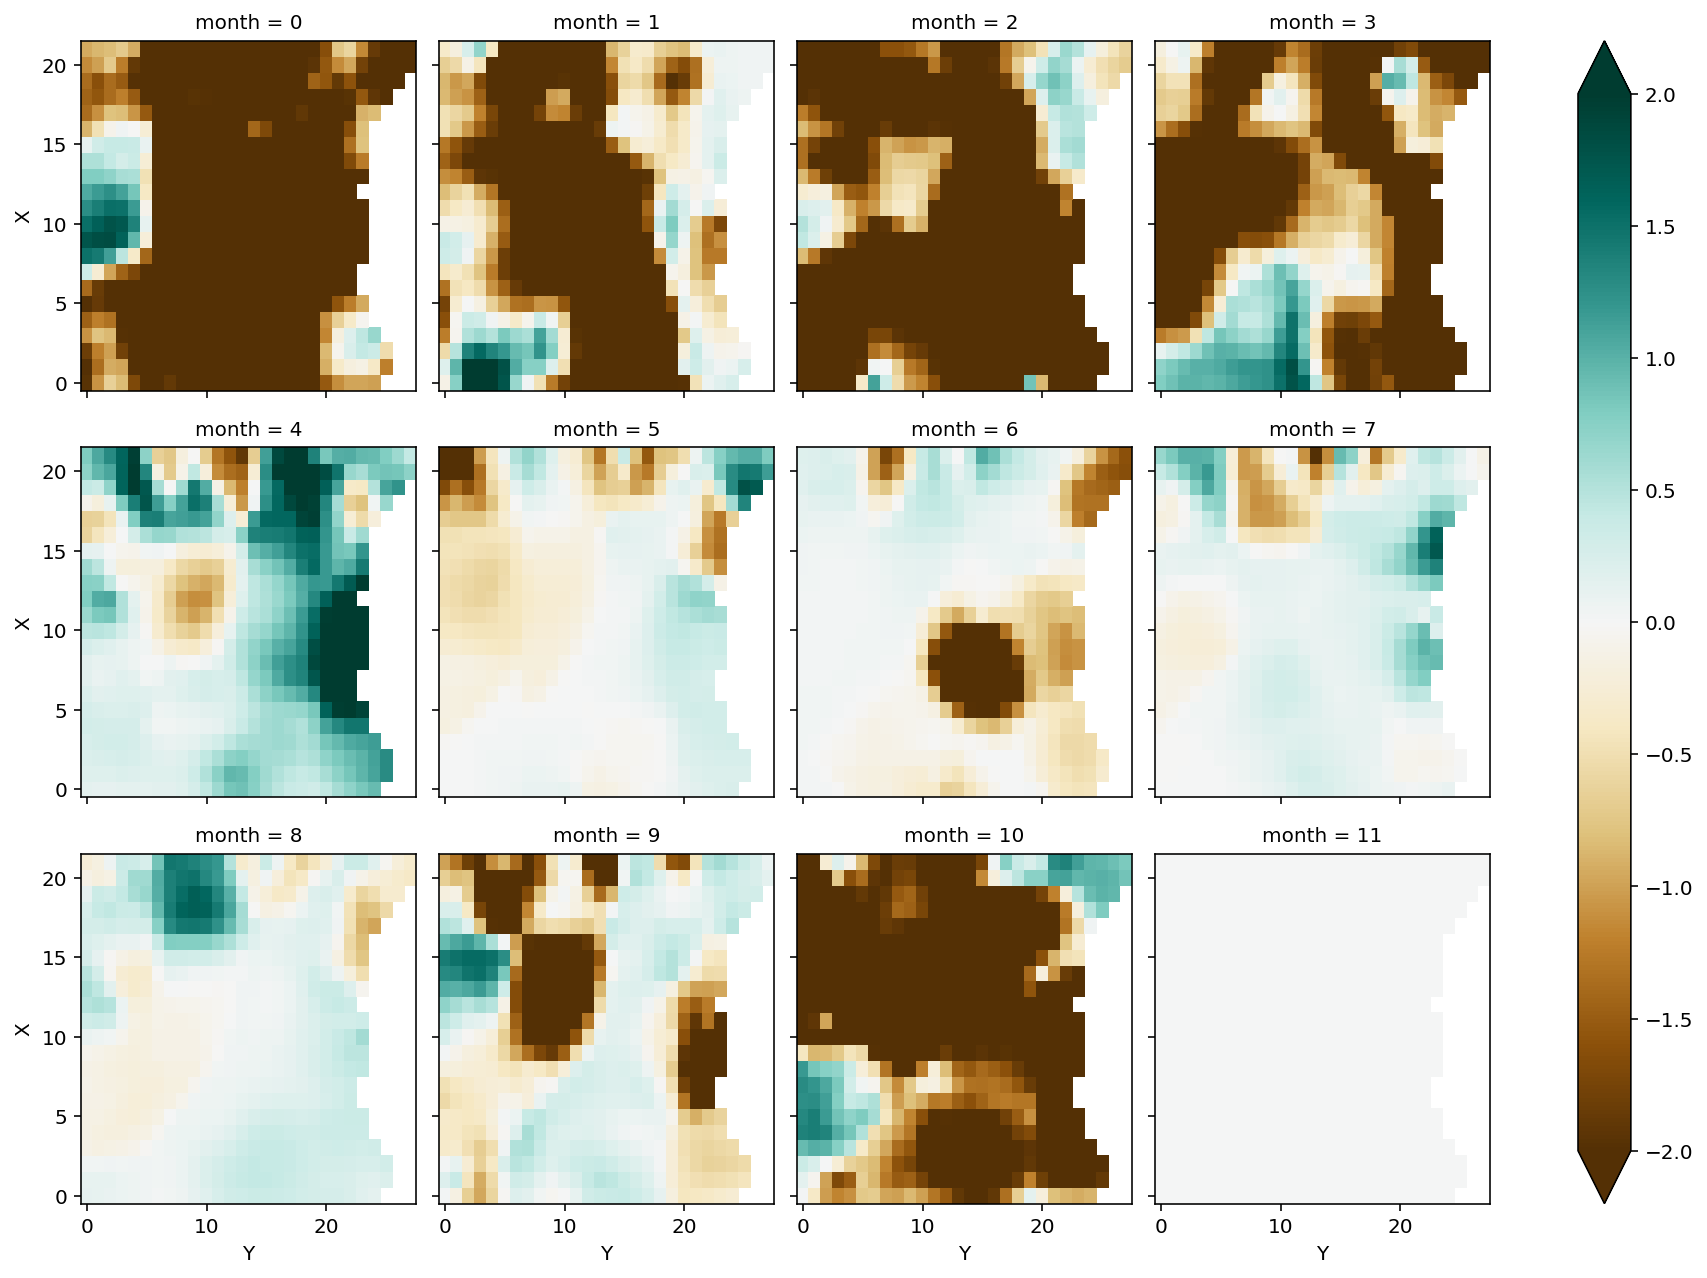

In [180]:
# Difference between forecasts and actuals
(forecasts - actuals).plot(col='month',col_wrap=4,vmin =-2,vmax=2, cmap='BrBG')

Clearly, this KNN analysis did a terrible job of predicting rainfall in 2020, with many drastic underestimates, like expected.

Since the 2015 El Nino was particularly strong, that will be the year predicted next. I will use k=4 since 2015 is the largest El Nino observed since 1980, so all other Nino 3.4 values will bring the average lower and lower from the 2015 value.

In [181]:
knn2 = np.argsort( (n34a.groupby('T.year').mean()[:-6] - n34a.groupby('T.year').mean()[-6])**2 ).values[:4]
knn2

array([17,  7,  2, 22])

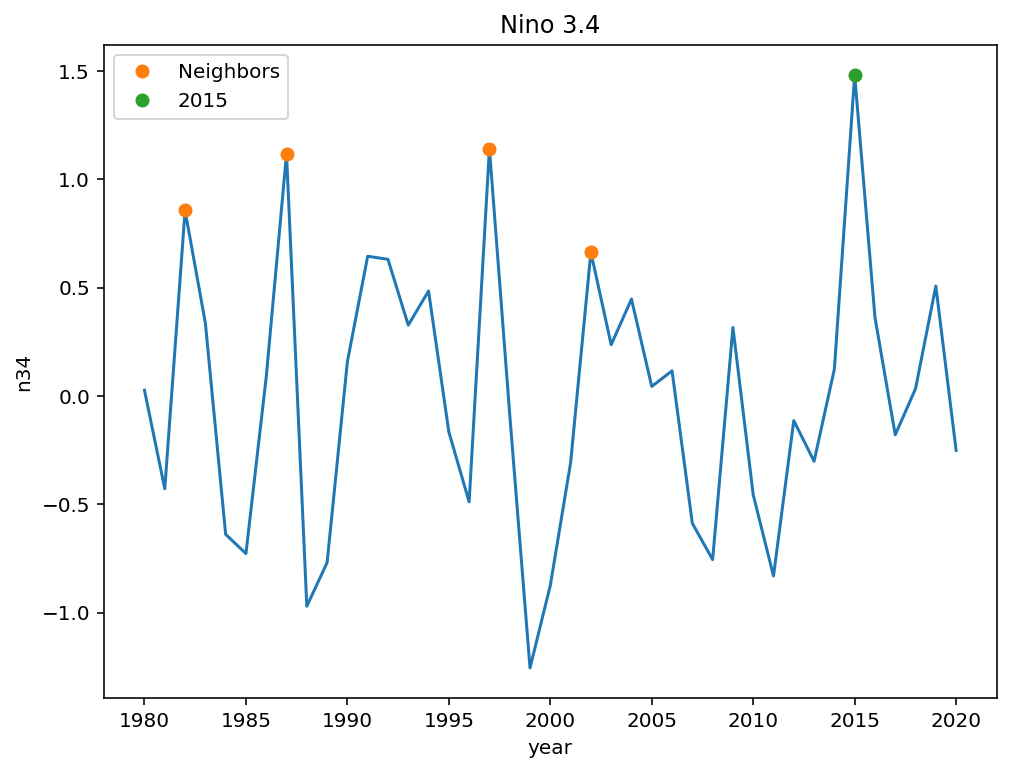

In [182]:
# Check that we have the right years
n34a.groupby('T.year').mean().plot(figsize = (8, 6));
n34a.groupby('T.year').mean()[knn2].plot.line('o', label = 'Neighbors')
plt.plot(2015, n34a.groupby('T.year').mean()[-6], 'o', label = '2015')
plt.title('Nino 3.4')
plt.legend(loc = 'upper left');

The graph below shows the precipitation values for the years determined to be the neareast neighbors for n34. The graph suggests the predictions might be okay, with slight underpredictions.

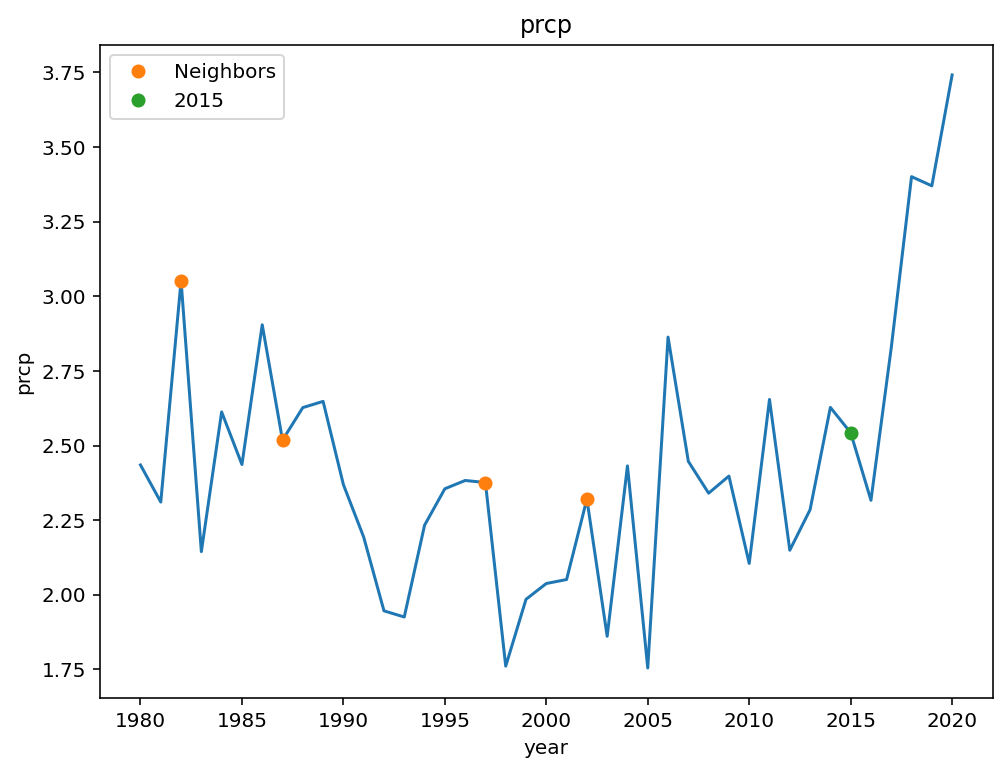

In [183]:
# the closest n34 years for precipitation
prcp.groupby('T.year').mean(('T','X','Y')).plot(figsize = (8, 6));
prcp.groupby('T.year').mean(('T','X','Y'))[knn2].plot.line('o', label = 'Neighbors')
plt.plot(2015, prcp.groupby('T.year').mean(('T','X','Y'))[-6], 'o', label = '2015')
plt.title('prcp')
plt.legend(loc = 'upper left');

In [184]:
forecasts = []
for month in prcpa.groupby('T.month'):
    forecasts.append(month[1].isel(T=knn2).mean('T'))
forecasts = xr.DataArray(forecasts, dims=['month','X','Y'])

/opt/conda/lib/python3.8/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


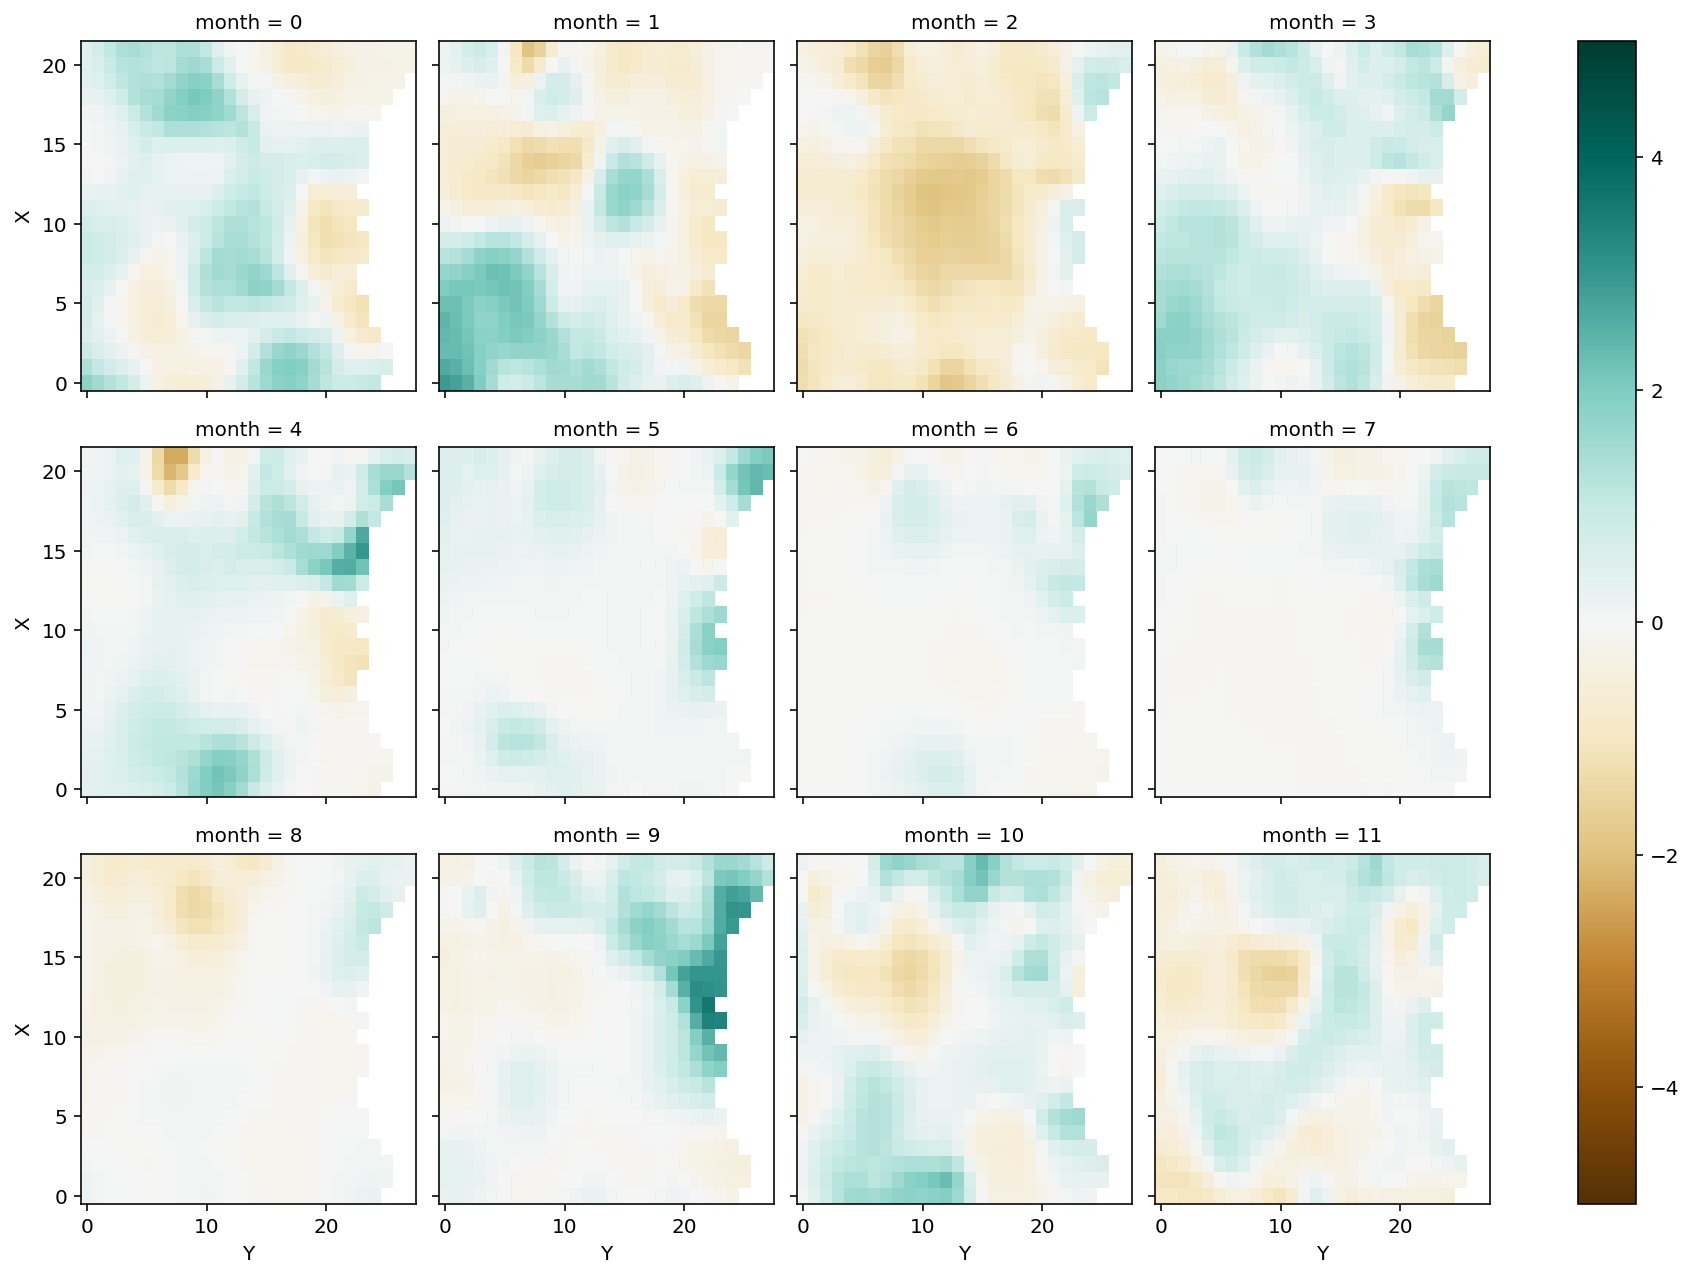

In [185]:
# Prediction of precipitation for 2015
forecasts.plot(col='month',col_wrap=4,vmin =-5,vmax=5, cmap='BrBG')

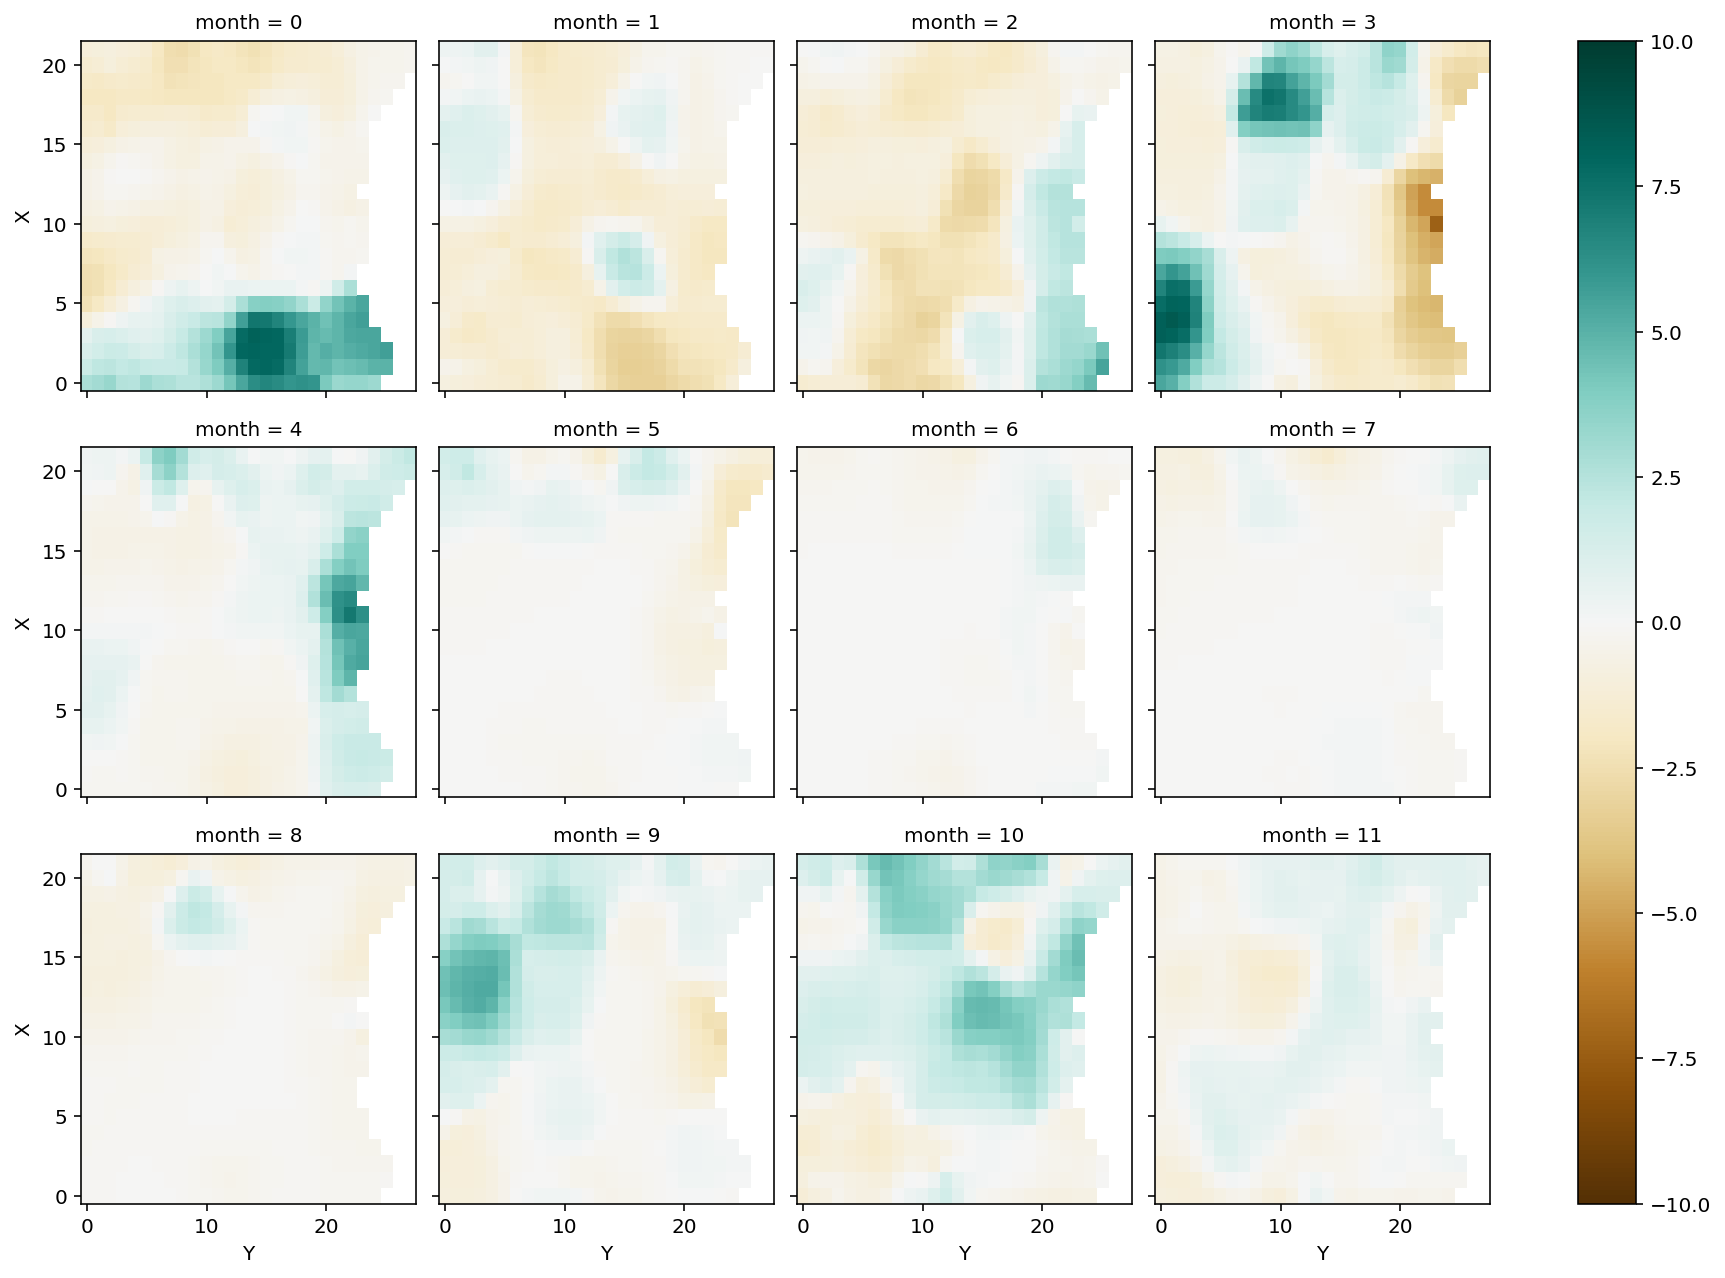

In [186]:
actuals = []
for month in prcpa.groupby('T.month'):
    if month[0] == 12:
        actuals.append(forecasts[-1])
    else:
        actuals.append(month[1][-6])
actuals = xr.DataArray(actuals, dims=['month','X','Y'])

actuals.plot(col='month',col_wrap=4,vmin =-10,vmax=10, cmap='BrBG')

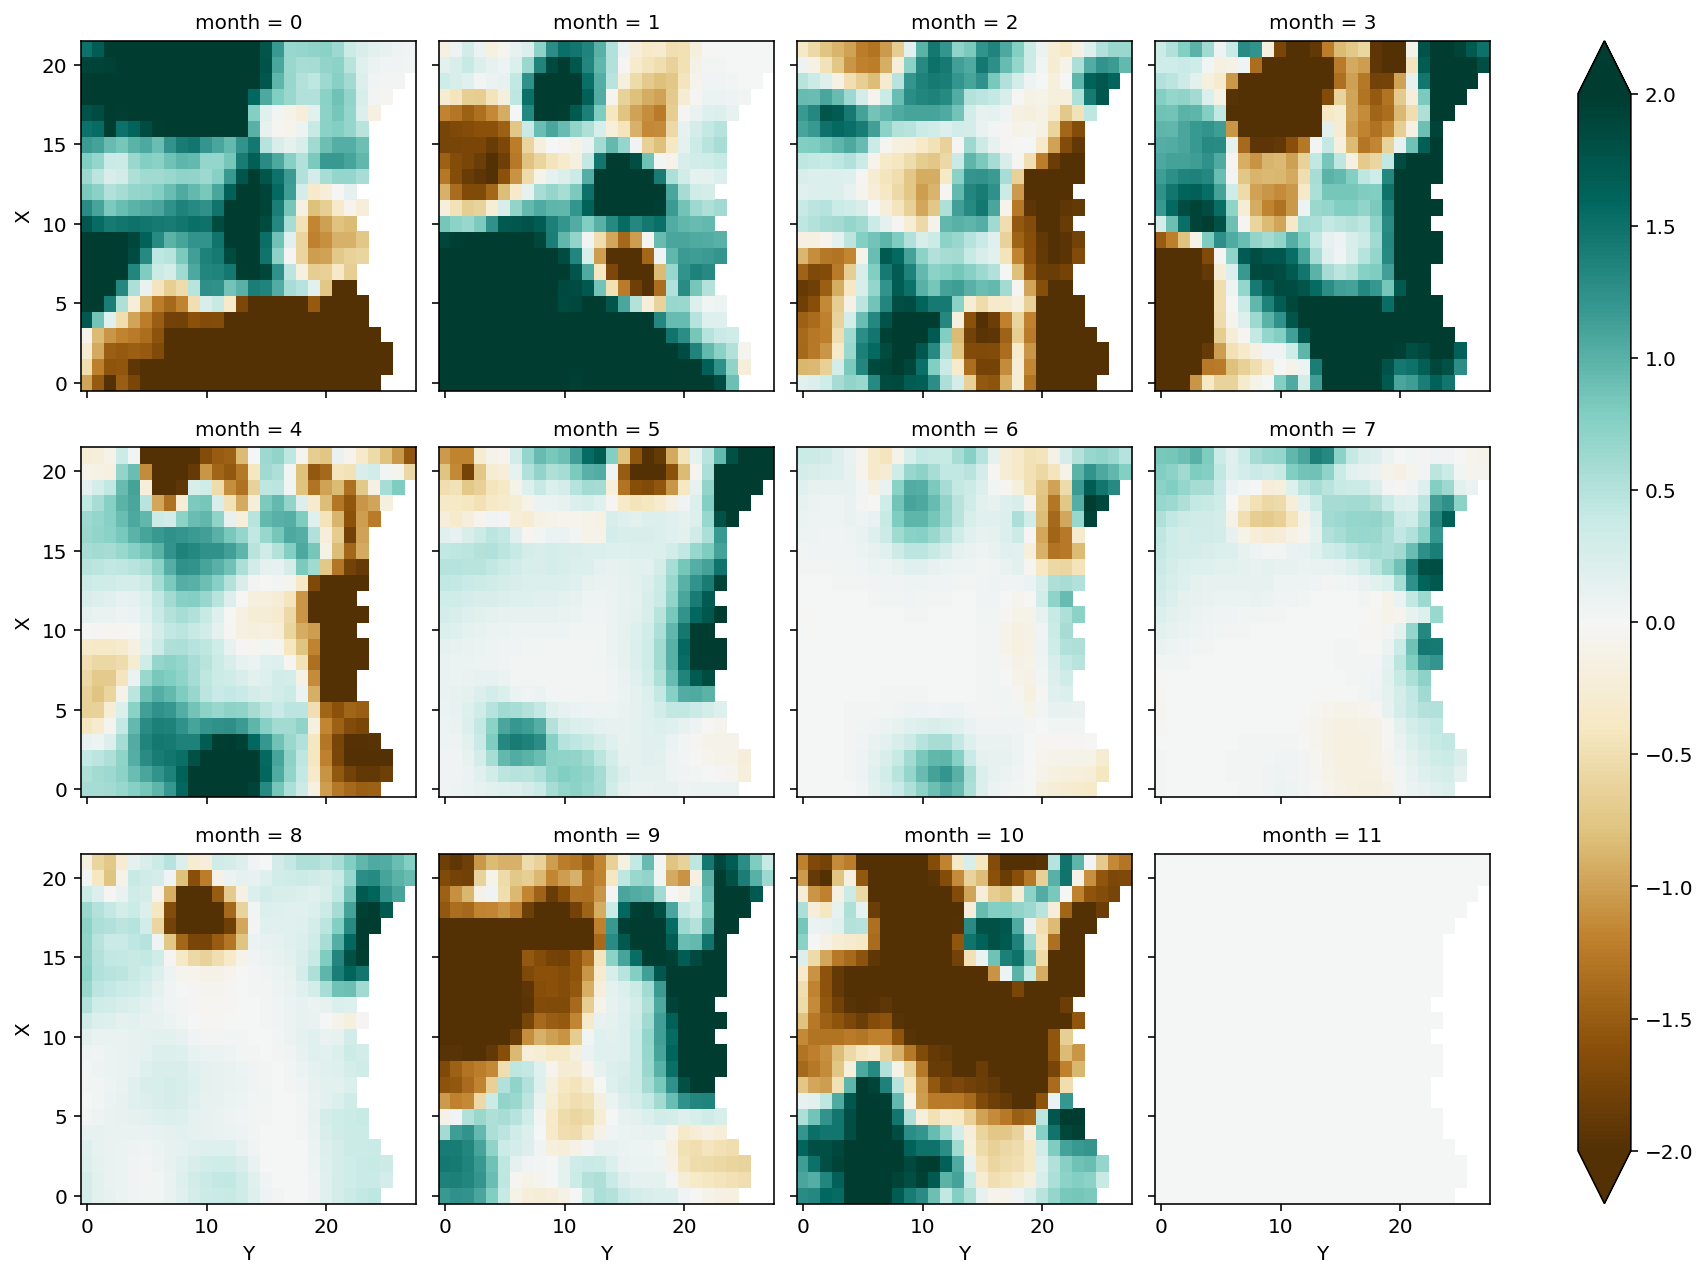

In [187]:
# Difference between forecasts and actuals
(forecasts - actuals).plot(col='month',col_wrap=4,vmin =-2,vmax=2, cmap='BrBG')

This KNN analysis also did a terrible job of predicting rainfall in 2016, with many drastic underestimates and overestimates.

#### Linear Regression

Below is a prediction using linear regression for the last date in the precipitation dataset.

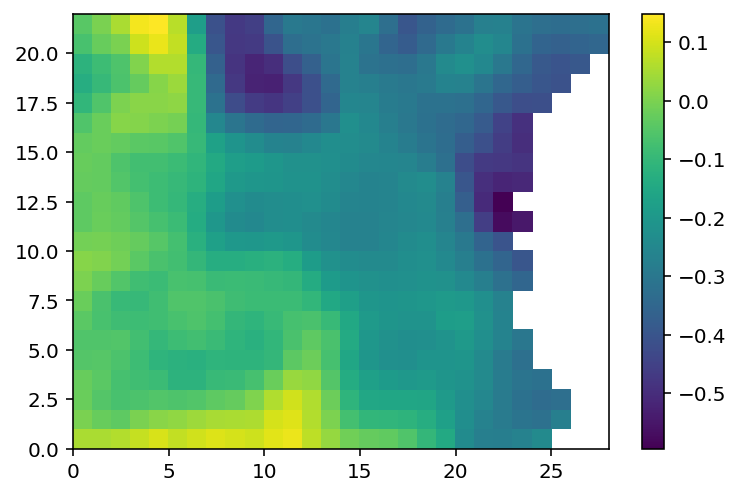

In [188]:
x = n34a[0:-1].values
xm = x.mean()
xa = x - xm
x0 = n34a[-1].values - xm

y = prcpa[0:-1].values

N = len(n34a)

Nx = len(xa)
X = np.empty((Nx,2))
X[:,1] = xa
X[:,0] = 1
beta = inv(X.T@X)@X.T@y.reshape(490,22*28)
yhat = X@beta

# forecast x0*beta
X0 = np.array([1,x0])
forecast = (X0@beta).reshape(22,28)
plt.pcolormesh(forecast)
plt.colorbar()

Below is the actual map of the precipitation on that day.

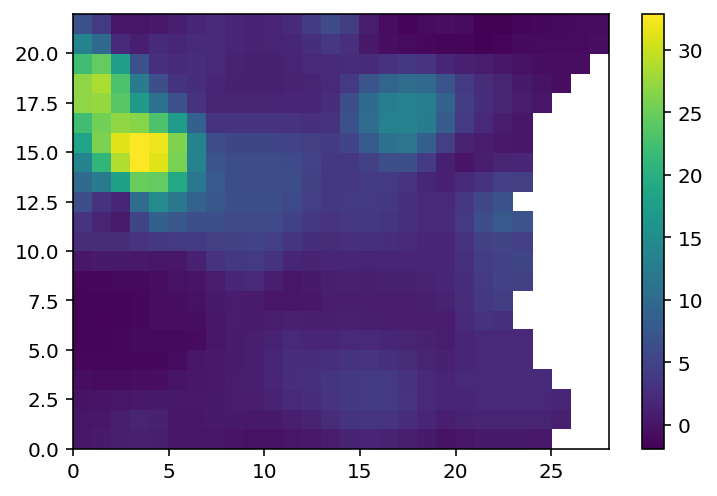

In [189]:
plt.pcolormesh(prcpa[-1].values)
plt.colorbar()

### c. Temperature

Next, I will move on to analyzing the temperature datasets. Below I plot the mean temperature by month. 

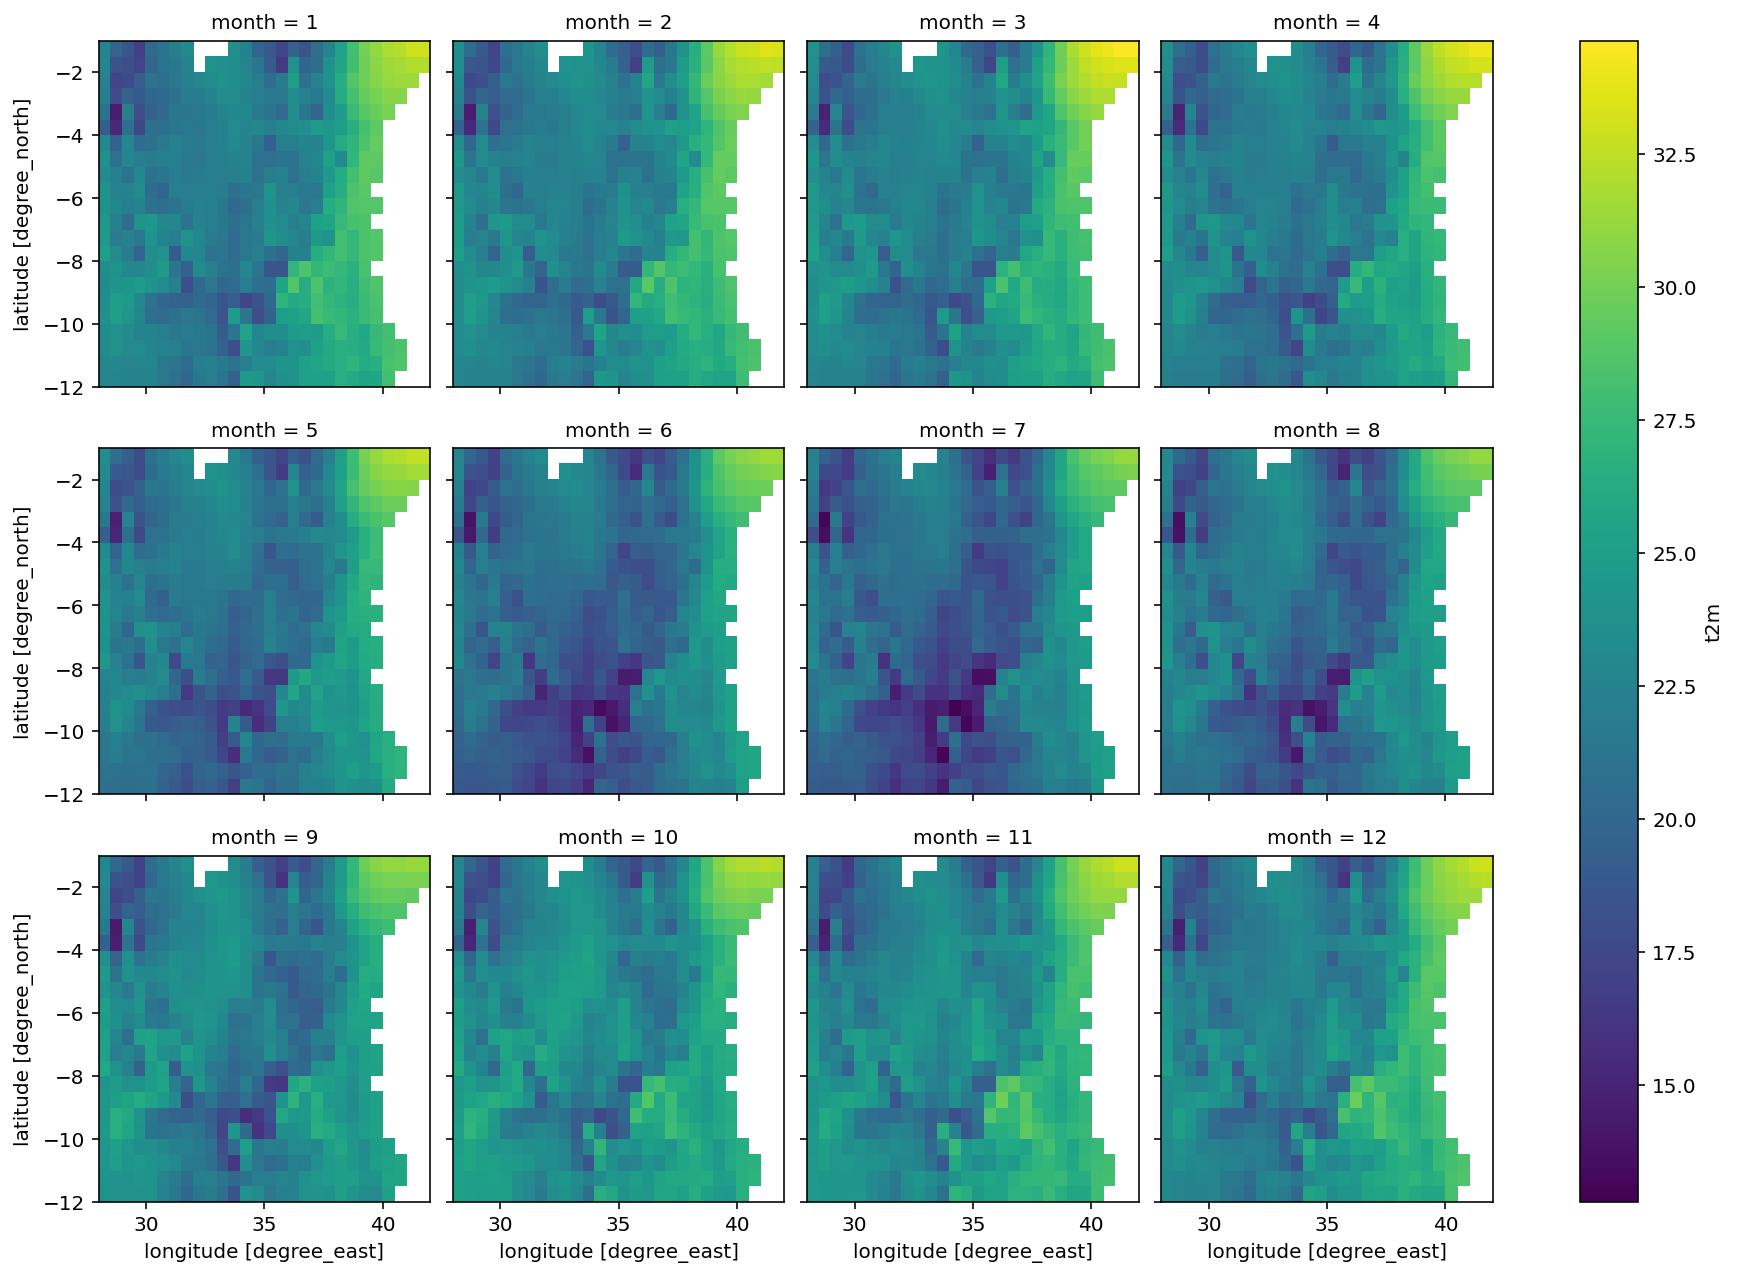

In [190]:
# TEMPERATURE
# Mean temperature by month
t2m.groupby("T.month").mean('T').plot(col='month',col_wrap=4)

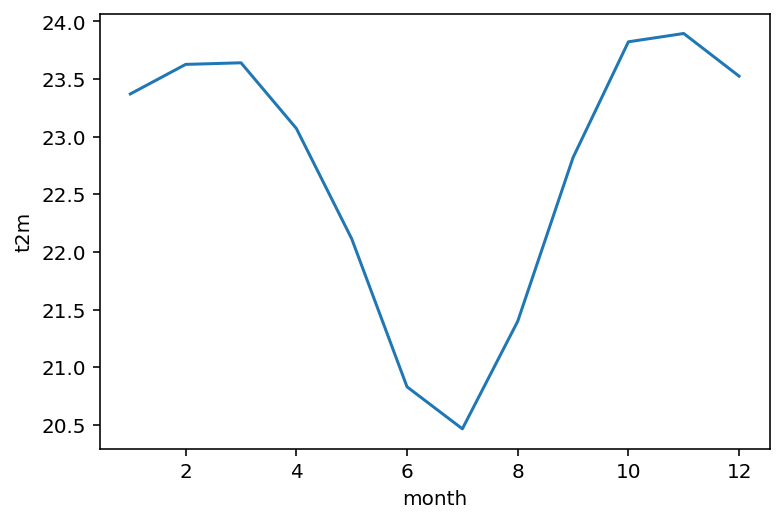

In [191]:
# temp on average by month
t2m.groupby('T.month').mean(('X', 'Y', 'T')).plot()

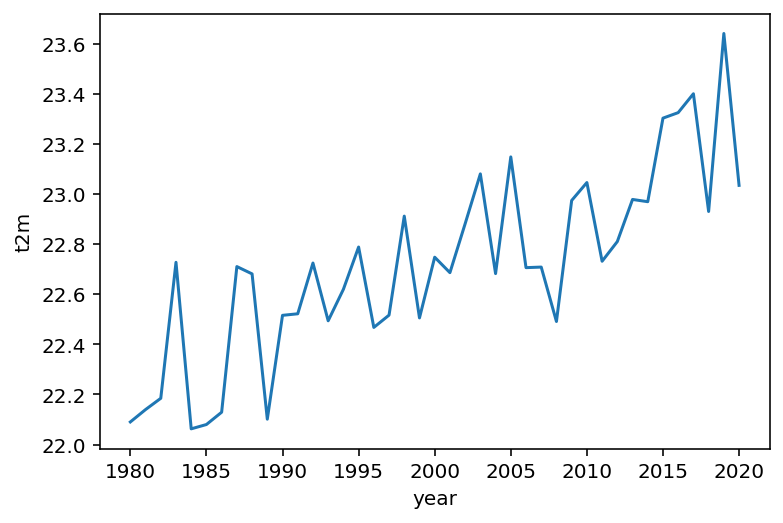

In [192]:
# Temperature on average by year
t2m.groupby("T.year").mean(('T','X','Y')).plot()

The above graph shows an increasing trend in the temperature, probably due to global warming.

#### Correlation - Temperature and Nino 3.4

/opt/conda/lib/python3.8/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


Text(0.5, 1.0, 'Correlation Temperature with Nino 3.4')

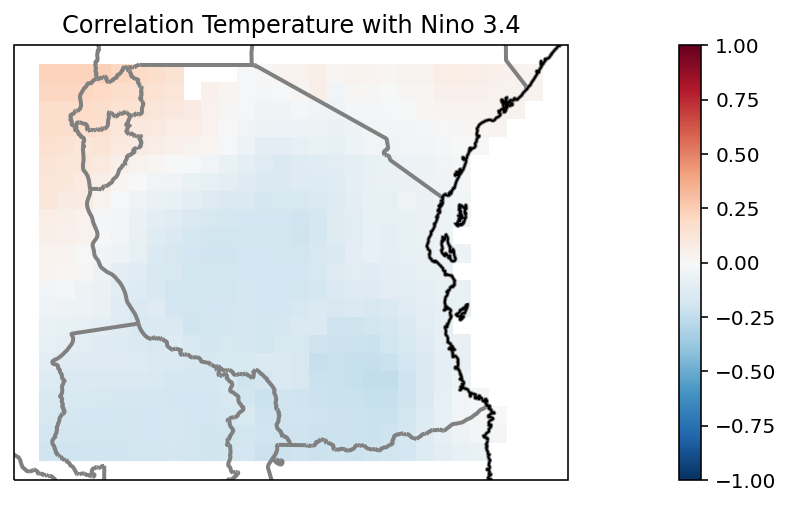

In [193]:
# correlation between full nino 3.4 and temp all months
r_t2m = xr.corr(n34, t2m, dim='T')

proj = ccrs.PlateCarree()
fig = plt.figure(figsize = (20,4))
ax = plt.subplot(projection = proj)

ax.coastlines(color = 'gray', linewidth = 2)
ax.add_feature(cfeature.BORDERS, edgecolor='gray', linewidth = 2);

r_t2m.plot(ax=ax, vmax = 1, transform=proj)
ax.coastlines();
ax.set_title('Correlation Temperature with Nino 3.4')

/opt/conda/lib/python3.8/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


Text(0.5, 1.0, 'Correlation Temperature with Nino 3.4')

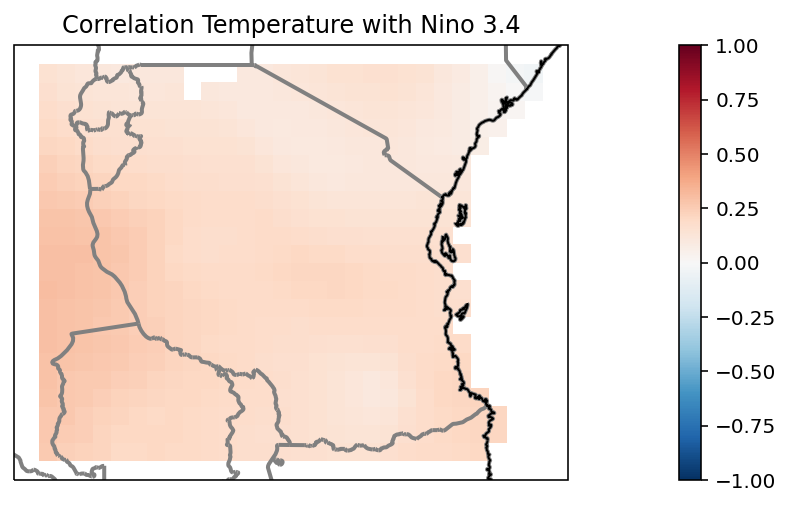

In [194]:
# correlation between full nino 3.4 and temp all months by month
t2ma = t2m.groupby('T.month') - t2m.groupby('T.month').mean('T') # anomaly
r_t2m = xr.corr(n34a, t2ma, dim='T')

proj = ccrs.PlateCarree()
fig = plt.figure(figsize = (20,4))
ax = plt.subplot(projection = proj)

ax.coastlines(color = 'gray', linewidth = 2)
ax.add_feature(cfeature.BORDERS, edgecolor='gray', linewidth = 2);

r_t2m.plot(ax=ax, vmax = 1, transform=proj)
ax.coastlines();
ax.set_title('Correlation Temperature with Nino 3.4')

Below shows the correlation between Nino 3.4 and temperature for every month in Tanzania. The graph below shows by month, where the correlations are significant (yellow = significant, purple = not significant).

/opt/conda/lib/python3.8/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


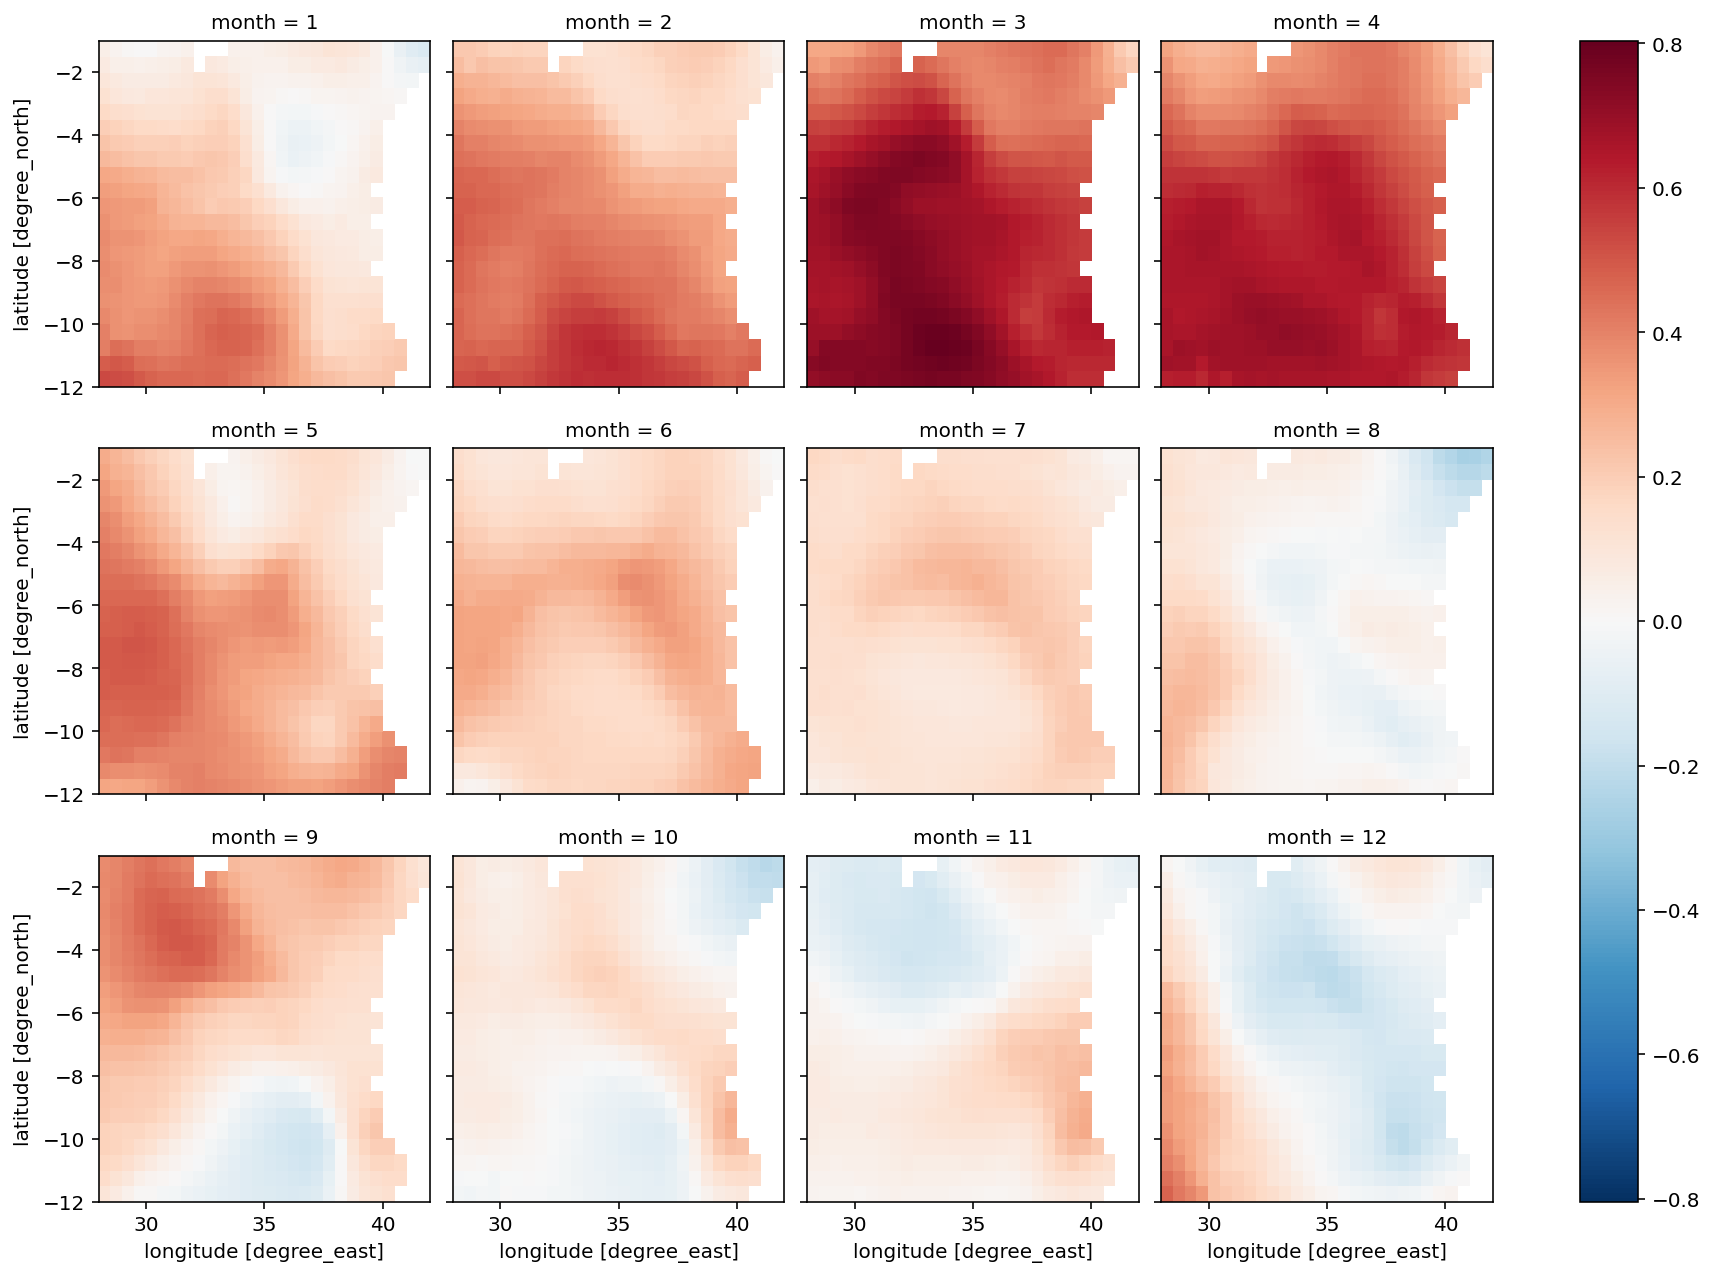

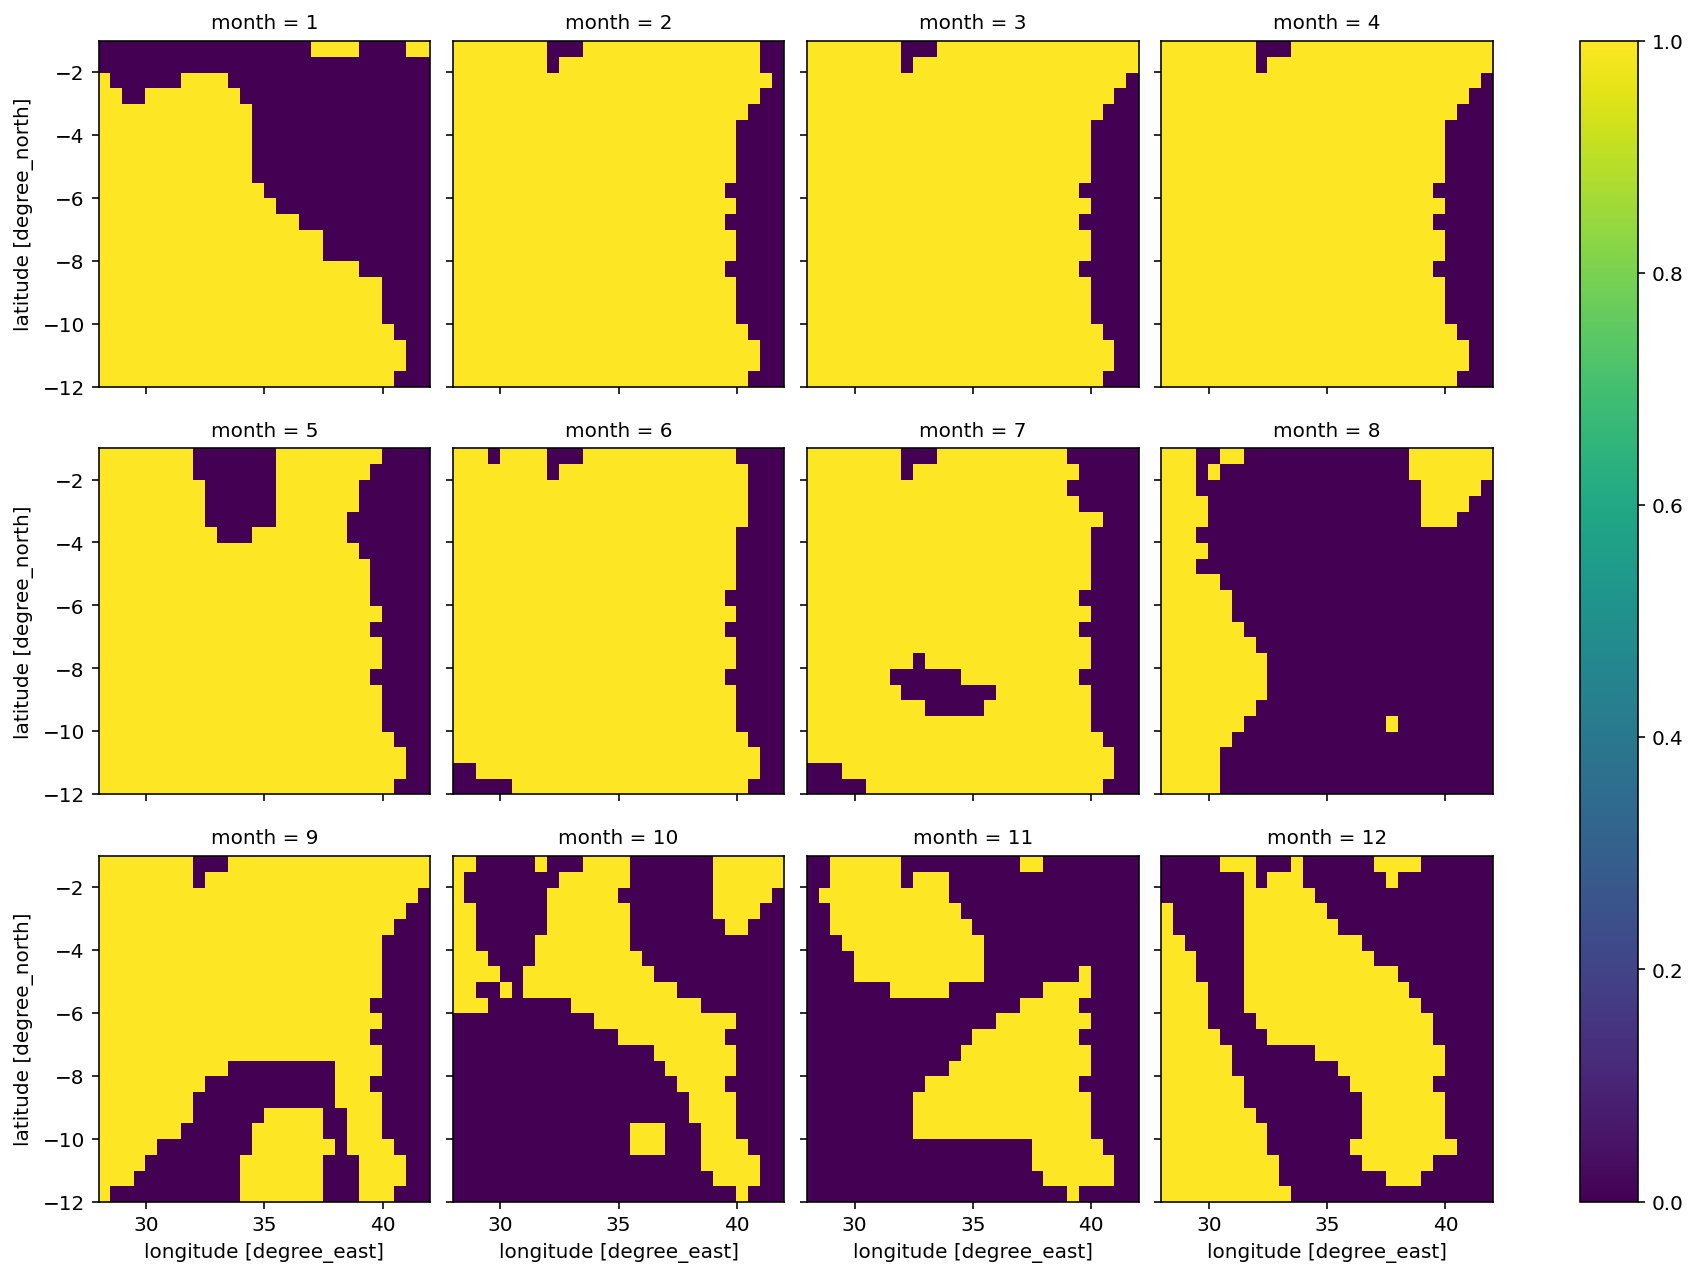

In [195]:
top = (n34a*t2ma).groupby('T.month').mean('T')
bottom = n34a.groupby('T.month').std('T') * t2ma.groupby('T.month').std('T')
c = top/bottom

N = len(n34)
sig_value = 2/np.sqrt(N)
c.plot(col='month',col_wrap=4)
xr.where(abs(c)> sig_value,1,0).plot(col='month',col_wrap=4)

In [196]:
np.count_nonzero(np.array(xr.where(abs(c)> sig_value,1,0)))/(np.array(c).shape[0]*np.array(c).shape[1]*np.array(c).shape[2])

0.6493506493506493

This map above shows that the values for the correlation between temperature and Nino 3.4 are significant almost 65% of the time in Tanzania (see above calculation, # non zero divided by total points).

#### T-Test for Difference in Means - Temperature in El Nino vs La Nina years

The code below generates the p-value for the difference in means of average temperature for the whole year for all of Tanzania between El Nino years and La Nina years.

In [198]:
X = t2m.groupby('T.year').mean(('T','X','Y'))[t_nina].values
Y = t2m.groupby('T.year').mean(('T','X','Y'))[t_nino].values 
pooled_var = ((Nx - 1)*X.var() + (Ny - 1)*Y.var())/(Nx + Ny - 2)
t = (X.mean() - Y.mean())/np.sqrt(pooled_var)/np.sqrt(1./Nx + 1./Ny)
p = (2*(1-stats.t.cdf(np.abs(t), df=df)))
p

0.0011296250837666832

Thus, there is a significant difference in temperature between El Nino and La Nina years in Tanzania (p=.0011).

The graphs below show the difference in temperature between El Nino years and La Nina years. From the graphs, it seems like everywhere is warmer during El Nino years than during La Nina years, especially in March and April.

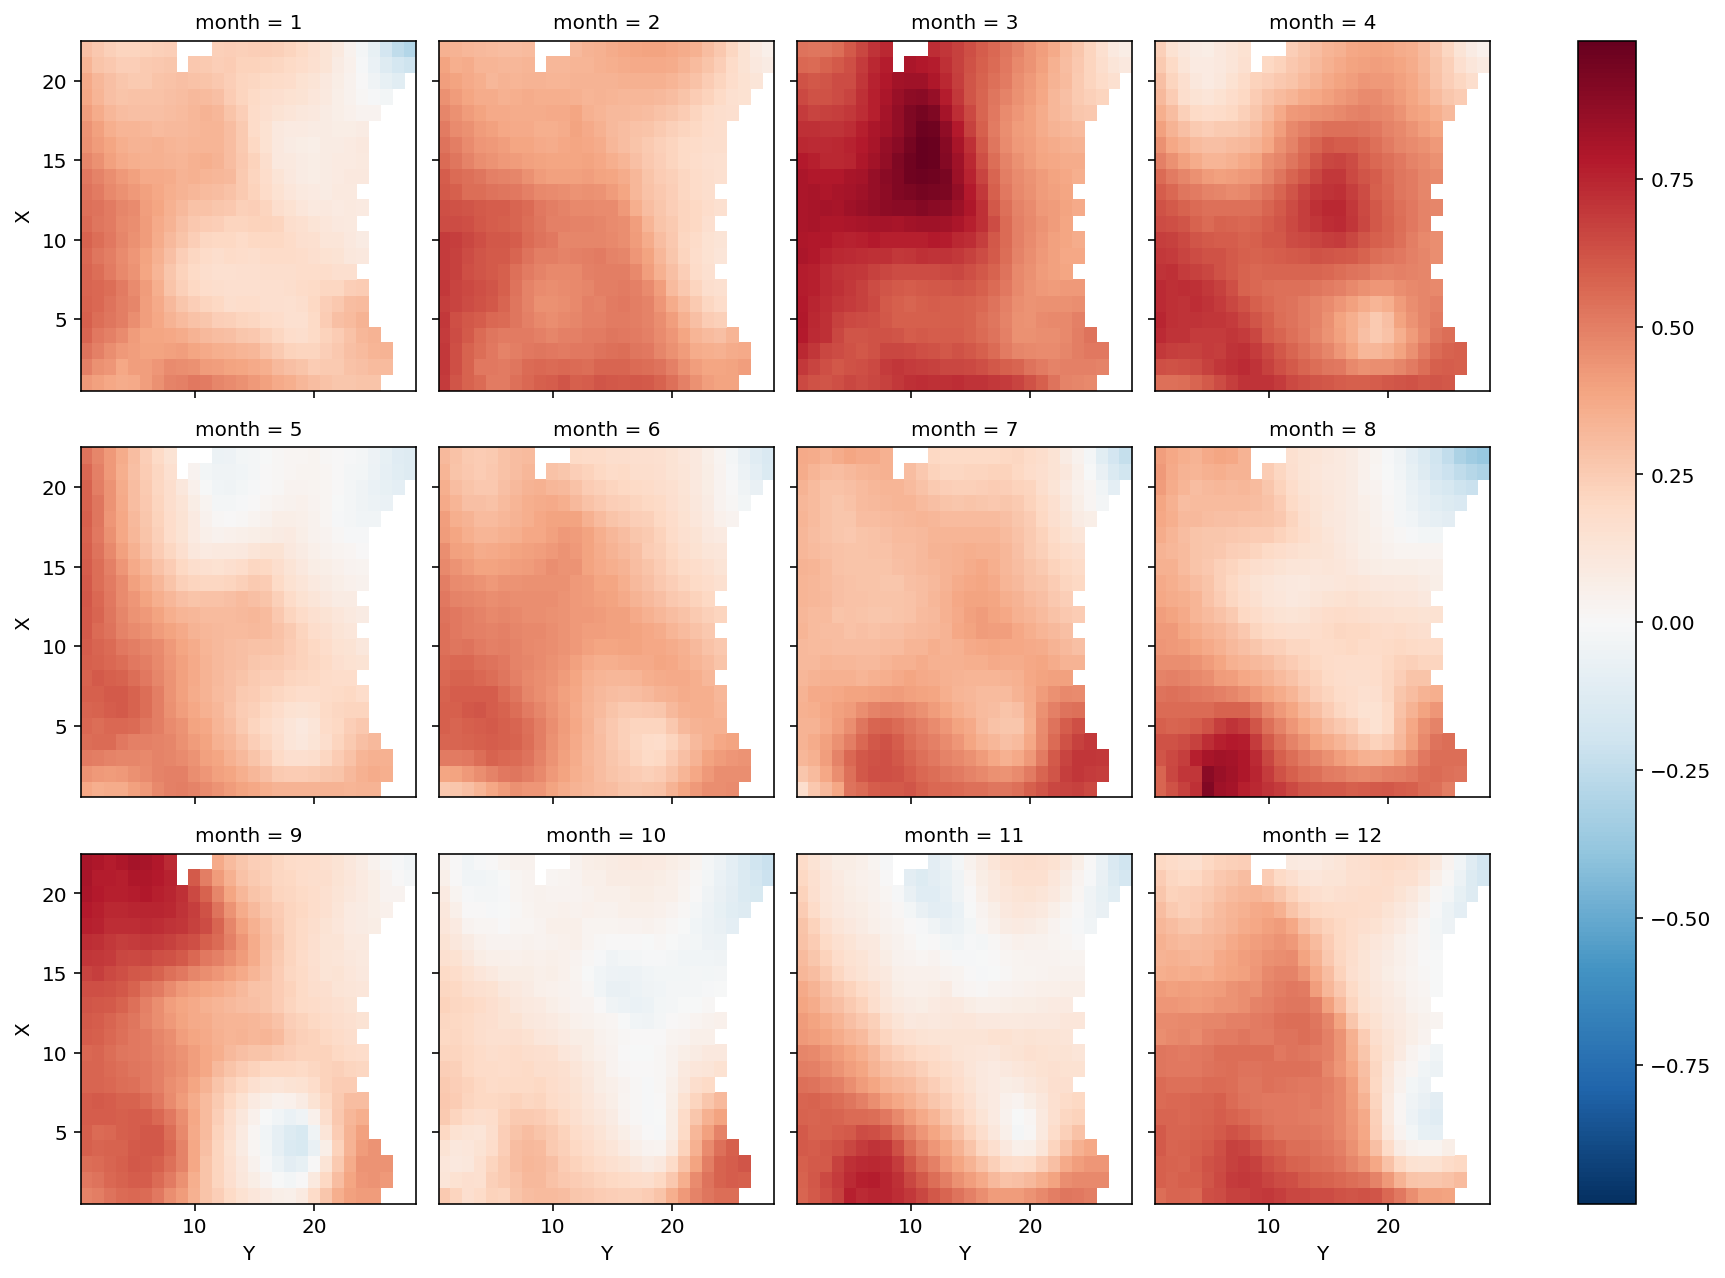

In [199]:
dif = []
for month in t2m.groupby('T.month'):
    if month[0] == 12:
        dif.append(month[1].values[t_nino[:-1],:,:].mean(axis = 0) - month[1].values[t_nina[:-1],:,:].mean(axis = 0))
    else:
        dif.append(month[1].values[t_nino,:,:].mean(axis = 0) - month[1].values[t_nina,:,:].mean(axis = 0)) 
dif = np.array(dif)
dif = xr.DataArray(dif,coords = [list(range(1,13)),list(range(1,23)),list(range(1,29))], dims=['month','X','Y'])
dif.plot(col='month',col_wrap=4,cmap = 'RdBu_r')

Below is a t-test for difference in means for temperature during El Nino vs La Nina years for every month.

In [200]:
p = []
tss = []
for month in t2m.groupby('T.month'):
    if month[0] == 12:
        X = month[1].mean(('X','Y'))[t_nina[:-1]].values
        Y = month[1].mean(('X','Y'))[t_nino[:-1]].values 
        pooled_var = ((Nx - 1)*X.var() + (Ny - 1)*Y.var())/(Nx + Ny - 2)
        t = (X.mean() - Y.mean())/np.sqrt(pooled_var)/np.sqrt(1./Nx + 1./Ny)
        tss.append(t)
        p.append(2*(1-stats.t.cdf(np.abs(t), df=df)))
    else:
        X = month[1].mean(('X','Y'))[t_nina].values
        Y = month[1].mean(('X','Y'))[t_nino].values 
        pooled_var = ((Nx - 1)*X.var() + (Ny - 1)*Y.var())/(Nx + Ny - 2)
        t = (X.mean() - Y.mean())/np.sqrt(pooled_var)/np.sqrt(1./Nx + 1./Ny)
        tss.append(t)
        p.append(2*(1-stats.t.cdf(np.abs(t), df=df)))     
print("The p values for difference in temperature means between El Nino years and La Nina years are by month: ")
p

The p values for difference in temperature means between El Nino years and La Nina years are by month: 


[0.02407308918568285,
 0.0018418852747033032,
 1.04193952821241e-06,
 0.0013403401461686837,
 0.04182993810537328,
 0.01965896571816339,
 0.0024911248723922252,
 0.00648553635381055,
 0.00206816653194708,
 0.46158909666941583,
 0.18763474556105475,
 0.00025906929104535514]

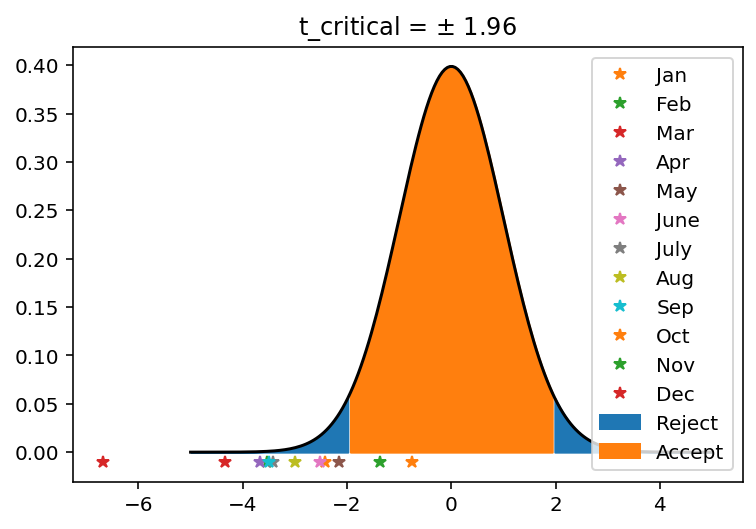

In [148]:
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
df = Nx + Ny - 2

alpha = 0.05
t_05 = stats.t.ppf(1 - 0.05/2, df = df)
plt.title('t_critical = $\pm$ {:4.2f}'.format(t_05))

ts = np.linspace(-5, 5, 200)
plt.plot(ts, stats.t.pdf(ts, df=df), color='k');
ts_left = ts[ts <= - t_05]
ts_right = ts[ts >= t_05]
ts_middle = ts[ (ts < t_05) & (ts > - t_05) ]


plt.fill_between(ts_left, stats.t.pdf(ts_left, df=df), color = colors[0], label='Reject')
plt.fill_between(ts_right, stats.t.pdf(ts_right, df=df), color = colors[0])
plt.fill_between(ts_middle, stats.t.pdf(ts_middle, df=df), color = colors[1], label='Accept')

plt.plot(tss[0], -0.01, '*', color = colors[1], label = 'Jan')
plt.plot(tss[1], -0.01, '*', color = colors[2], label = 'Feb')
plt.plot(tss[2], -0.01, '*', color = colors[3], label = 'Mar')
plt.plot(tss[3], -0.01, '*', color = colors[4], label = 'Apr')
plt.plot(tss[4], -0.01, '*', color = colors[5], label = 'May')
plt.plot(tss[5], -0.01, '*', color = colors[6], label = 'June')
plt.plot(tss[6], -0.01, '*', color = colors[7], label = 'July')
plt.plot(tss[7], -0.01, '*', color = colors[8], label = 'Aug')
plt.plot(tss[8], -0.01, '*', color = colors[9], label = 'Sep')
plt.plot(tss[9], -0.01, '*', color = colors[1], label = 'Oct')
plt.plot(tss[10], -0.01, '*', color = colors[2], label = 'Nov')
plt.plot(tss[11], -0.01, '*', color = colors[3], label = 'Dec')

plt.legend(loc='right');

There is a significant difference in temperatures in Tanzania for El Nino and La Nina years for every month except October and November, with January (p = .0241), February (p = .0018), March (p = 1.0419e-6), April (p = .0013), May (p = .0418), June (p = .0197), July (p = .0025), August (p = .0065), September (p = .0021), and December (p = .0003). If this was a tailed t-test, since we previously understood that the temperature would be hotter (not just different), the p-values would be even smaller, implying the probability of obtaining these same results under the assumption that the two means have no significant difference (mean of temperature during El Nino years = mean of temperature during La Nina years) is even less likely.

Below shows the p-values on the map by month. Significant values (p<.05) are shown in yellow.

<ipython-input-201-4f2f57f5d7d3>:23: RuntimeWarning: invalid value encountered in true_divide
  t = (X.mean(axis=0) - Y.mean(axis=0))/np.sqrt(pooled_var)/np.sqrt(1./Nx + 1./Ny)
<ipython-input-201-4f2f57f5d7d3>:12: RuntimeWarning: invalid value encountered in true_divide
  t = (X.mean(axis=0) - Y.mean(axis=0))/np.sqrt(pooled_var)/np.sqrt(1./Nx + 1./Ny)


The p values for difference in temperature means between El Nino years and La Nina years are by month: 


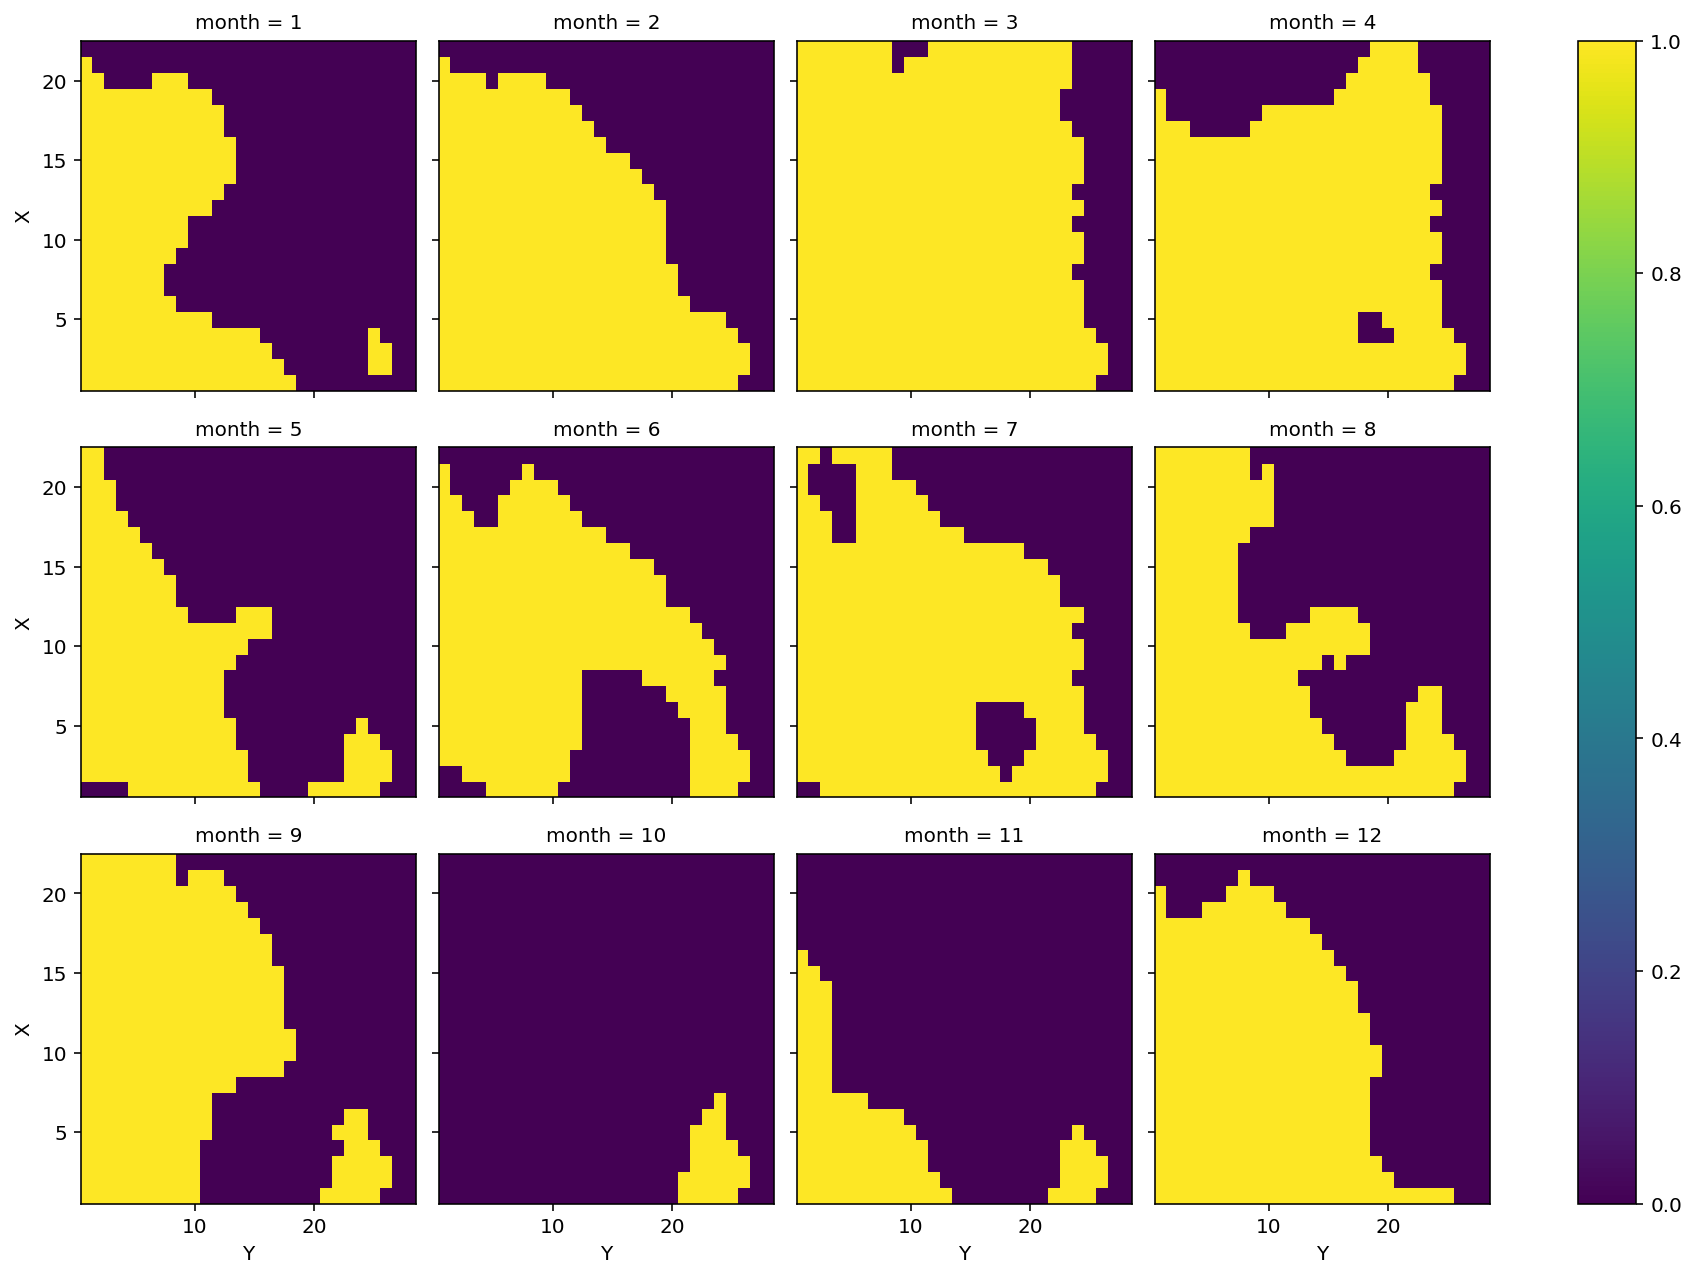

In [201]:
p = []
tss = []
for month in t2m.groupby('T.month'):
    if month[0] == 12:
        X = month[1].values[t_nina[:-1],:,:]
        Y = month[1].values[t_nino[:-1],:,:]
        where_are_NaNs = np.isnan(X)
        X[where_are_NaNs] = 0
        where_are_NaNs = np.isnan(Y)
        Y[where_are_NaNs] = 0
        pooled_var = ((Nx - 1)*X.var(axis=0) + (Ny - 1)*Y.var(axis=0))/(Nx + Ny - 2)
        t = (X.mean(axis=0) - Y.mean(axis=0))/np.sqrt(pooled_var)/np.sqrt(1./Nx + 1./Ny)
        tss.append(t)
        p.append(2*(1-stats.t.cdf(np.abs(t), df=df)))
    else:
        X = month[1].values[t_nina,:,:]
        Y = month[1].values[t_nino,:,:]
        where_are_NaNs = np.isnan(X)
        X[where_are_NaNs] = 0
        where_are_NaNs = np.isnan(Y)
        Y[where_are_NaNs] = 0
        pooled_var = ((Nx - 1)*X.var(axis=0) + (Ny - 1)*Y.var(axis=0))/(Nx + Ny - 2)
        t = (X.mean(axis=0) - Y.mean(axis=0))/np.sqrt(pooled_var)/np.sqrt(1./Nx + 1./Ny)
        tss.append(t)
        p.append(2*(1-stats.t.cdf(np.abs(t), df=df)))     
print("The p values for difference in temperature means between El Nino years and La Nina years are by month: ")
where_are_NaNs = np.isnan(p)
p = np.array(p)
p = xr.DataArray(p)
p = xr.DataArray(p,coords = [list(range(1,13)),list(range(1,23)),list(range(1,29))], dims=['month','X','Y'])
#p.plot(col='month',vmin=0,vmax=.05,col_wrap=4,cmap = 'RdBu_r')
xr.where(p < .05,1,0).plot(col='month',col_wrap=4)

#### KNN

I will use KNN to predict, for each month, the 2020 temperature. Every month's actual 2020 temperature is available for comparison except December.

The graph below shows the temperature values for the years determined to be the neareast neighbors for n34. The graph suggests the predictions might be okay, with slight underpredictions.

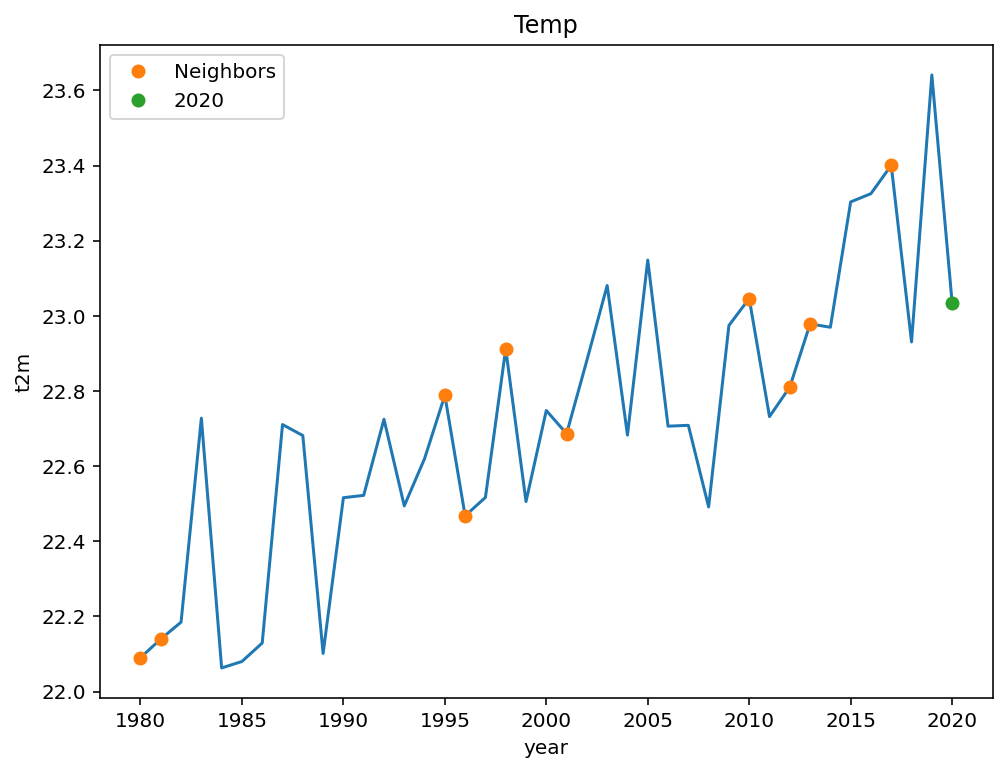

In [202]:
# the closest n34 years for temperature
t2m.groupby('T.year').mean(('T','X','Y')).plot(figsize = (8, 6));
t2m.groupby('T.year').mean(('T','X','Y'))[knn].plot.line('o', label = 'Neighbors')
plt.plot(2020, t2m.groupby('T.year').mean(('T','X','Y'))[-1], 'o', label = '2020')
plt.title('Temp')
plt.legend(loc = 'upper left');

In [203]:
# switch to anomalies
t2ma = t2m.groupby('T.month') - t2m.groupby('T.month').mean('T') # remove mean for each month separately 

/opt/conda/lib/python3.8/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [204]:
forecasts = []
for month in t2ma.groupby('T.month'):
    forecasts.append(month[1].isel(T=knn).mean('T'))
forecasts = xr.DataArray(forecasts, dims=['month','X','Y'])

/opt/conda/lib/python3.8/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


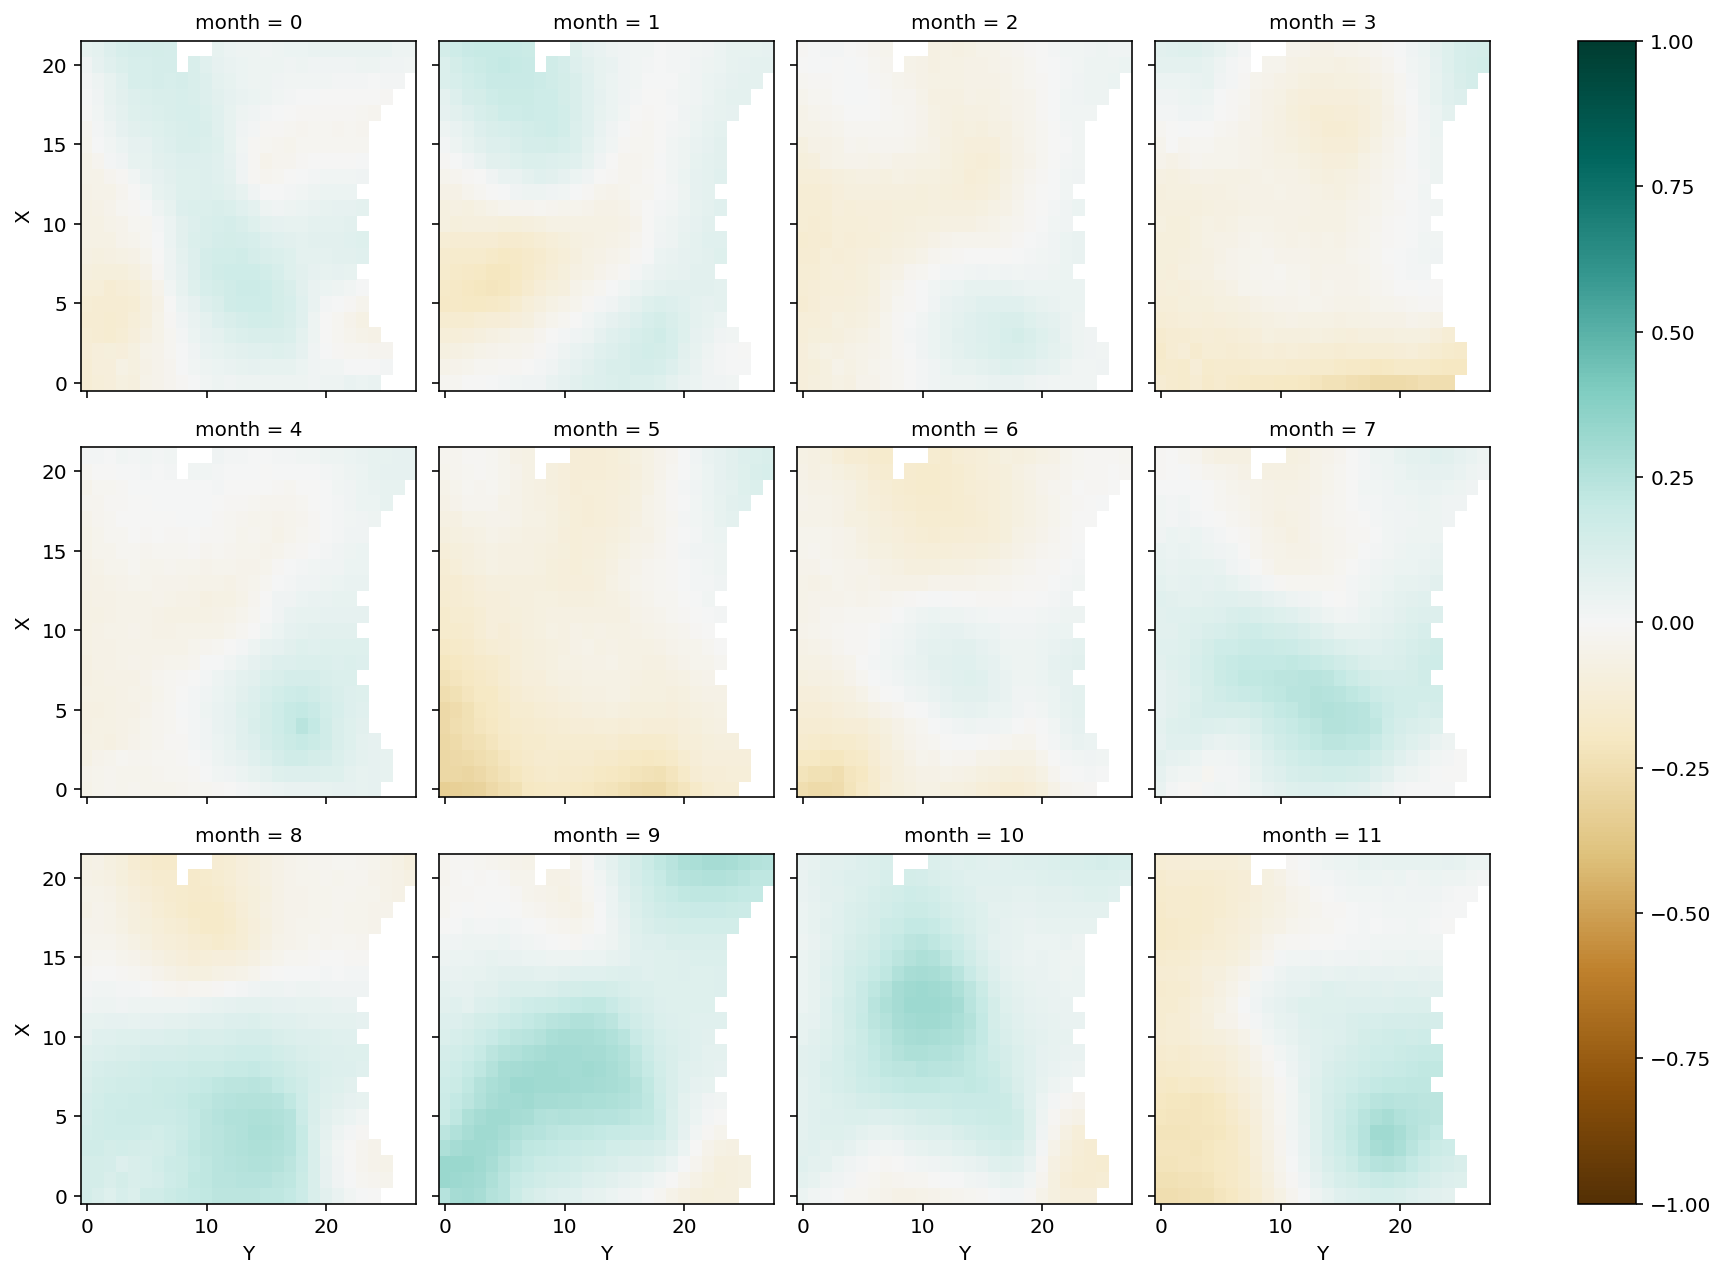

In [205]:
# Prediction of temperature
forecasts.plot(col='month',vmin=-1,vmax=1,col_wrap=4, cmap='BrBG')

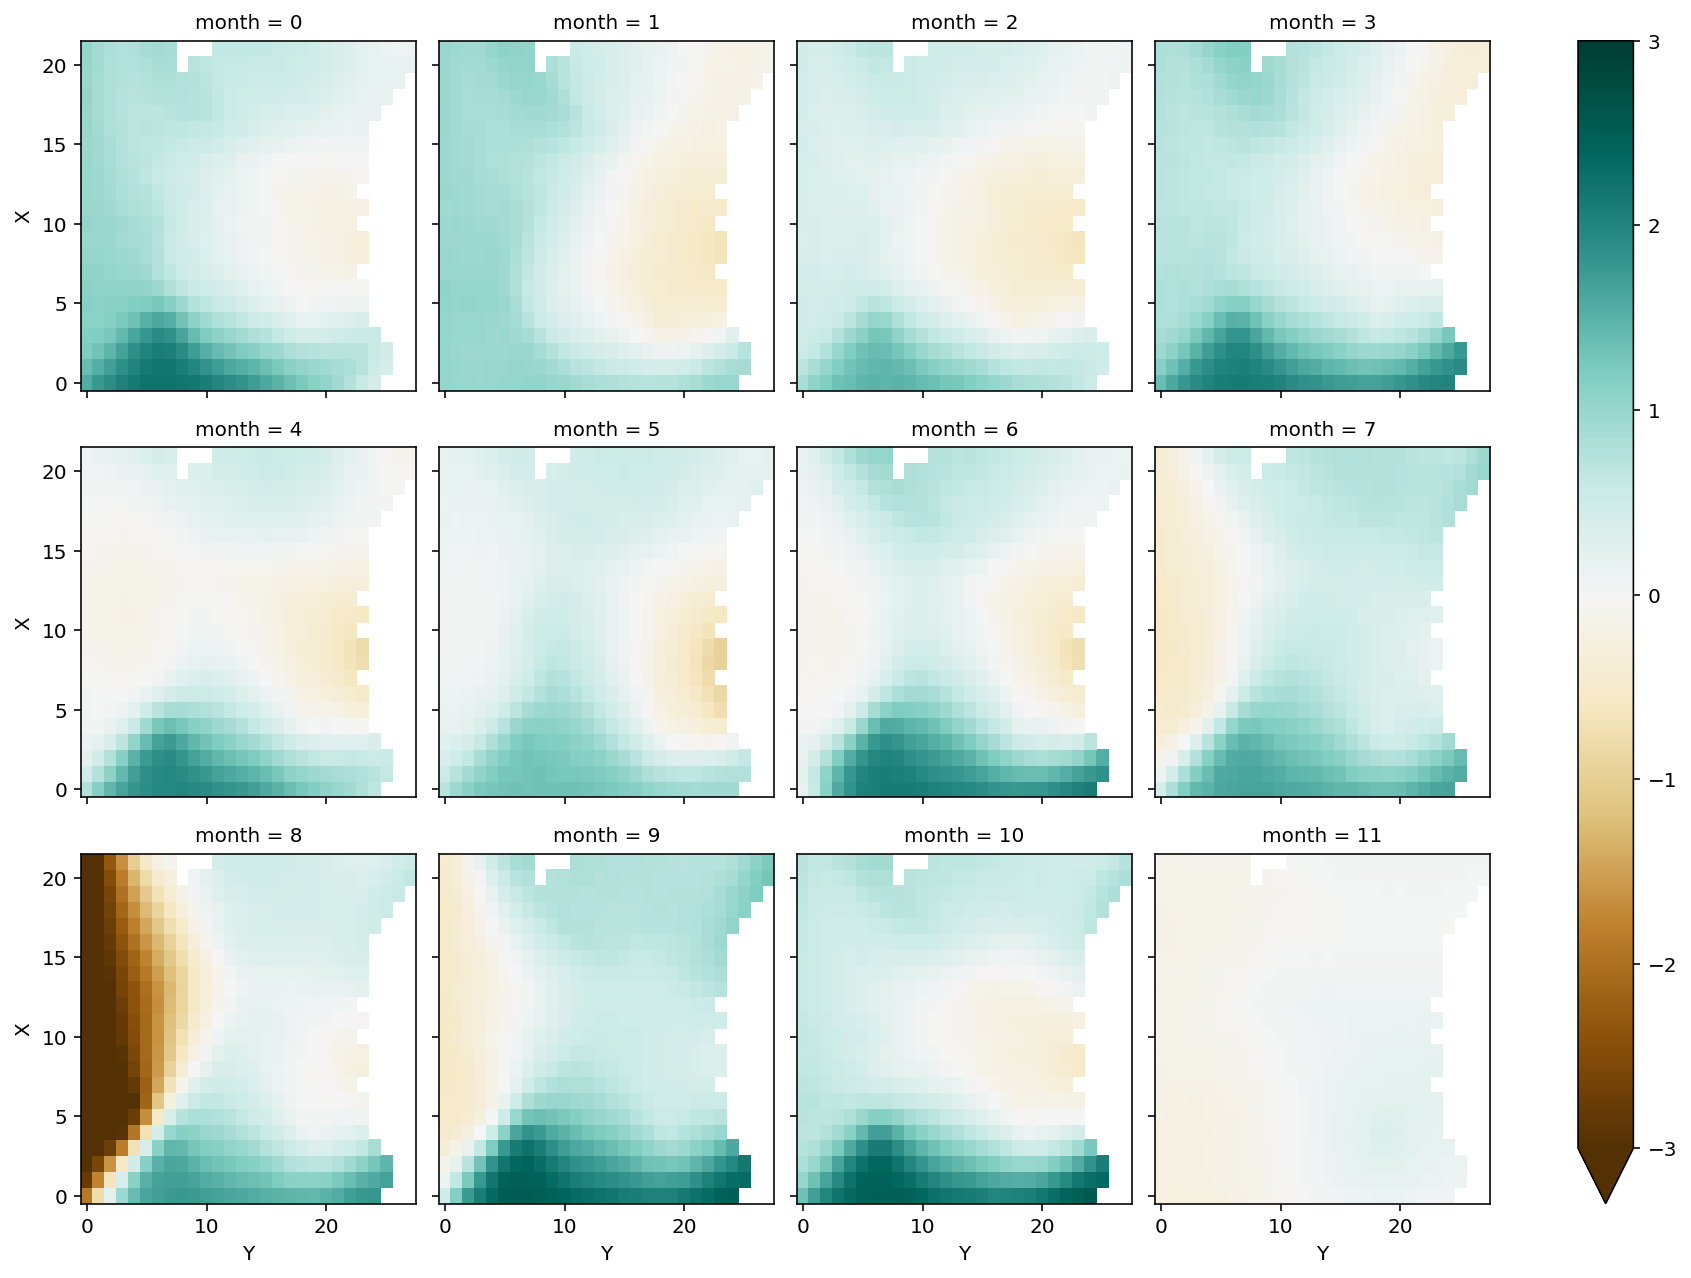

In [206]:
actuals = []
for month in t2ma.groupby('T.month'):
    if month[0] == 12:
        actuals.append(forecasts[-1])
    else:
        actuals.append(month[1][-1])
actuals = xr.DataArray(actuals, dims=['month','X','Y'])
actuals.plot(col='month',col_wrap=4,vmin=-3,vmax=3, cmap='BrBG')

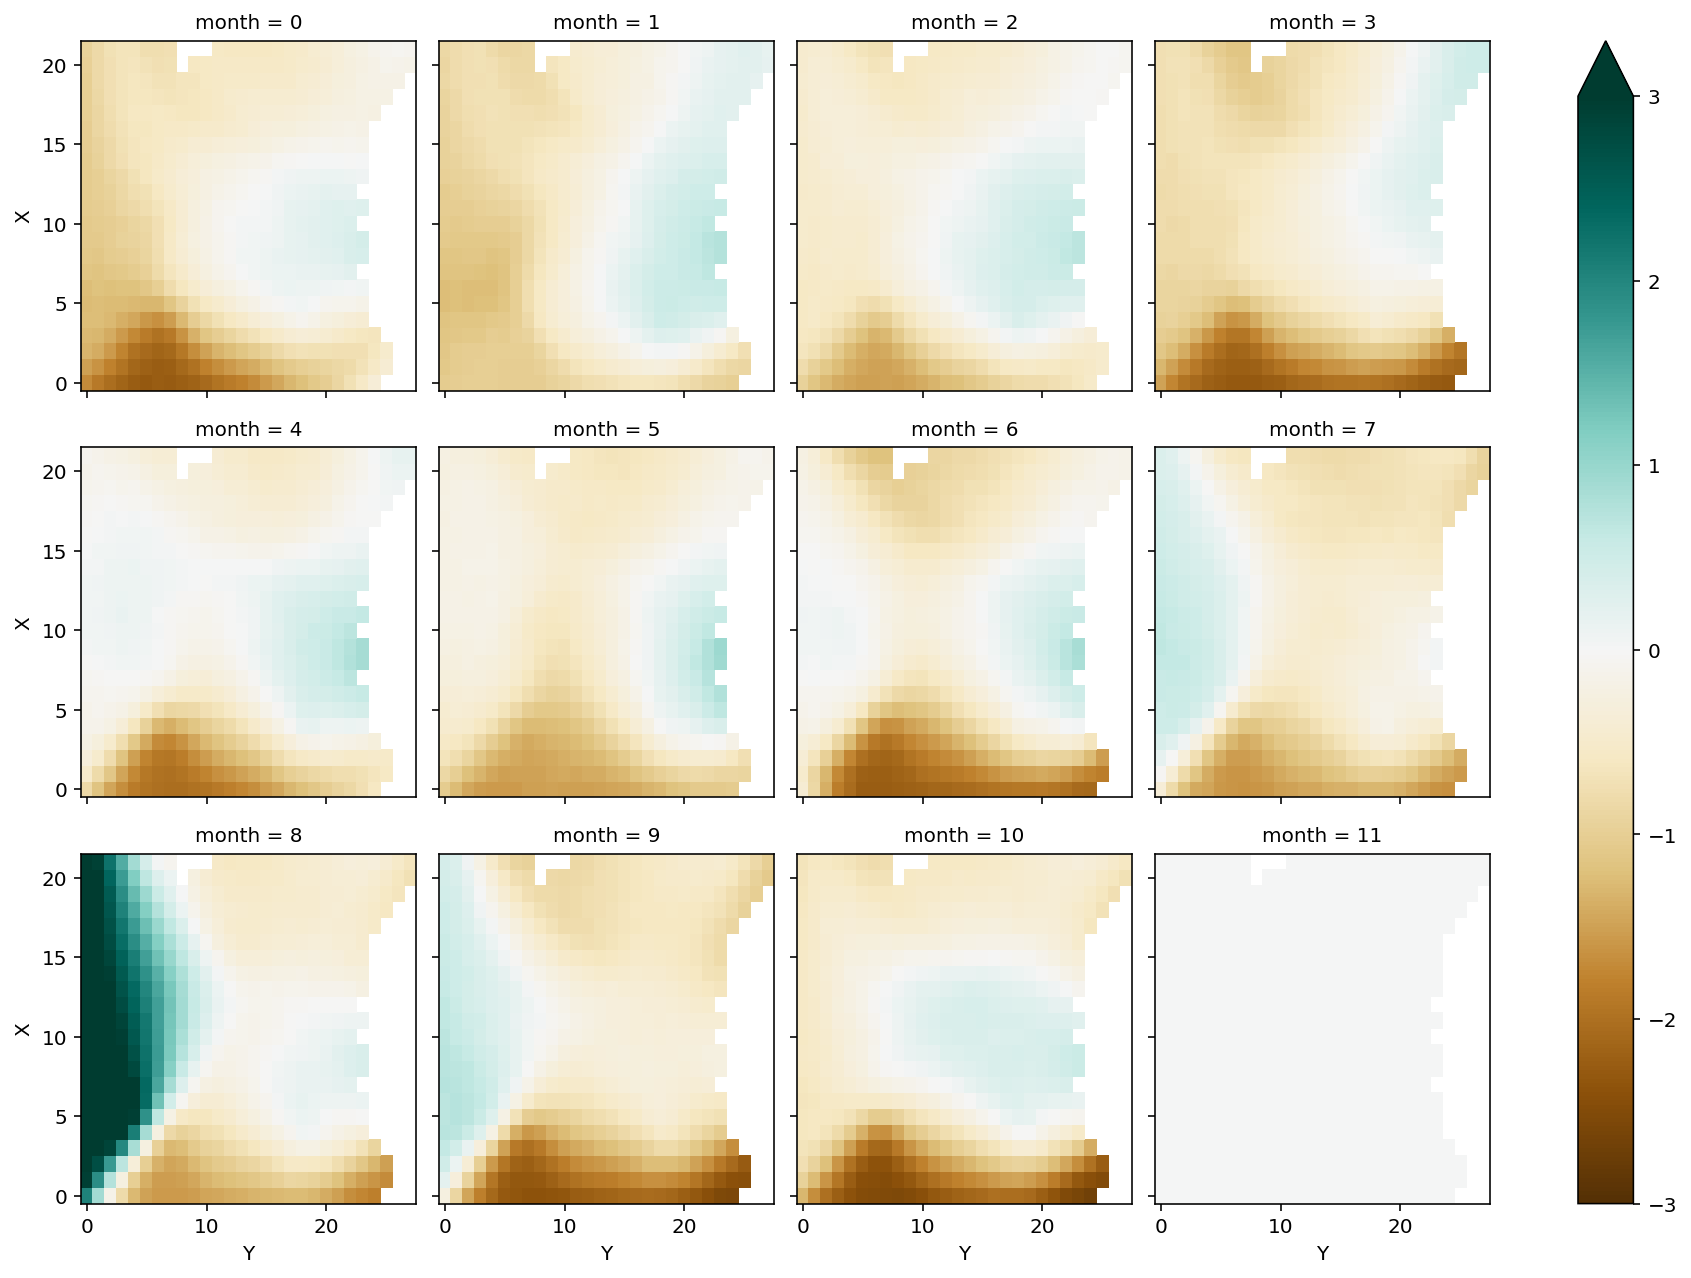

In [207]:
# Difference between forecasts and actuals
(forecasts - actuals).plot(col='month',col_wrap=4,vmin=-3,vmax=3, cmap='BrBG')

This KNN analysis did not do a good job of predicting temperature in 2020, with many drastic underestimates. The underestimates are likely due to global warming and the seasonal trend, since yearly average temperatures have drastically increased. The underprediction was expected.

Since the 2015 El Nino was particularly strong, that will be the year predicted next. I will use k=4 since 2015 is the largest El Nino observed since 1980, so all other Nino 3.4 values will bring the average lower and lower from the 2015 value.

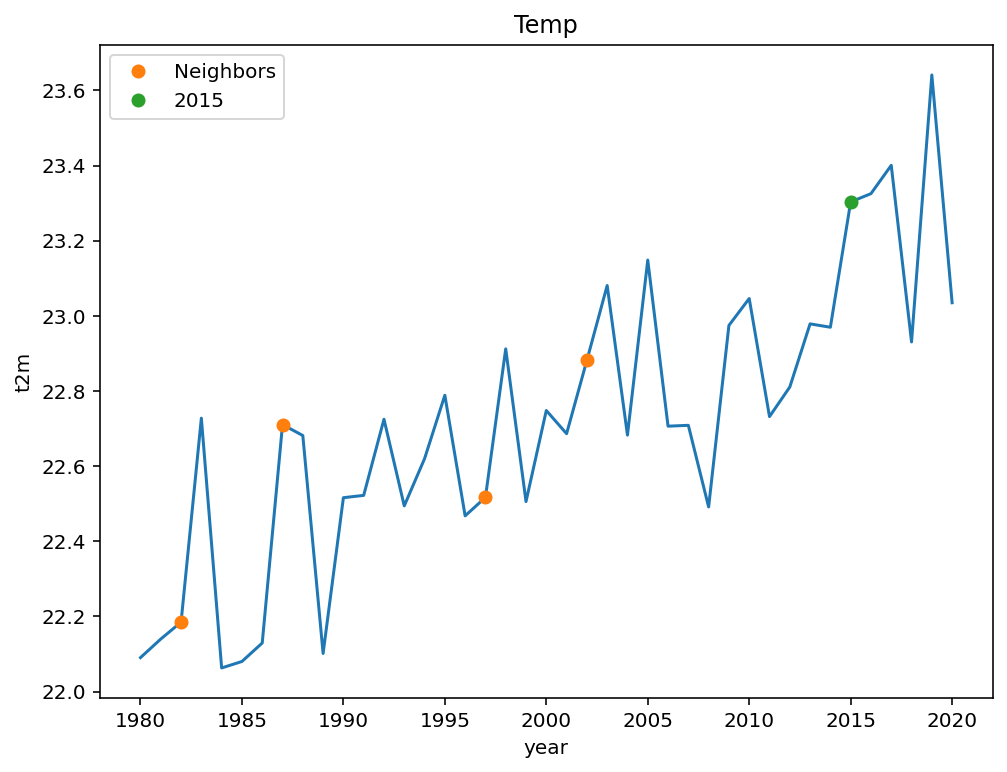

In [208]:
# the closest n34 years for temperature
t2m.groupby('T.year').mean(('T','X','Y')).plot(figsize = (8, 6));
t2m.groupby('T.year').mean(('T','X','Y'))[knn2].plot.line('o', label = 'Neighbors')
plt.plot(2015, t2m.groupby('T.year').mean(('T','X','Y'))[-6], 'o', label = '2015')
plt.title('Temp')
plt.legend(loc = 'upper left');

The graph above suggests this KNN prediction will be terrible, with underestimates.

In [209]:
forecasts = []
for month in t2ma.groupby('T.month'):
    forecasts.append(month[1].isel(T=knn2).mean('T'))
forecasts = xr.DataArray(forecasts, dims=['month','X','Y'])

/opt/conda/lib/python3.8/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


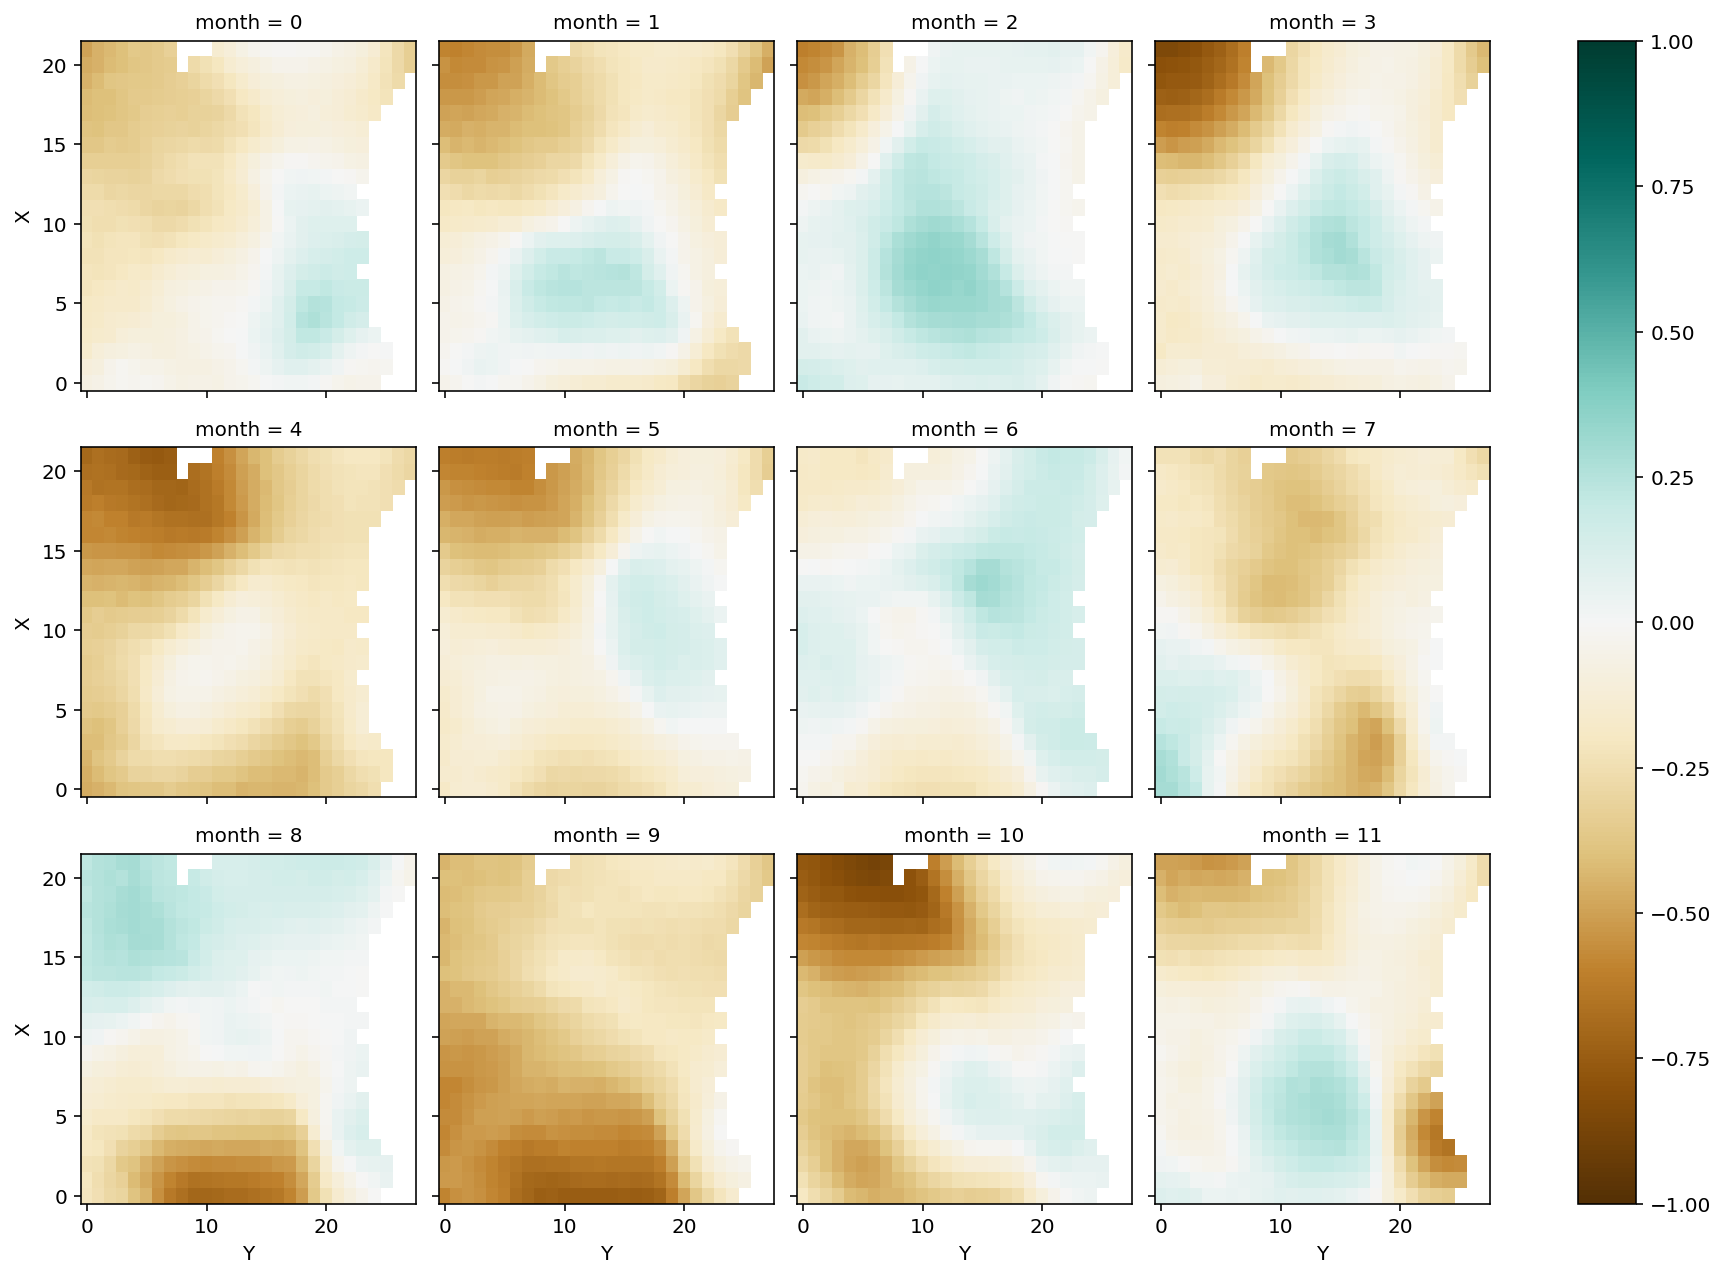

In [210]:
# Prediction of temperature for 2015
forecasts.plot(col='month',vmin=-1,vmax=1,col_wrap=4, cmap='BrBG')

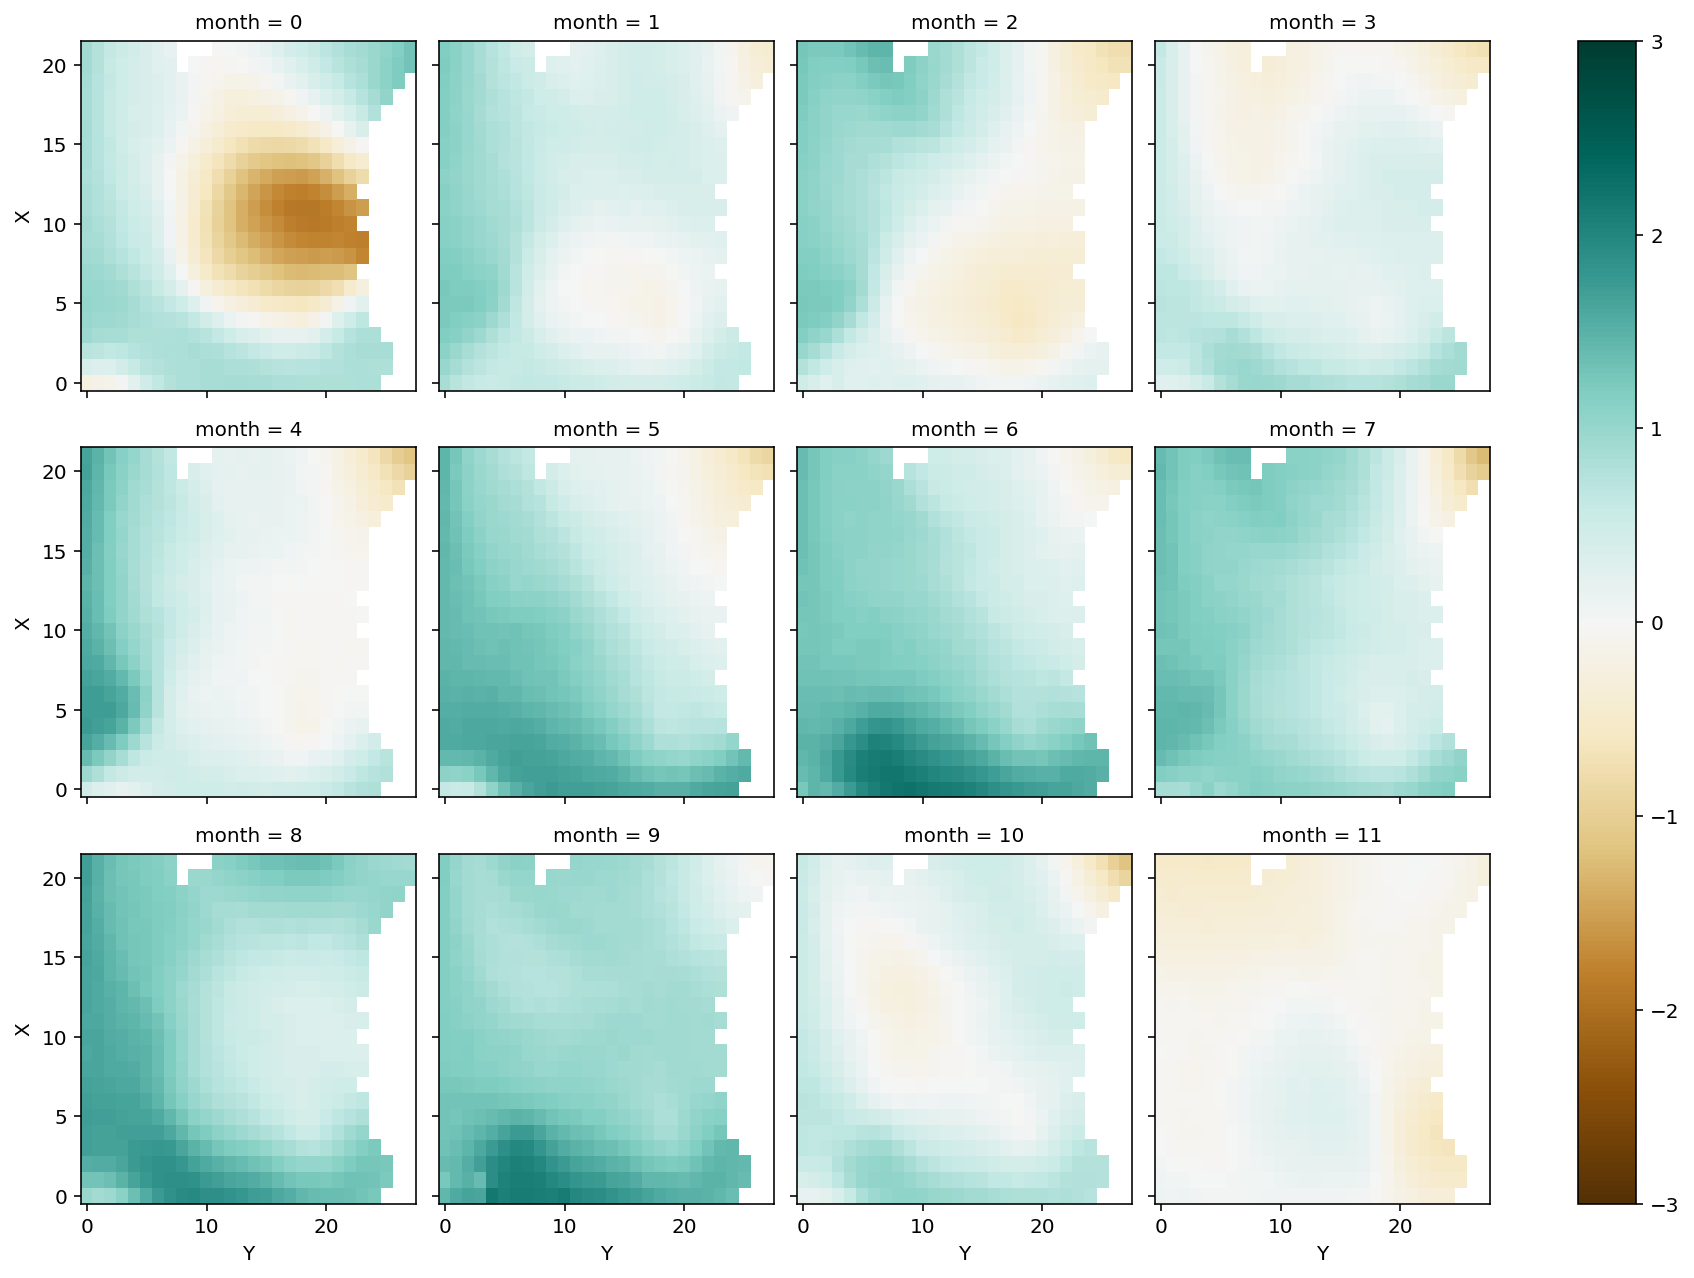

In [211]:
actuals = []
for month in t2ma.groupby('T.month'):
    if month[0] == 12:
        actuals.append(forecasts[-1])
    else:
        actuals.append(month[1][-6])
actuals = xr.DataArray(actuals, dims=['month','X','Y'])
actuals.plot(col='month',col_wrap=4,vmin=-3,vmax=3, cmap='BrBG')

And it was!

#### Linear Regression

Below is a prediction using linear regression for the last date in the temperature dataset.

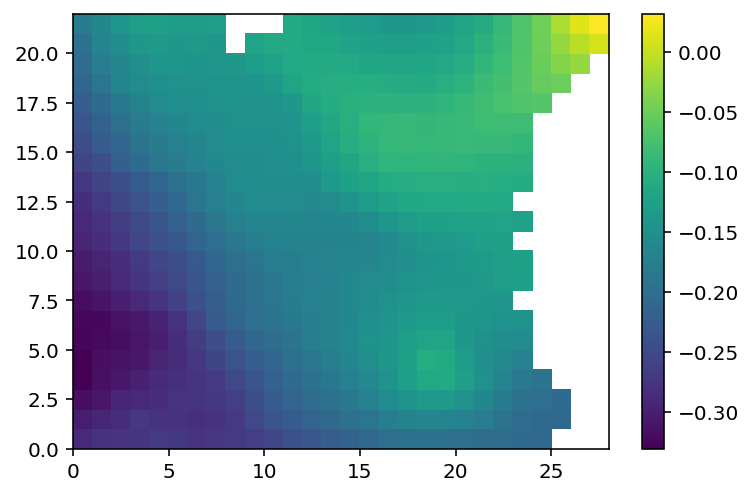

In [212]:
x = n34a[0:-1].values
xm = x.mean()
xa = x - xm
x0 = n34a[-1].values - xm

y = t2ma[0:-1].values

N = len(n34a)

Nx = len(xa)
X = np.empty((Nx,2))
X[:,1] = xa
X[:,0] = 1
beta = inv(X.T@X)@X.T@y.reshape(490,22*28)
yhat = X@beta

# forecast x0*beta
X0 = np.array([1,x0])
forecast = (X0@beta).reshape(22,28)
plt.pcolormesh(forecast)
plt.colorbar()

Below is the actual map of the temperatures on that day.

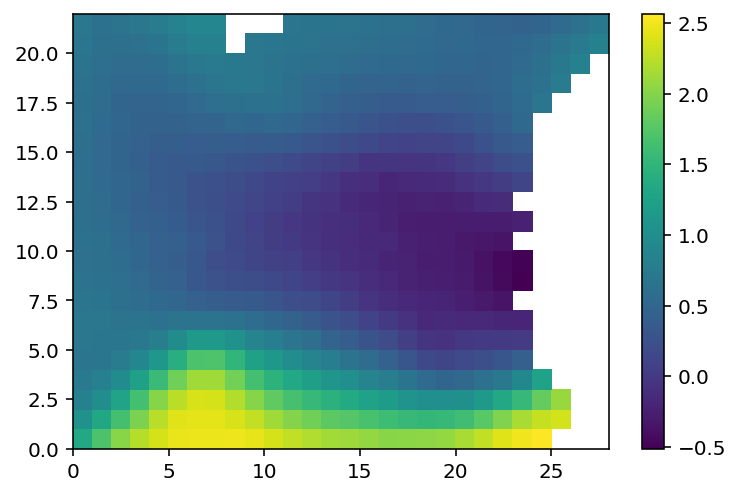

In [213]:
plt.pcolormesh(t2ma[-1].values)
plt.colorbar()

### d. Humidity

Next, I will move on to analyzing the humidity dataset. Below I plot the mean humidity by month.

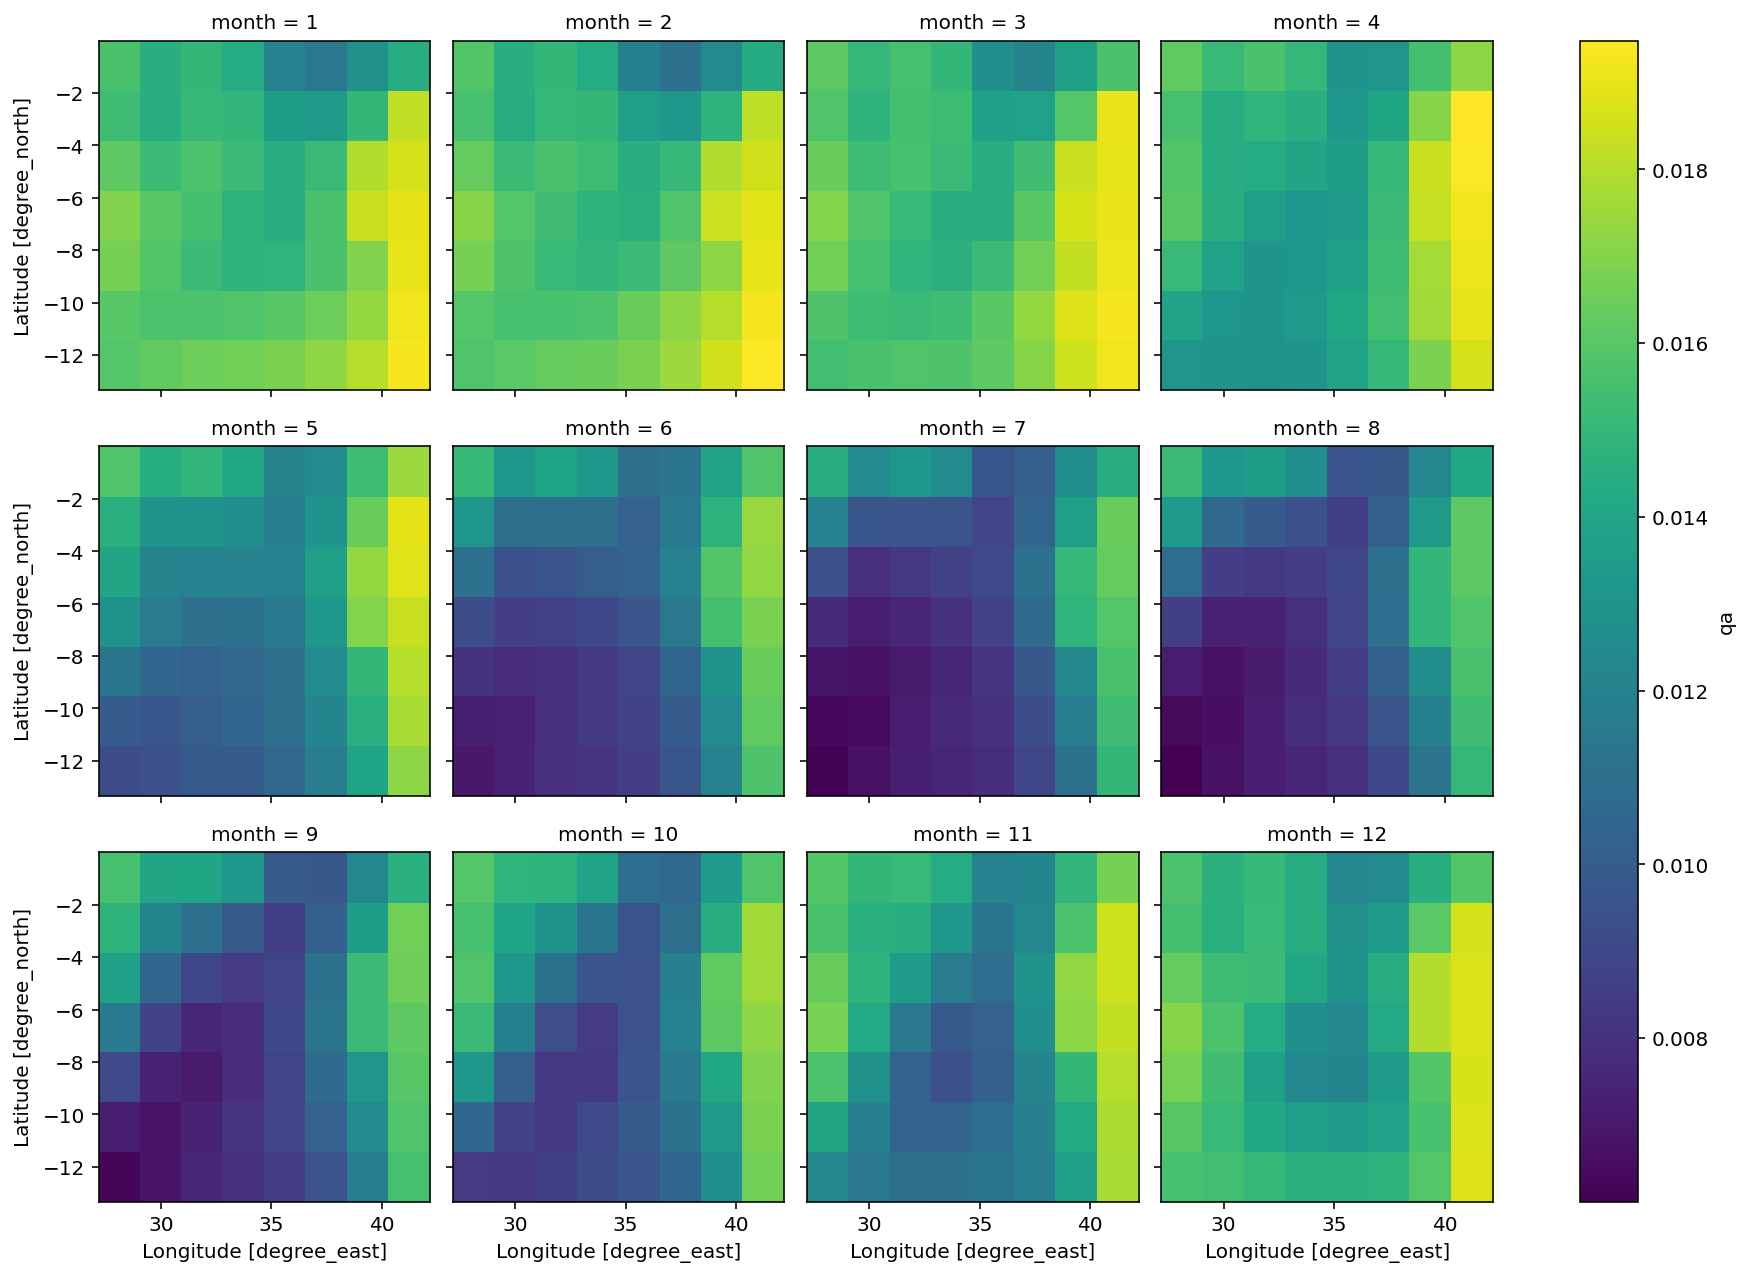

In [214]:
# Humidity

# Mean humidity by month
qa.groupby("T.month").mean('T').plot(col='month',col_wrap=4)

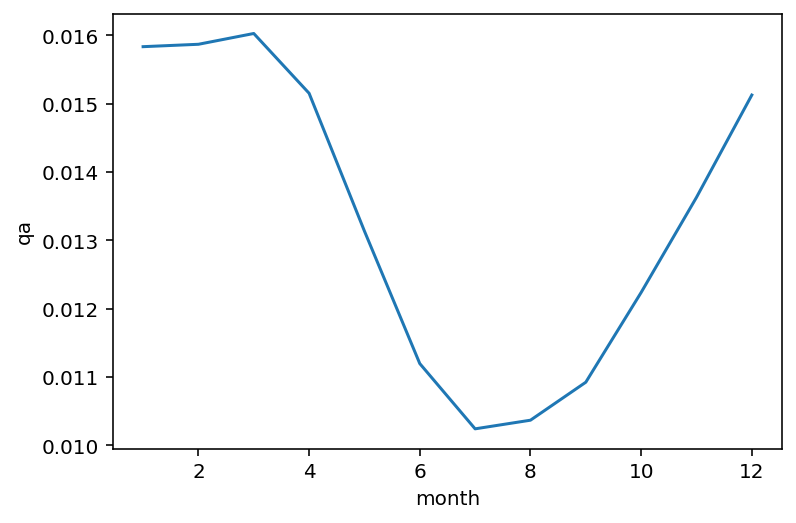

In [215]:
# humidity on average by month
qa.groupby('T.month').mean(('X', 'Y', 'T')).plot()

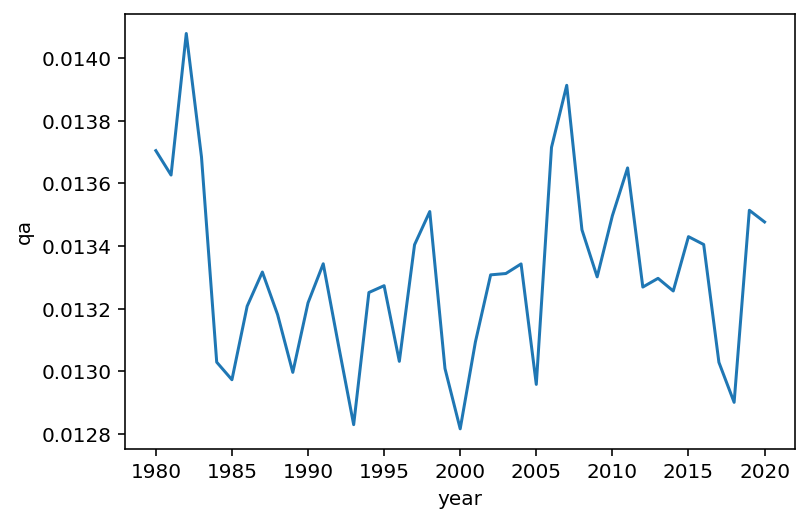

In [216]:
# Humidity on average by year
qa.groupby("T.year").mean(('T','X','Y')).plot()

#### Correlation - Humidity and Nino 3.4

Text(0.5, 1.0, 'Correlation Humidity with Nino 3.4')

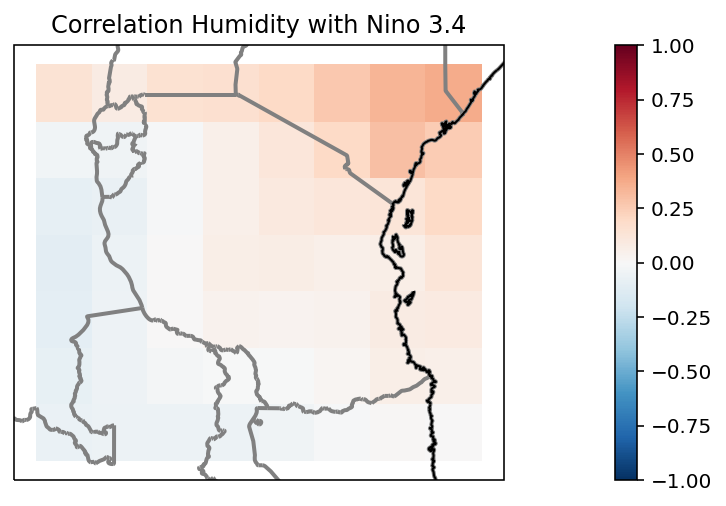

In [217]:
# correlation between full nino 3.4 and humidity all months
r_qa = xr.corr(n34, qa, dim='T')

proj = ccrs.PlateCarree()
fig = plt.figure(figsize = (20,4))
ax = plt.subplot(projection = proj)

ax.coastlines(color = 'gray', linewidth = 2)
ax.add_feature(cfeature.BORDERS, edgecolor='gray', linewidth = 2);

r_qa.plot(ax=ax, vmax = 1, transform=proj)
ax.coastlines();
ax.set_title('Correlation Humidity with Nino 3.4')

Text(0.5, 1.0, 'Correlation Humidity with Nino 3.4')

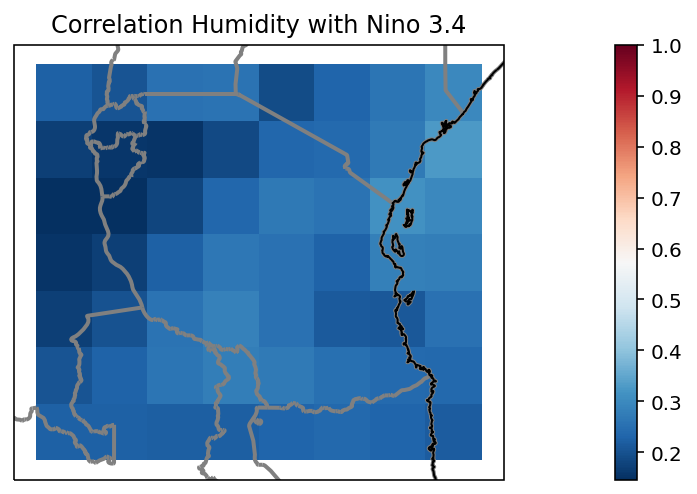

In [218]:
# correlation between full nino 3.4 and humidity all months by month
qaa = qa.groupby('T.month') - qa.groupby('T.month').mean('T') # anomaly
r_qa = xr.corr(n34a, qaa, dim='T')

proj = ccrs.PlateCarree()
fig = plt.figure(figsize = (20,4))
ax = plt.subplot(projection = proj)

ax.coastlines(color = 'gray', linewidth = 2)
ax.add_feature(cfeature.BORDERS, edgecolor='gray', linewidth = 2);

r_qa.plot(ax=ax, vmax = 1, transform=proj, cmap = 'RdBu_r')
ax.coastlines();
ax.set_title('Correlation Humidity with Nino 3.4')

Below shows the correlation between Nino 3.4 and humidity for every month in Tanzania. The graph below shows by month where the correlations are significant (yellow = significant, purple = not significant).

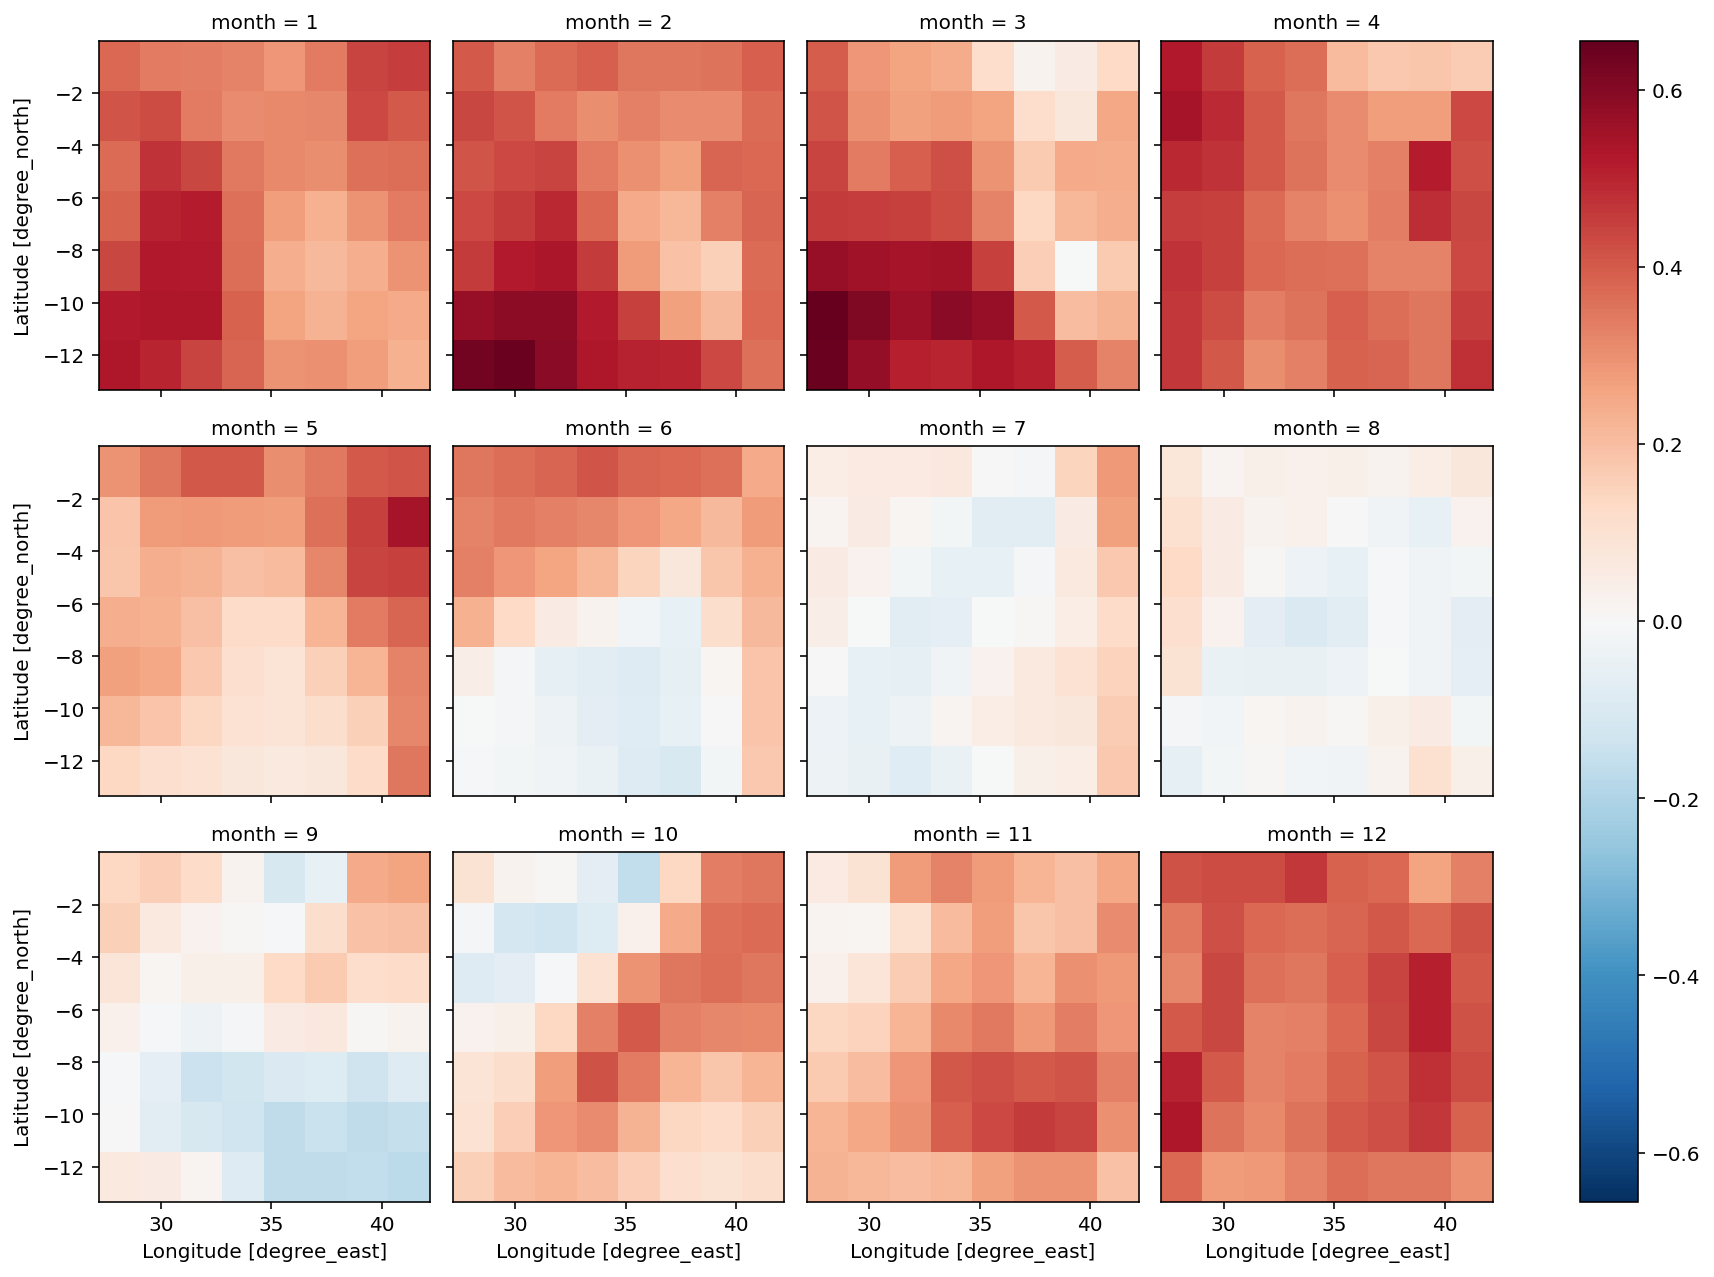

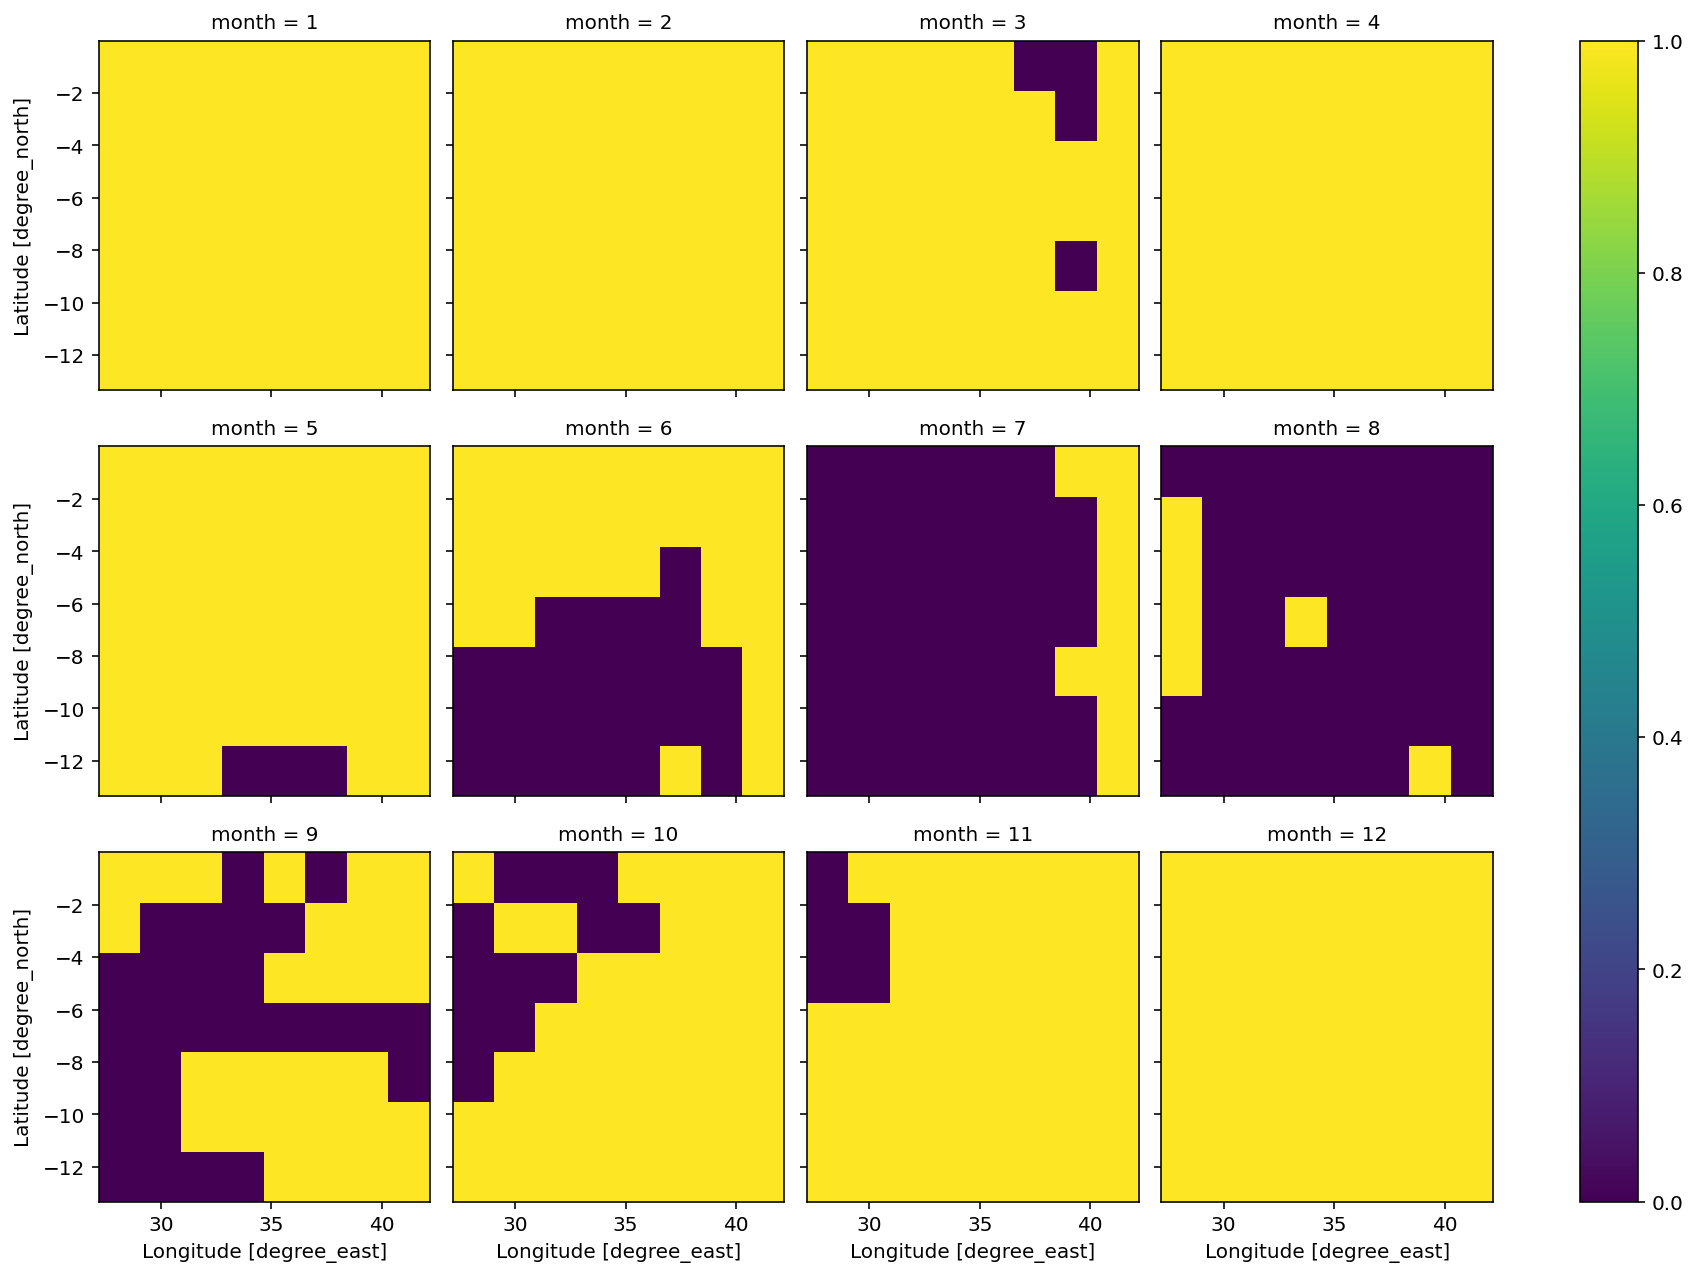

In [219]:
top = (n34a*qaa).groupby('T.month').mean('T')
bottom = n34a.groupby('T.month').std('T') * qaa.groupby('T.month').std('T')
c = top/bottom

N = len(n34)
sig_value = 2/np.sqrt(N)
c.plot(col='month',col_wrap=4)
xr.where(abs(c)>sig_value,1,0).plot(col='month',col_wrap=4)

In [220]:
np.count_nonzero(np.array(xr.where(abs(c)> sig_value,1,0)))/(np.array(c).shape[0]*np.array(c).shape[1]*np.array(c).shape[2])

0.7425595238095238

This map above shows that the values for the correlation between humidity and Nino 3.4 are significant over 70% of the time in Tanzania (see above calculation, # non zero divided by total points).

#### T-Test for Difference in Means - Humidity in El Nino vs La Nina years

The code below generates the p-value for the difference in means of average humidity for the whole year for all of Tanzania between El Nino years and La Nina years.

In [221]:
X = qa.groupby('T.year').mean(('T','X','Y'))[t_nina].values
Y = qa.groupby('T.year').mean(('T','X','Y'))[t_nino].values 
pooled_var = ((Nx - 1)*X.var() + (Ny - 1)*Y.var())/(Nx + Ny - 2)
t = (X.mean() - Y.mean())/np.sqrt(pooled_var)/np.sqrt(1./Nx + 1./Ny)
p = (2*(1-stats.t.cdf(np.abs(t), df=df)))
p

0.10081657629870855

Thus, there is no significant difference in humidity between El Nino and La Nina years in Tanzania across the whole year and whole map (p>.05).

The graphs below show the difference in humidity between El Nino years and La Nina years. 

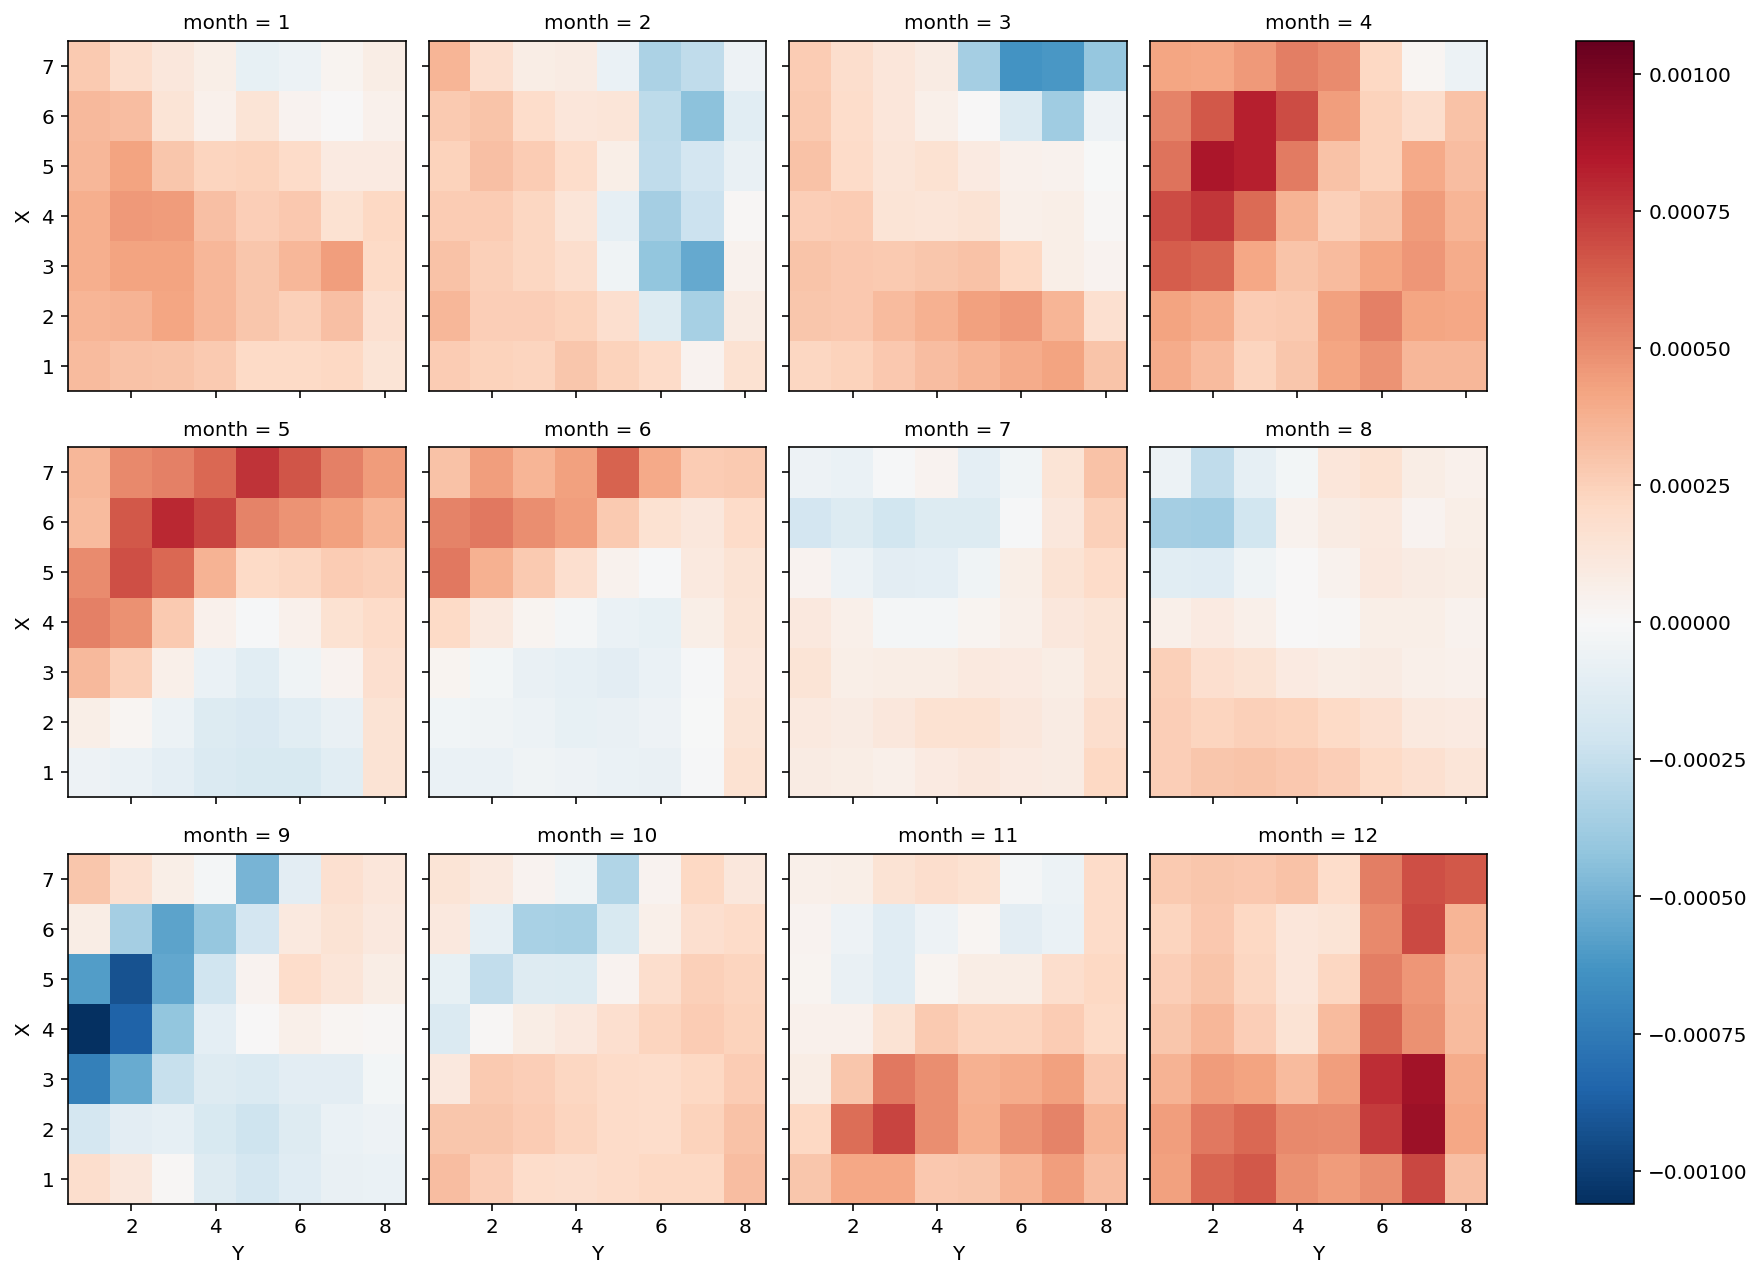

In [222]:
dif = []
for month in qa.groupby('T.month'):
    if month[0] == 12:
        dif.append(month[1].values[t_nino[:-1],:,:].mean(axis = 0) - month[1].values[t_nina[:-1],:,:].mean(axis = 0))
    else:
        dif.append(month[1].values[t_nino,:,:].mean(axis = 0) - month[1].values[t_nina,:,:].mean(axis = 0)) 
dif = np.array(dif)
dif = xr.DataArray(dif,coords = [list(range(1,13)),list(range(1,8)),list(range(1,9))], dims=['month','X','Y'])
dif.plot(col='month',col_wrap=4,cmap = 'RdBu_r')

In [223]:
p = []
tss = []
for month in qa.groupby('T.month'):
    if month[0] == 12:
        X = month[1].mean(('X','Y'))[t_nina[:-1]].values
        Y = month[1].mean(('X','Y'))[t_nino[:-1]].values 
        pooled_var = ((Nx - 1)*X.var() + (Ny - 1)*Y.var())/(Nx + Ny - 2)
        t = (X.mean() - Y.mean())/np.sqrt(pooled_var)/np.sqrt(1./Nx + 1./Ny)
        tss.append(t)
        p.append(2*(1-stats.t.cdf(np.abs(t), df=df)))
    else:
        X = month[1].mean(('X','Y'))[t_nina].values
        Y = month[1].mean(('X','Y'))[t_nino].values 
        pooled_var = ((Nx - 1)*X.var() + (Ny - 1)*Y.var())/(Nx + Ny - 2)
        t = (X.mean() - Y.mean())/np.sqrt(pooled_var)/np.sqrt(1./Nx + 1./Ny)
        tss.append(t)
        p.append(2*(1-stats.t.cdf(np.abs(t), df=df)))     
print("The p values for difference in humidity means between El Nino years and La Nina years are by month: ")
p

The p values for difference in humidity means between El Nino years and La Nina years are by month: 


[0.1156454043382158,
 0.6640931131335863,
 0.20561179491673243,
 0.012066209114980131,
 0.1577238640448464,
 0.3014946727708092,
 0.569322189887469,
 0.5225654402577411,
 0.32985205888895264,
 0.44801611164623445,
 0.23627796428217573,
 0.011794392128784636]

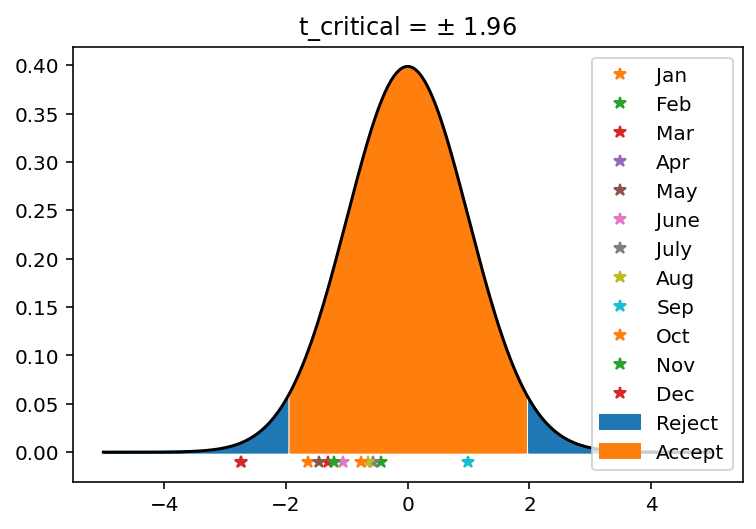

In [126]:
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
df = Nx + Ny - 2

alpha = 0.05
t_05 = stats.t.ppf(1 - 0.05/2, df = df)
plt.title('t_critical = $\pm$ {:4.2f}'.format(t_05))

ts = np.linspace(-5, 5, 200)
plt.plot(ts, stats.t.pdf(ts, df=df), color='k');
ts_left = ts[ts <= - t_05]
ts_right = ts[ts >= t_05]
ts_middle = ts[ (ts < t_05) & (ts > - t_05) ]


plt.fill_between(ts_left, stats.t.pdf(ts_left, df=df), color = colors[0], label='Reject')
plt.fill_between(ts_right, stats.t.pdf(ts_right, df=df), color = colors[0])
plt.fill_between(ts_middle, stats.t.pdf(ts_middle, df=df), color = colors[1], label='Accept')

plt.plot(tss[0], -0.01, '*', color = colors[1], label = 'Jan')
plt.plot(tss[1], -0.01, '*', color = colors[2], label = 'Feb')
plt.plot(tss[2], -0.01, '*', color = colors[3], label = 'Mar')
plt.plot(tss[3], -0.01, '*', color = colors[4], label = 'Apr')
plt.plot(tss[4], -0.01, '*', color = colors[5], label = 'May')
plt.plot(tss[5], -0.01, '*', color = colors[6], label = 'June')
plt.plot(tss[6], -0.01, '*', color = colors[7], label = 'July')
plt.plot(tss[7], -0.01, '*', color = colors[8], label = 'Aug')
plt.plot(tss[8], -0.01, '*', color = colors[9], label = 'Sep')
plt.plot(tss[9], -0.01, '*', color = colors[1], label = 'Oct')
plt.plot(tss[10], -0.01, '*', color = colors[2], label = 'Nov')
plt.plot(tss[11], -0.01, '*', color = colors[3], label = 'Dec')

plt.legend(loc='right');

Only April and December showed significant differences in humidity between El Nino and La Nina years (p = .0121 and p = .0118, respectively).

Below shows the p-values on the map by month. Significant values (p<.05) are shown in yellow.

The p values for difference in humidity means between El Nino years and La Nina years are by month: 


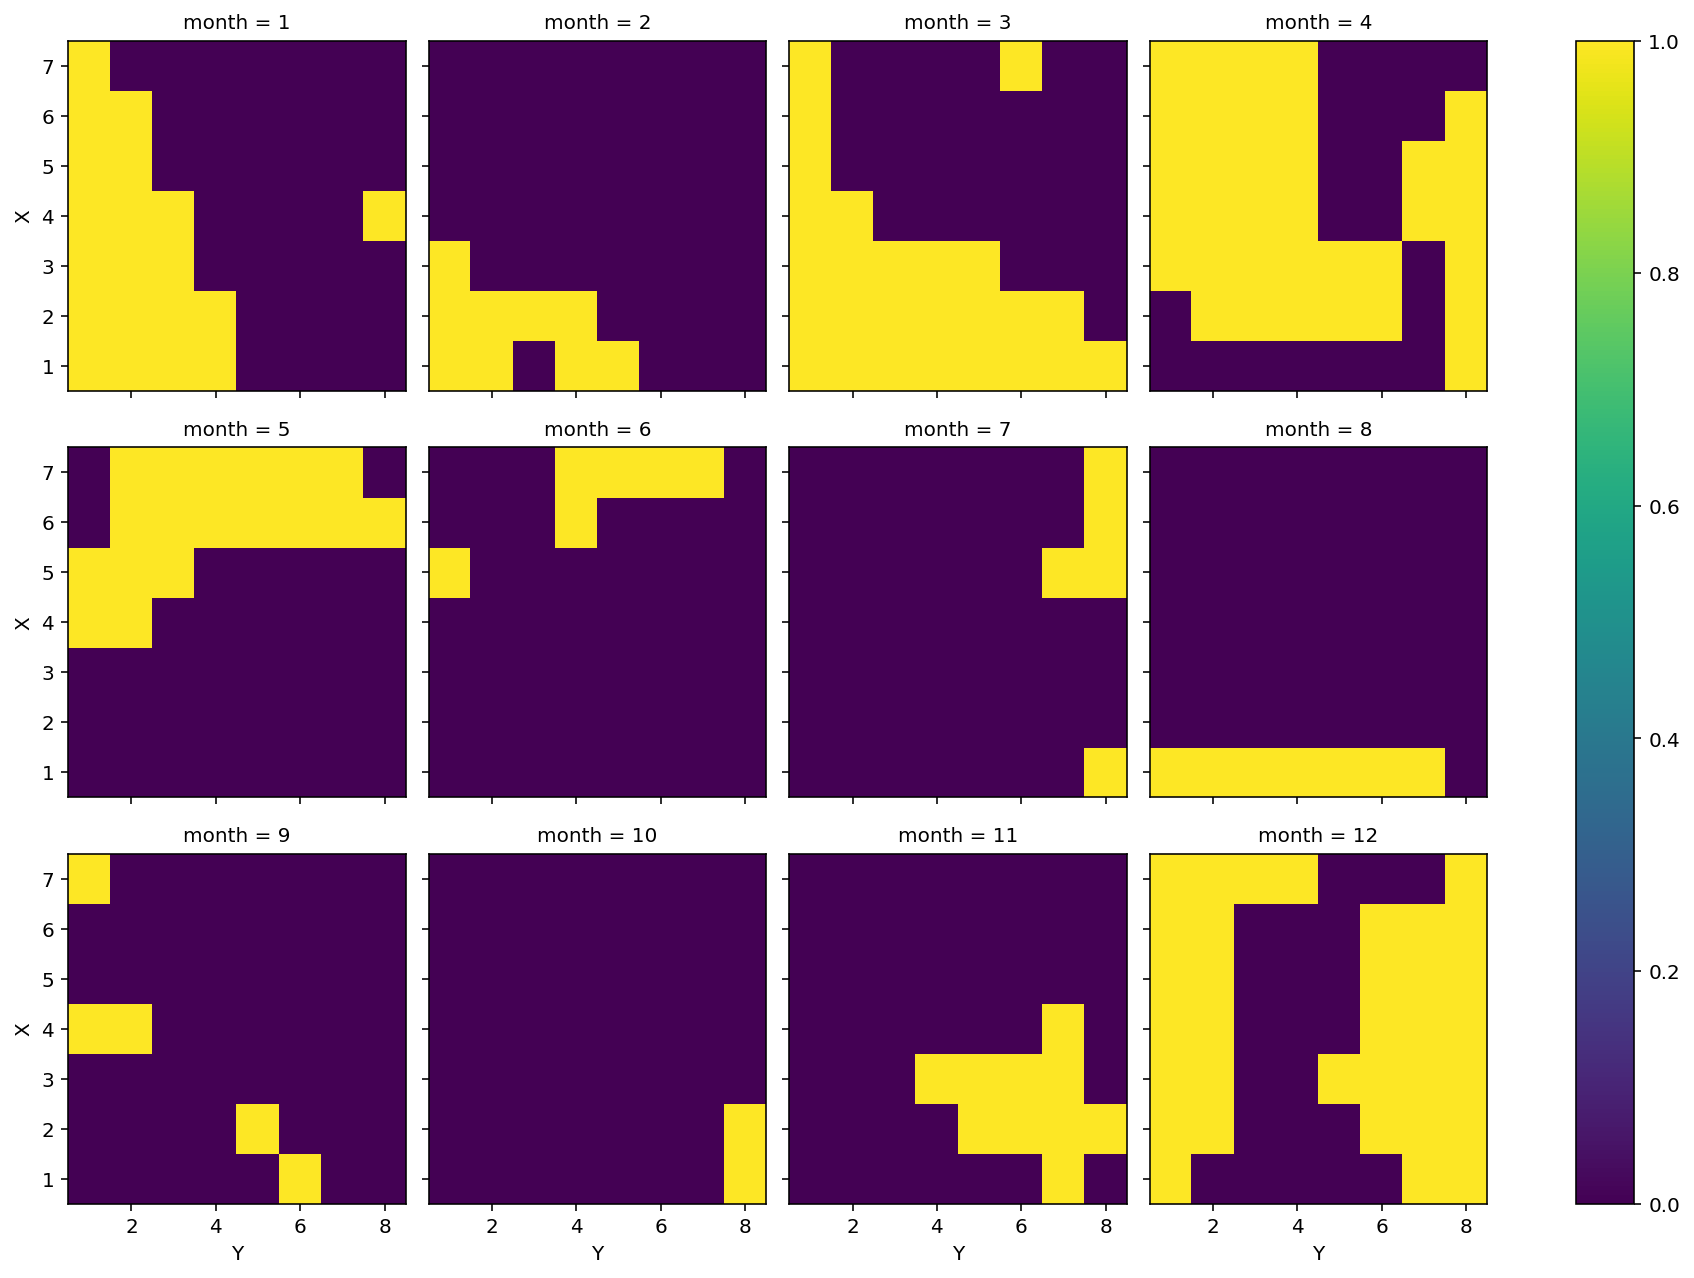

In [127]:
p = []
tss = []
for month in qa.groupby('T.month'):
    if month[0] == 12:
        X = month[1].values[t_nina[:-1],:,:]
        Y = month[1].values[t_nino[:-1],:,:]
        where_are_NaNs = np.isnan(X)
        X[where_are_NaNs] = 0
        where_are_NaNs = np.isnan(Y)
        Y[where_are_NaNs] = 0
        pooled_var = ((Nx - 1)*X.var(axis=0) + (Ny - 1)*Y.var(axis=0))/(Nx + Ny - 2)
        t = (X.mean(axis=0) - Y.mean(axis=0))/np.sqrt(pooled_var)/np.sqrt(1./Nx + 1./Ny)
        tss.append(t)
        p.append(2*(1-stats.t.cdf(np.abs(t), df=df)))
    else:
        X = month[1].values[t_nina,:,:]
        Y = month[1].values[t_nino,:,:]
        where_are_NaNs = np.isnan(X)
        X[where_are_NaNs] = 0
        where_are_NaNs = np.isnan(Y)
        Y[where_are_NaNs] = 0
        pooled_var = ((Nx - 1)*X.var(axis=0) + (Ny - 1)*Y.var(axis=0))/(Nx + Ny - 2)
        t = (X.mean(axis=0) - Y.mean(axis=0))/np.sqrt(pooled_var)/np.sqrt(1./Nx + 1./Ny)
        tss.append(t)
        p.append(2*(1-stats.t.cdf(np.abs(t), df=df)))     
print("The p values for difference in humidity means between El Nino years and La Nina years are by month: ")
where_are_NaNs = np.isnan(p)
p = np.array(p)
p = xr.DataArray(p)
p = xr.DataArray(p,coords = [list(range(1,13)),list(range(1,8)),list(range(1,9))], dims=['month','X','Y'])
#p.plot(col='month',vmin=0,vmax=.05,col_wrap=4,cmap = 'RdBu_r')
xr.where(p < .05,1,0).plot(col='month',col_wrap=4)

#### KNN

I will use KNN to predict, for each month, the 2020 humidity. Every month's actual 2020 humidity is available for comparison except December.

The graph below shows the humidity values for the years determined to be the neareast neighbors for n34. The graph suggests the predictions might be okay, with slight underpredictions.

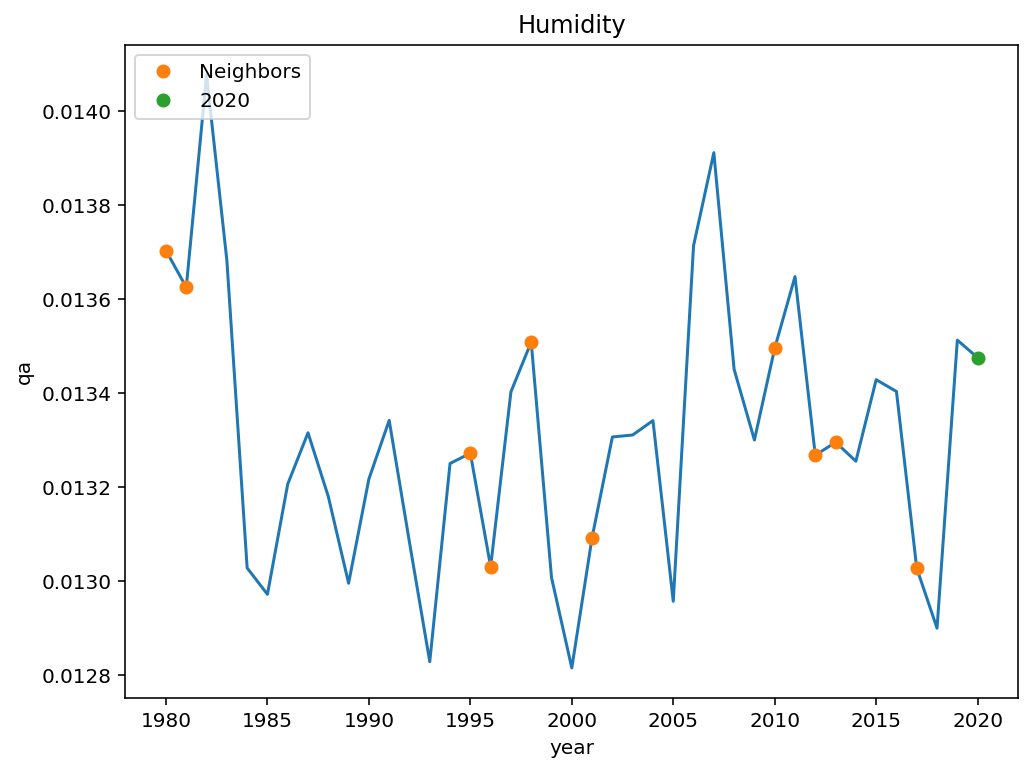

In [128]:
# the closest n34 years for temperature
qa.groupby('T.year').mean(('T','X','Y')).plot(figsize = (8, 6));
qa.groupby('T.year').mean(('T','X','Y'))[knn].plot.line('o', label = 'Neighbors')
plt.plot(2020, qa.groupby('T.year').mean(('T','X','Y'))[-1], 'o', label = '2020')
plt.title('Humidity')
plt.legend(loc = 'upper left');

In [129]:
# switch to anomalies
qaa = qa.groupby('T.month') - qa.groupby('T.month').mean('T') # remove mean for each month separately 

In [130]:
forecasts = []
for month in qaa.groupby('T.month'):
    forecasts.append(month[1].isel(T=knn).mean('T'))
forecasts = xr.DataArray(forecasts, dims=['month','X','Y'])

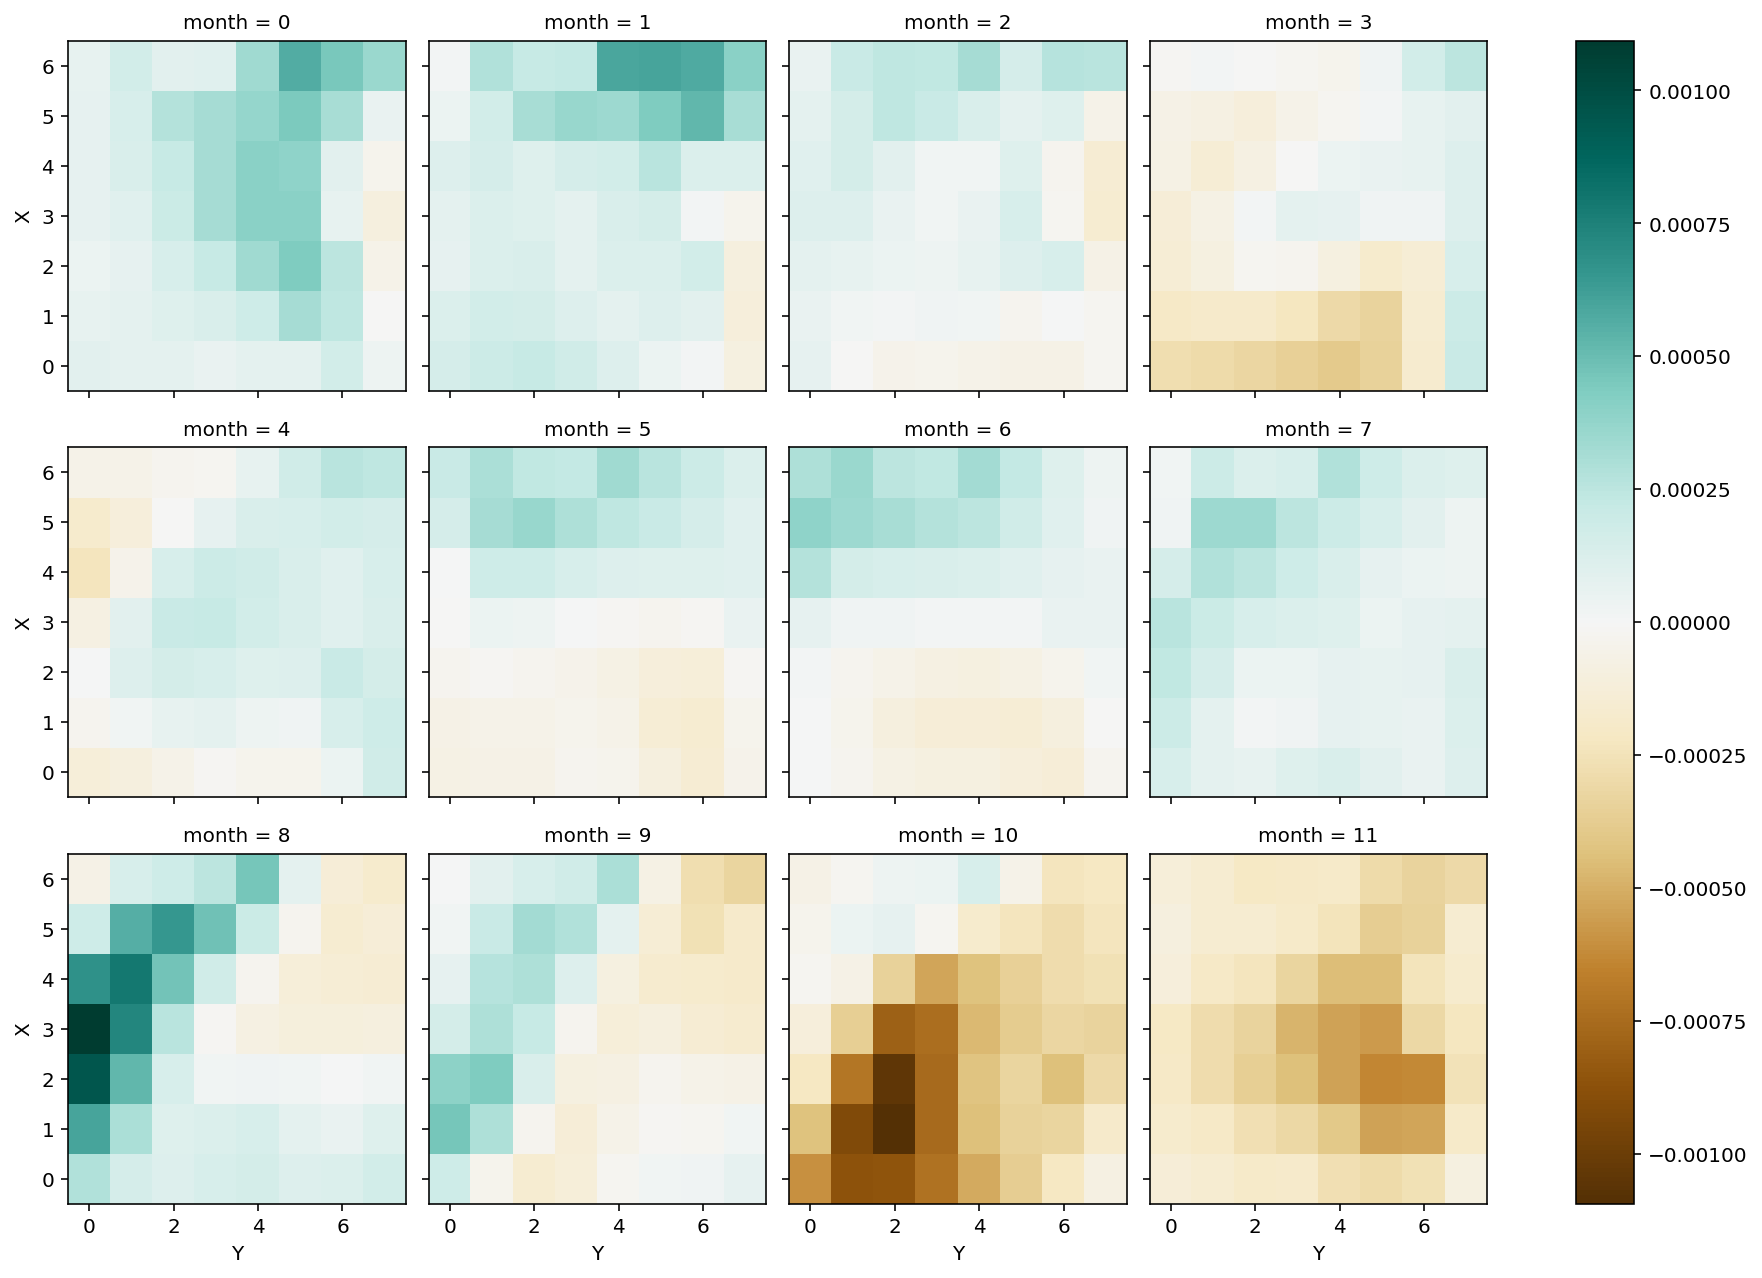

In [131]:
# Prediction of humidity
forecasts.plot(col='month',col_wrap=4, cmap='BrBG')

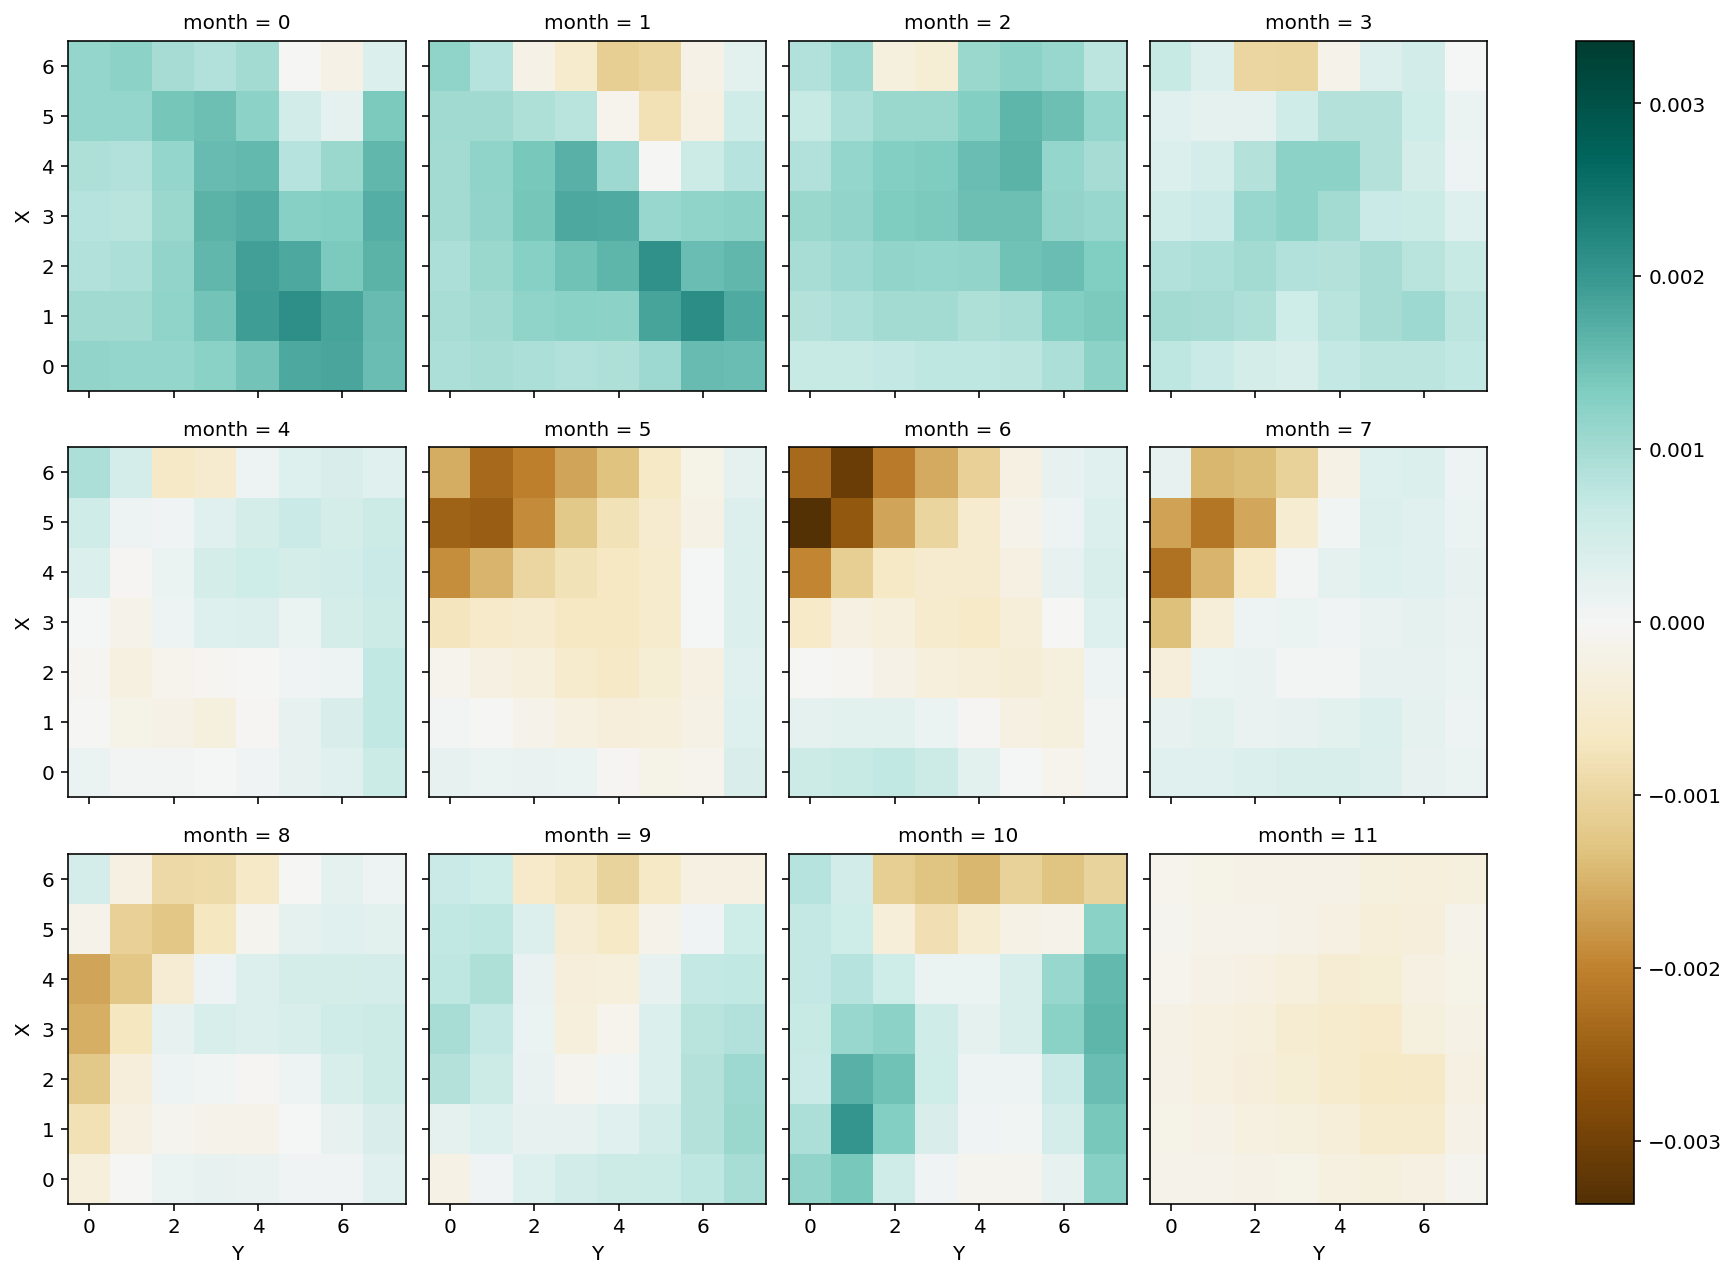

In [132]:
actuals = []
for month in qaa.groupby('T.month'):
    if month[0] == 12:
        actuals.append(forecasts[-1])
    else:
        actuals.append(month[1][-1])
actuals = xr.DataArray(actuals, dims=['month','X','Y'])
actuals.plot(col='month',col_wrap=4, cmap='BrBG')

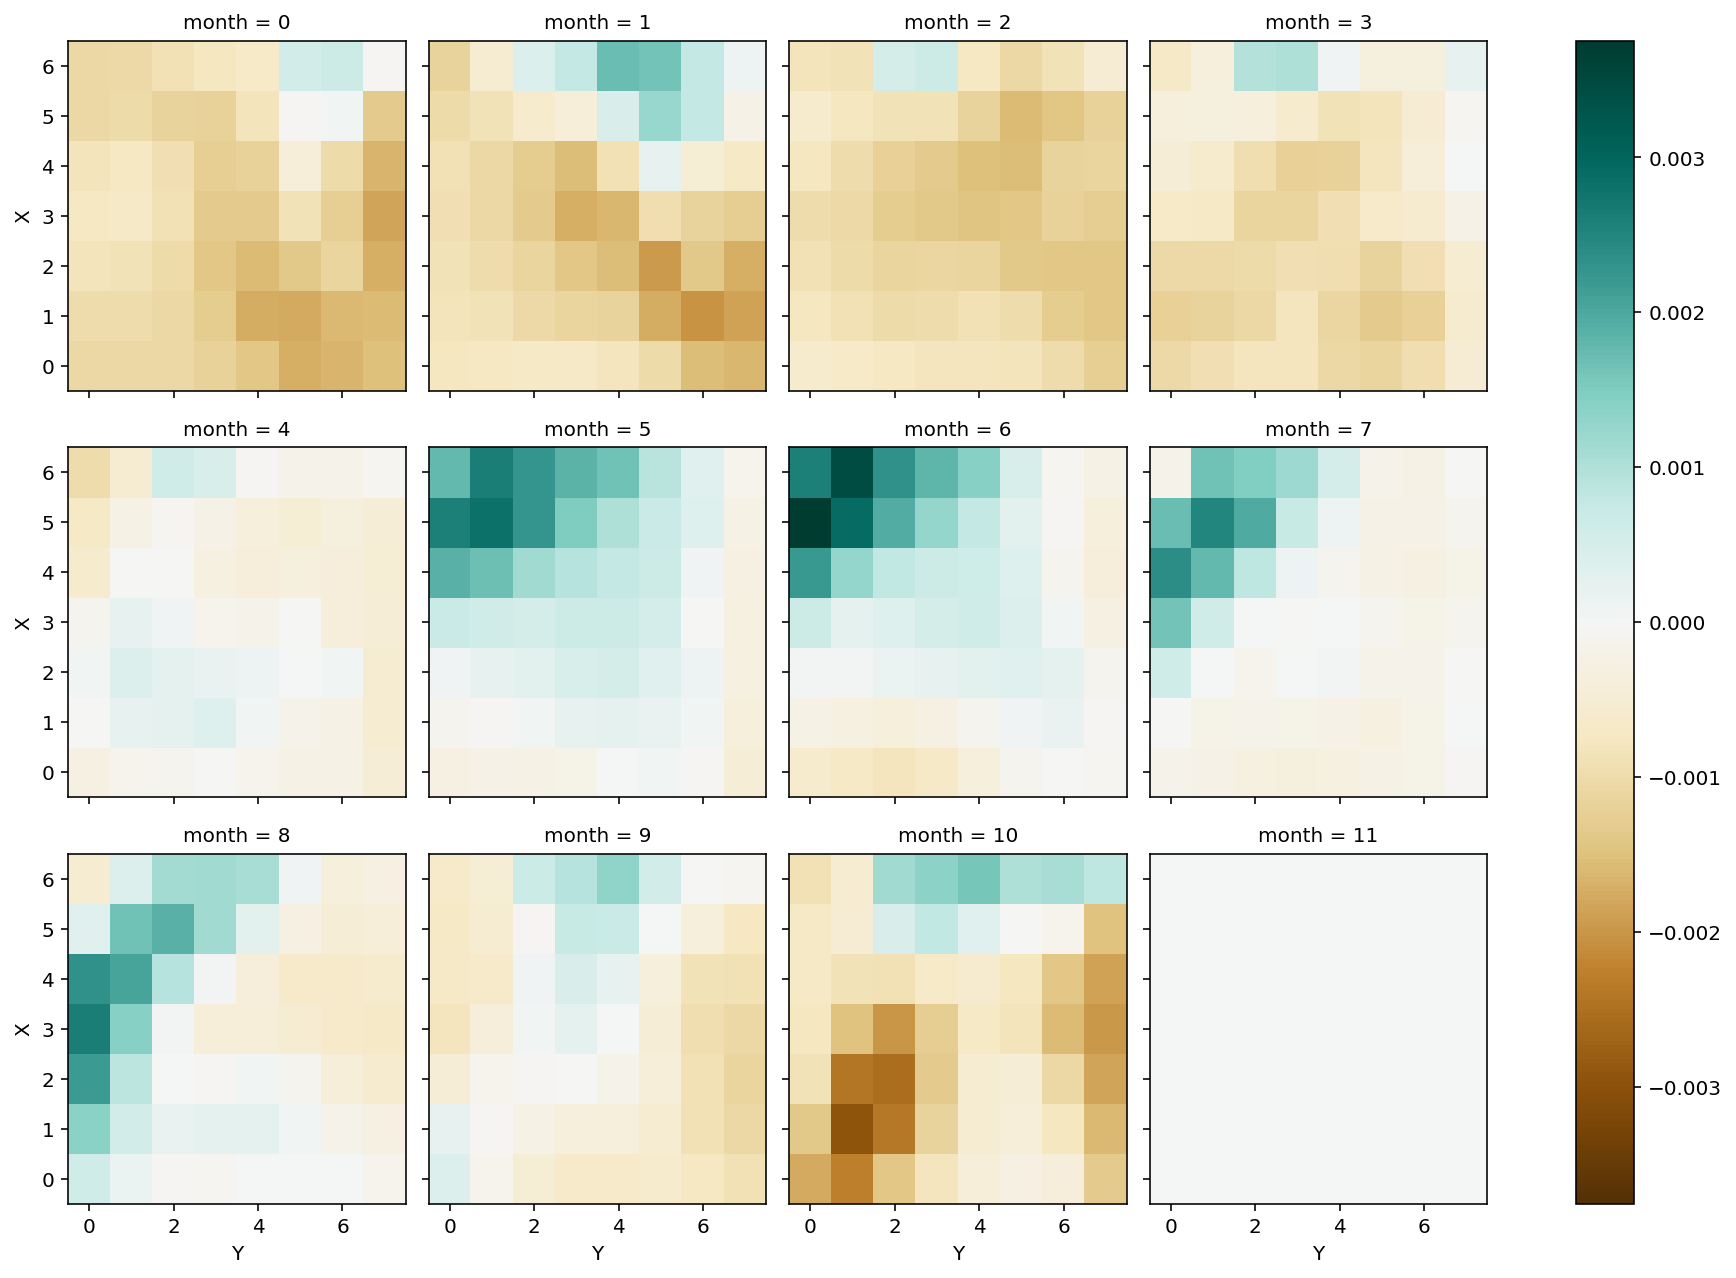

In [133]:
# Difference between forecasts and actuals
(forecasts - actuals).plot(col='month',col_wrap=4, cmap='BrBG')

#### Linear Regression

Below is a prediction using linear regression for the last date in the humidity dataset.

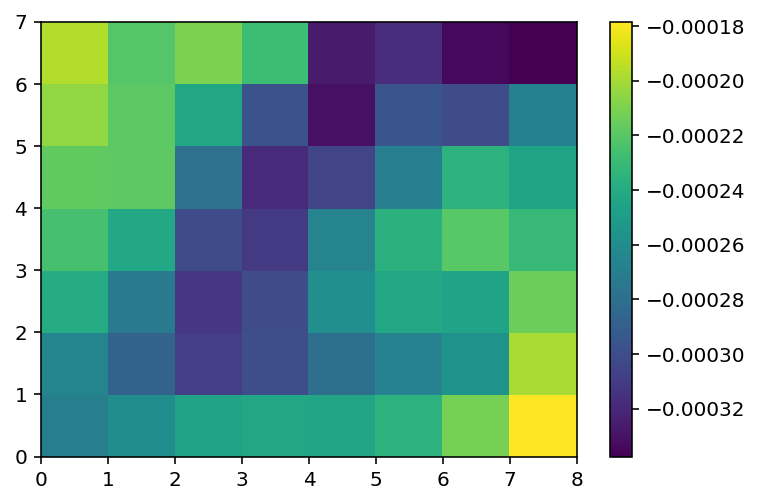

In [134]:
x = n34a[0:-1].values
xm = x.mean()
xa = x - xm
x0 = n34a[-1].values - xm

y = qaa[0:-1].values

N = len(n34a)

Nx = len(xa)
X = np.empty((Nx,2))
X[:,1] = xa
X[:,0] = 1
beta = inv(X.T@X)@X.T@y.reshape(490,7*8)
yhat = X@beta

# forecast x0*beta
X0 = np.array([1,x0])
forecast = (X0@beta).reshape(7,8)
plt.pcolormesh(forecast)
plt.colorbar()

Below is the actual map of the humidity on that day.

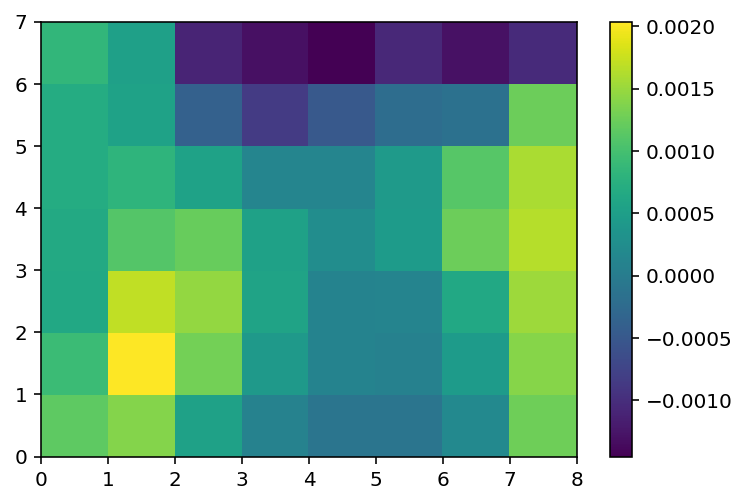

In [135]:
plt.pcolormesh(qaa[-1].values)
plt.colorbar()

### e. Daily Temperature

Next, I will move on to analyzing the daily temperature dataset. Since I already analyzed temperature above, this dataset will be used to analyze variance in temperature, since (8,9) showed that variance in temperature is an important factor for Malaria development.

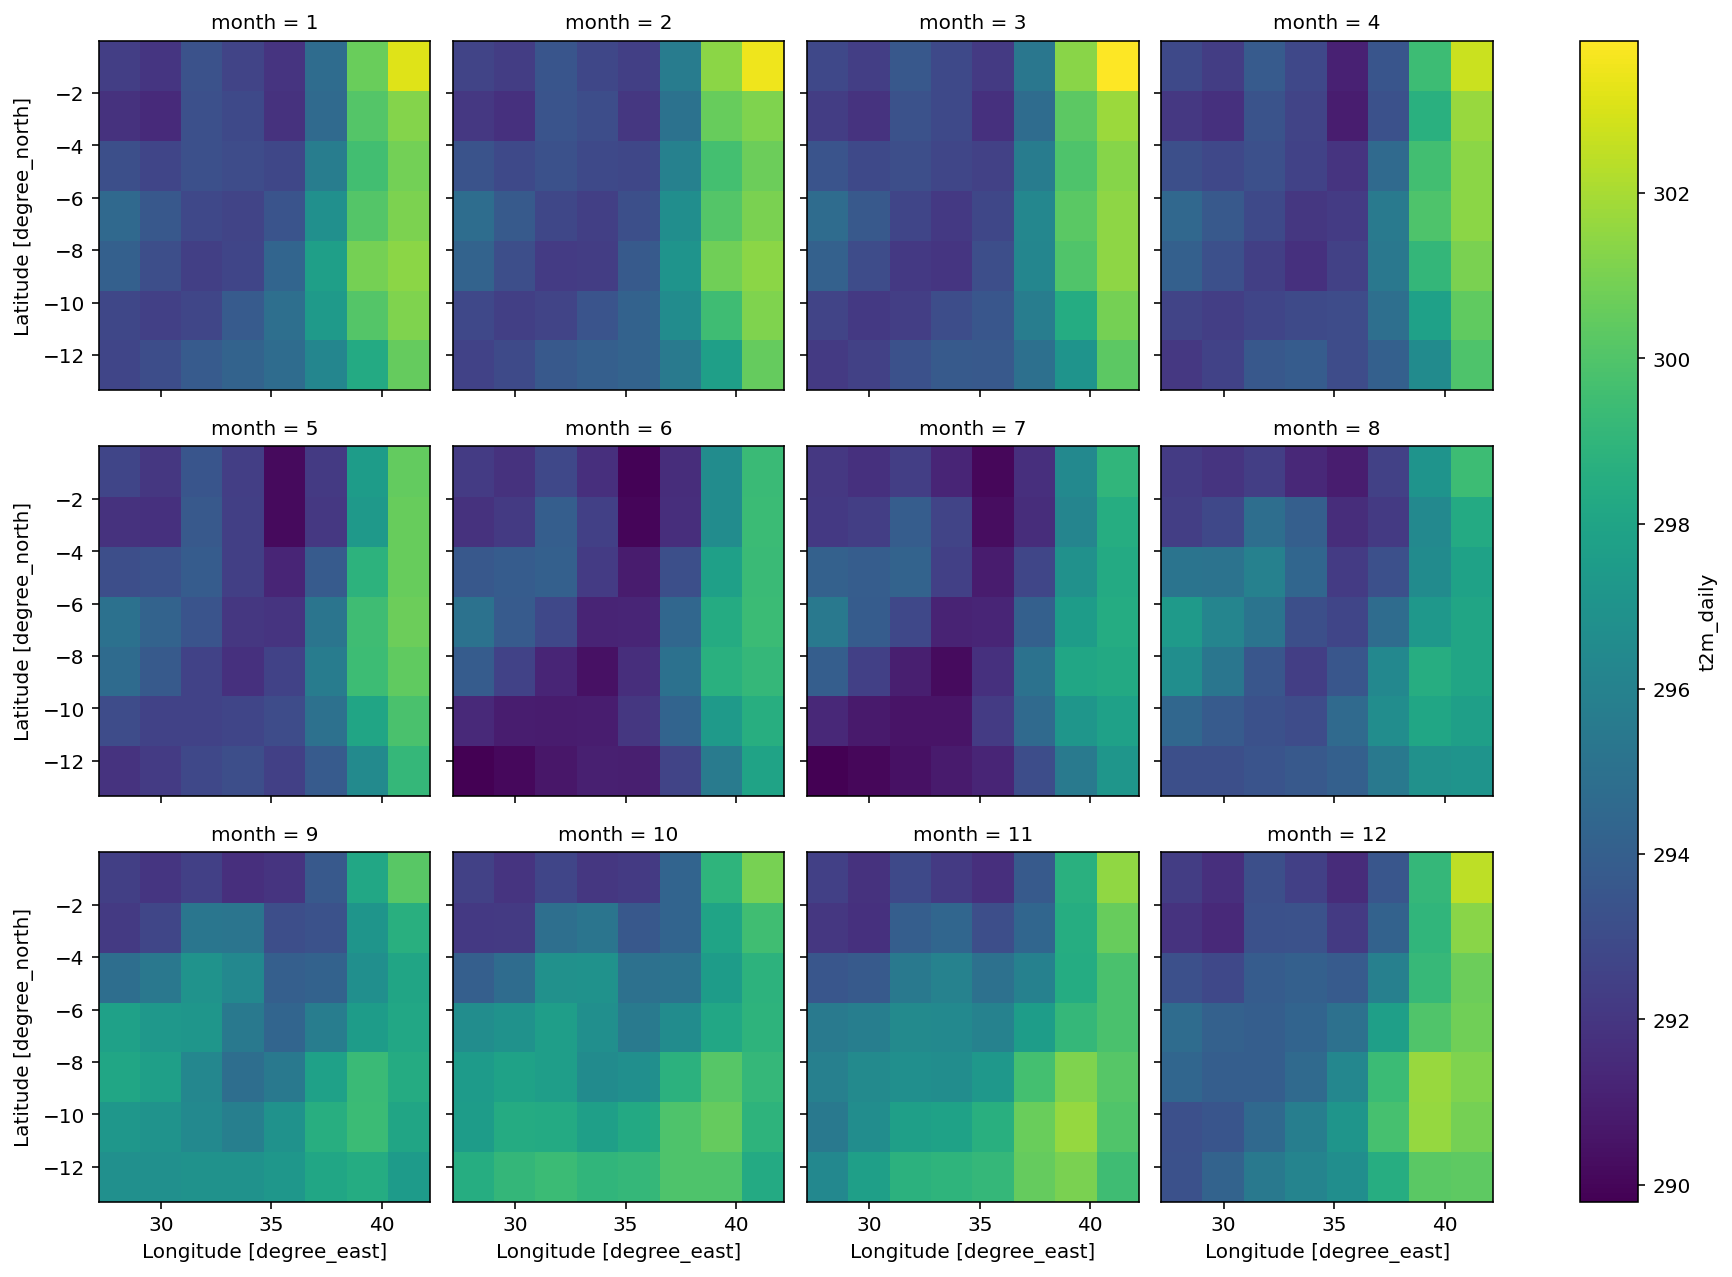

In [136]:
# TEMPERATURE Daily 
# Mean temperature by month
t2m_daily.groupby("T.month").mean('T').plot(col='month',col_wrap=4)

#### Difference in Variance

Below is a test for the difference in variance for daily temperature between El Nino and La Nina years for every month.

In [137]:
Fs = []
for month in t2m_daily.groupby('T.month'):
        X = month[1].groupby('T.year').mean()[t_nina]
        Y = month[1].groupby('T.year').mean()[t_nino]
        Fs.append(X.var()/Y.var())
from scipy.stats import f
alpha = 0.05
f_05 = f.ppf(1-alpha/2, Nx - 1, Ny - 1)
print(' f_critical = {:4.2f}'.format(f_05))
Fs

 f_critical = 2.90


[<xarray.DataArray 't2m_daily' ()>
 array(1.07569934),
 <xarray.DataArray 't2m_daily' ()>
 array(1.02880201),
 <xarray.DataArray 't2m_daily' ()>
 array(1.00896239),
 <xarray.DataArray 't2m_daily' ()>
 array(0.98298633),
 <xarray.DataArray 't2m_daily' ()>
 array(0.99335818),
 <xarray.DataArray 't2m_daily' ()>
 array(1.02997189),
 <xarray.DataArray 't2m_daily' ()>
 array(0.99905546),
 <xarray.DataArray 't2m_daily' ()>
 array(1.0538556),
 <xarray.DataArray 't2m_daily' ()>
 array(1.07826863),
 <xarray.DataArray 't2m_daily' ()>
 array(0.95296465),
 <xarray.DataArray 't2m_daily' ()>
 array(1.00451282),
 <xarray.DataArray 't2m_daily' ()>
 array(1.05945025)]

None of the months have a significant variance of daily temperatures between El Nino and La Nina years.

### f. Malaria

In [138]:
n34m = n34a.loc['2000':'2018'].groupby('T.year').mean('T').values
np.corrcoef(n34m,infected)

array([[1.        , 0.23058348],
       [0.23058348, 1.        ]])

In [139]:
n34m = n34_JJA.loc['2000':'2018'].groupby('T.year').mean('T').values
np.corrcoef(n34m,infected)

array([[1.       , 0.1617566],
       [0.1617566, 1.       ]])

In [140]:
n34m = n34_Aug.loc['2000':'2018'].groupby('T.year').mean('T').values
np.corrcoef(n34m,infected)

array([[1.        , 0.03323425],
       [0.03323425, 1.        ]])

In [141]:
n34m = n34_Sep.loc['2000':'2018'].groupby('T.year').mean('T').values
np.corrcoef(n34m,infected)

array([[1.        , 0.08339362],
       [0.08339362, 1.        ]])

In [142]:
n34m = n34_JFM.loc['2000':'2018'].groupby('T.year').mean('T').values
np.corrcoef(n34m,infected) 

array([[1.        , 0.17509229],
       [0.17509229, 1.        ]])

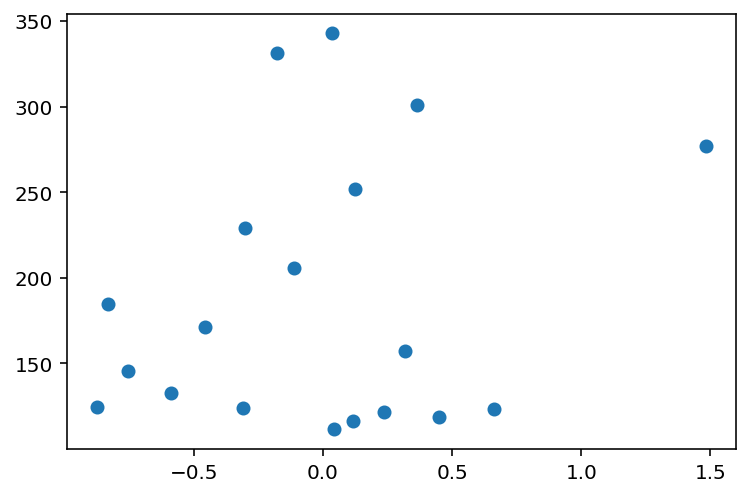

In [143]:
plt.plot(n34a.loc['2000':'2018'].groupby('T.year').mean('T').values,infected,'o')

The correlation between Nino 3.4 and incidence per 1000 of Malaria in Tanzania is very weak.

## 5. Results

For all three climate variables, precipitation, temperature, and humidity, there was a significant correlation between the climate variable and Nino 3.4 when broken down by month. This result provides evidence that Nino 3.4 is associated with precipitation, temperature, and pressure in Tanzania.

For precipitation, there was no significant difference between El Nino and La Nina years for the precipitation average across the whole map for the whole year. Because some regions of the map have more precipitation during El Nino and some regions have less during El Nino, this result is expected since the changes cancel each other out. The only month that had a significant difference in means between El Nino years and La Nina years was March, which had significantly less precipitation during El Nino (p = .0022). When the p-values were broken down on the map, other months had specific coordinates that showed a significant difference in precipitation.

For temperature, there was a significant difference between El Nino and La Nina years for the precipitation average across the whole map for the whole year (p=.0011). The difference between temperature during El Nino and La Nina years showed that for the whole year, every month had on average higher temperatures during El Nino, so the significant difference in temperatures logically follows. When broken down by month, all months except October and November showed significant differences between El Nino years and La Nina years, with significantly higher temperatures observed during El Nino (January (p = .0241), February (p = .0018), March (p = 1.0419e-6), April (p = .0013), May (p = .0418), June (p = .0197), July (p = .0025), August (p = .0065), September (p = .0021), and December (p = .0003)). When the p-values were broken down on the map, other months also had specific coordinates that showed a significant difference in temperature.

For humidity, there was no significant difference between El Nino and La Nina years for the humidity average across the whole map for the whole year. Because some regions of the map have more humidity during El Nino and some regions have less during El Nino, this result is expected since the changes cancel each other out. The only months that had a significant difference in means between El Nino years and La Nina years was April and December, which had significantly more humidity during El Nino (p = .0121 and p = .0118, respectively). When the p-values were broken down on the map, other months had specific coordinates that showed a significant difference in humidity.

For all three datasets, the KNN predictions from the Nino 3.4 values for the monthly precipitation, temperature, and humidity were all terrible for both 2020 and 2015. This result was surprising given that a strong correlation was observed between the climate variables and Nino 3.4 earlier in the analysis. The linear regression predictions were also terrible for all the datasets.

For the daily temperature dataset, there was no significant difference in monthly variance of temperature. Since the studies that found temperature fluctuation is associated with Malaria development for daily fluctuation (8,9), and this dataset used only had daily temperature (and thus monthly fluctuation), the lack of significant difference does not have much meaning for understanding Malaria in Tanzania.

Lastly, the Malaria in Tanzania dataset had a weak correlation with Nino 3.4 directly. However, the decrease in Malaria (as shown in the Data section), is likely due to factors such as human intervention. With an increase in prevention and control methods, it follows that rates of Malaria decrease. Understanding the underlying factors that make Malaria more threatening will hopefully help reduce these numbers even further in the future.

## 6. Conclusions

While it is clear from the analysis in this project that precipitation, temperature, and humidity in Tanzania are all associated with Nino 3.4, the predictions in this project yielded poor forecasts and should not be trusted to predict these climate variables in the future. Previous work supports the relationship found between precipitation, temperature, and humidity in Tanzania and Nino 3.4. Significant differences in precipitation, temperature, and humidity in Tanzania were found in this project between El Nino years and La Nina years, confirming the association observed from the project's correlations. However, future work should focus on building more accurate forecasting models.

For temperature, which had the strongest correlation with Nino 3.4 and the most significant p-values for the difference in means, KNN analysis could be improved by removing the increasing temperature trend. Future work could also look at the impact of climate change on Malaria at-risk regions, with some regions becoming warm enough for Plasmodium falciparum to develop in mosquitoes, and some regions becoming too warm and no longer having the risk.

In addition, since I did not have access to a daily temperature fluctuation dataset, future work could study the relationship between daily fluctuation and Nino 3.4, since daily temperature fluctuation impacts Malaria development within mosquitoes. Future work could also confirm the direct relationship between Malaria in Tanzania and Tanzania's precipitation, temperature, and humidity if access to a more thorough dataset of Malaria in Tanzania was available. This data analysis would be important in substantiating the biology behind the development of Malaria in the Anopheles mosquito, especially historically before intervention was as common. The direct relationship between ENSO and Malaria in Tanzania could also be studied much better than in this project if such a dataset could be procured.

Overall, a relationship between Malaria's climate dependent factors in Tanzania and ENSO was found, suggesting that conditions for a Malaria outbreak may be more likely during El Nino.

## 7. References

1. Climate Change and Vector-Borne Disease. (n.d.). Retrieved December 16, 2020, from https://scied.ucar.edu/longcontent/climate-change-and-vector-borne-disease
2. CDC - Malaria - About Malaria. (2020, March 12). Retrieved December 16, 2020, from https://www.cdc.gov/malaria/about/
3. Anyamba, A., Chretien, J., Britch, S., Soebiyanto, R., Small, J., Jepsen, R., . . . Linthicum, K. (2019, February 13). Global Disease Outbreaks Associated with the 2015–2016 El Niño Event. Retrieved December 16, 2020, from https://www.nature.com/articles/s41598-018-38034-z
4. ENSO and your health: How the 2015-16 El Niño led to early warnings for global disease outbreaks: NOAA Climate.gov. (2019, May 30). Retrieved December 16, 2020, from https://www.climate.gov/news-features/blogs/enso/enso-and-your-health-how-2015-16-el-ni%C3%B1o-led-early-warnings-global-disease
5. Predicting Climate-Sensitive Infectious Diseases to Protect Public Health and Strengthen National Security. (2019, June). Retrieved from https://www.globalchange.gov/sites/globalchange/files/EID%20science%20plan.pdf
6. Dye, C., &amp; Bouma, M. J. (1997). Cycles of malaria associated with El Niño in Venezuela. Retrieved December 16, 2020, from https://europepmc.org/article/med/9388155
7. Moore, S., Azman, A., Zaitchik, B., Mintz, E., Brunkard, J., Legros, D., . . . Lessler, J. (2017, April 25). El Niño and the shifting geography of cholera in Africa. Retrieved December 16, 2020, from https://www.pnas.org/content/114/17/4436
8. Blanford, J., Blanford, S., Crane, R., Mann, M., Paaijmans, K., Schreiber, K., &amp; Thomas, M. (2013). Implications of temperature variation for malaria parasite development across Africa. Retrieved December 16, 2020, from https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3575117/
9. Paaijmans, K., Read, A., &amp; Thomas, M. (2009, August 18). Understanding the link between malaria risk and climate. Retrieved December 16, 2020, from https://www.pnas.org/content/106/33/13844
10. hUnited Republic of Tanzania. (n.d.). Retrieved December 16, 2020, from https://www.who.int/data/gho/data/countries/country-details/GHO/united-republic-of-tanzania?countryProfileId=40f06adc-047c-435c-b576-ebd4da789bb2